# <center>PRÁCTICA 1: APRENDIZAJE NO SUPERVISADO (DengAI)<center>

**Grupo número**:
* **Estudiante 1**: Janire Gallejones
* **Estudiante 2**: Malena Nuñez
* **Estudiante 3**: Joana Rodríguez
* **Estudiante 4**: David Seijas

---
# 1. Resumen
---

---
# 2. Inicialización
---

In [1]:
# Imports generales
from datetime import datetime
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import io

from google.colab import files

from google.colab import drive
drive.mount('/content/drive')

def upload_files (index_fields=None):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)
    return df

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/07 Machine Learning/Práctica 2/dengue_features_train.csv')

In [3]:
df.shape

(1456, 24)

---
# 3. Preprocesamiento
---

## 3.1. Valores perdidos

Primero, se eliminarán las filas y características que tengan más del 20% de sus valores missing.

No tiene sentido mantener una variable si faltan tantos datos o un registro si una gran parte de las características son nulas


In [4]:
# Eliminacion de filas con un 20% o mas de datos missing
df["num_missing"] = df.isnull().sum(axis = 1) #Creamos una nueva columna en el DataFrame que contiene la cantidad de valores faltantes de cada fila. Después se suman a lo largo del eje 1 (filas)
ind_missing = df[df['num_missing'] > 0.2*len(df.columns)].index #Se identifican los índices con un porcentaje ,ayor al 20%
df = df.drop(ind_missing, axis=0) #Se eliminan las filas con los índices identificados
df = df.drop(["num_missing"], axis = 1) #Se elimina la columna que hemos creado al principio

# Eliminacion de columnas con un 20% o mas de datos missing
for col in df.columns:
  num_missing = np.sum(df[col].isnull())
  if num_missing > len(df.axes[0])*0.2 : #df.axes[0] me devuelve el num de filas
    df = df.drop([col], axis=1)

df.shape

(1446, 24)

## 3.2. Descarte de week_start_date y valores duplicados

Se eliminará la característica week_start_date por ser de tipo cadena de texto sin formato (con contener el año es suficiente; además, el empiece de la semana varía con el año).

Además, se eliminarán los datos duplicados (en la misma línea de código), pues no puede haber datos distintos para una misma semana.

In [5]:
df = df.drop('week_start_date', axis=1).drop_duplicates()
df.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


## 3.3. Eliminación de las características con un 90% o más de sus valores iguales

Se eliminarán las características que tienen un 90% o más de sus valores iguales puesto que no nos aportan valor


In [6]:
num_filas = len(df.index)
cols_sinvalor = [] #Variable que se utilizará para almacenar los nombres de las columnas que tienen una proporcioón de valores superiores al 90% en una única categoría

for col in df.columns:
    count_values = df[col].value_counts(dropna=False) #Cuenta la frecuencia de cada valor en la columna actual col, incluyendo los valores faltantes (NaN). count_values = serie de Pandas
    top_pct = (count_values/num_filas).iloc[0] # Calcula la proporción del valor más frecuente en la columna actual col dividiendo la frecuencia del valor más común entre el número total de filas en el DataFrame

    if top_pct > 0.9:
        cols_sinvalor.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(count_values)
        print()

df = df.drop(cols_sinvalor, axis = 1)

# Comprobamos que no hemos eliminado ninguna variable
print("Variables eliminadas:", cols_sinvalor)

Variables eliminadas: []


## 3.4. Tratamiento de valores perdidos (missing values)

In [7]:
df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
ndvi_ne                                  189
ndvi_nw                                   47
ndvi_se                                   17
ndvi_sw                                   17
precipitation_amt_mm                       3
reanalysis_air_temp_k                      0
reanalysis_avg_temp_k                      0
reanalysis_dew_point_temp_k                0
reanalysis_max_air_temp_k                  0
reanalysis_min_air_temp_k                  0
reanalysis_precip_amt_kg_per_m2            0
reanalysis_relative_humidity_percent       0
reanalysis_sat_precip_amt_mm               3
reanalysis_specific_humidity_g_per_kg      0
reanalysis_tdtr_k                          0
station_avg_temp_c                        33
station_diur_temp_rng_c                   33
station_max_temp_c                        10
station_min_temp_c                         4
station_pr

In [8]:
# Completar valores perdidos con método interpolate.
# La interpolación lineal puede ser un buen método para completar valores perdidos en ciertos casos, especialmente cuando los datos siguen una tendencia lineal y los valores vecinos son representativos
df.interpolate(method='linear', inplace=True)
pd.isnull(df).any()

city                                     False
year                                     False
weekofyear                               False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_t

## 3.5. Discretización: Binarización de la variable categórica 'city'

In [9]:
# Binarizador para la variable categórica city en el conjunto de entrenamiento y test
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

#lb = Instancia de la clase LabelBinarizer --> Cuando creas una instancia de una clase, estás creando un objeto único que tiene acceso a los atributos y métodos definidos en esa clase
# Cada instancia puede tener valores diferentes para sus atributos, pero comparte el mismo conjunto de métodos definidos en la clase.

# Vemos cuántas y qué variables categóricas hay -> solo es la variable city
print(df.dtypes)

# Vemos cuántos valores tenemos en la variable city -> vemos que hay dos y por eso usamos LabelBinarizer
df['city'].unique()

city                                      object
year                                       int64
weekofyear                                 int64
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rng_c                  float64
station_max_temp_c  

array(['sj', 'iq'], dtype=object)

La variable city la convertimos en dicotómica, siendo sj=1 y iq=0, a esta nueva variable la llamremos 'city_bin'. La anterior la eliminamos.

In [10]:
df['city_bin'] = lb.fit_transform(df['city'])
df.drop("city", axis = 1, inplace = True)

#fit_transform es un método que corresponde a la clase LabelBinarizer (Fit label binarizer/transform multi-class labels to binary labels)

# ciudades: sj = 1, iq = 0
df['city_bin'].unique()

array([1, 0])

## 3.6. Outliers

Utilizamos los diagramas de cajas para analizar los posibles outliers.

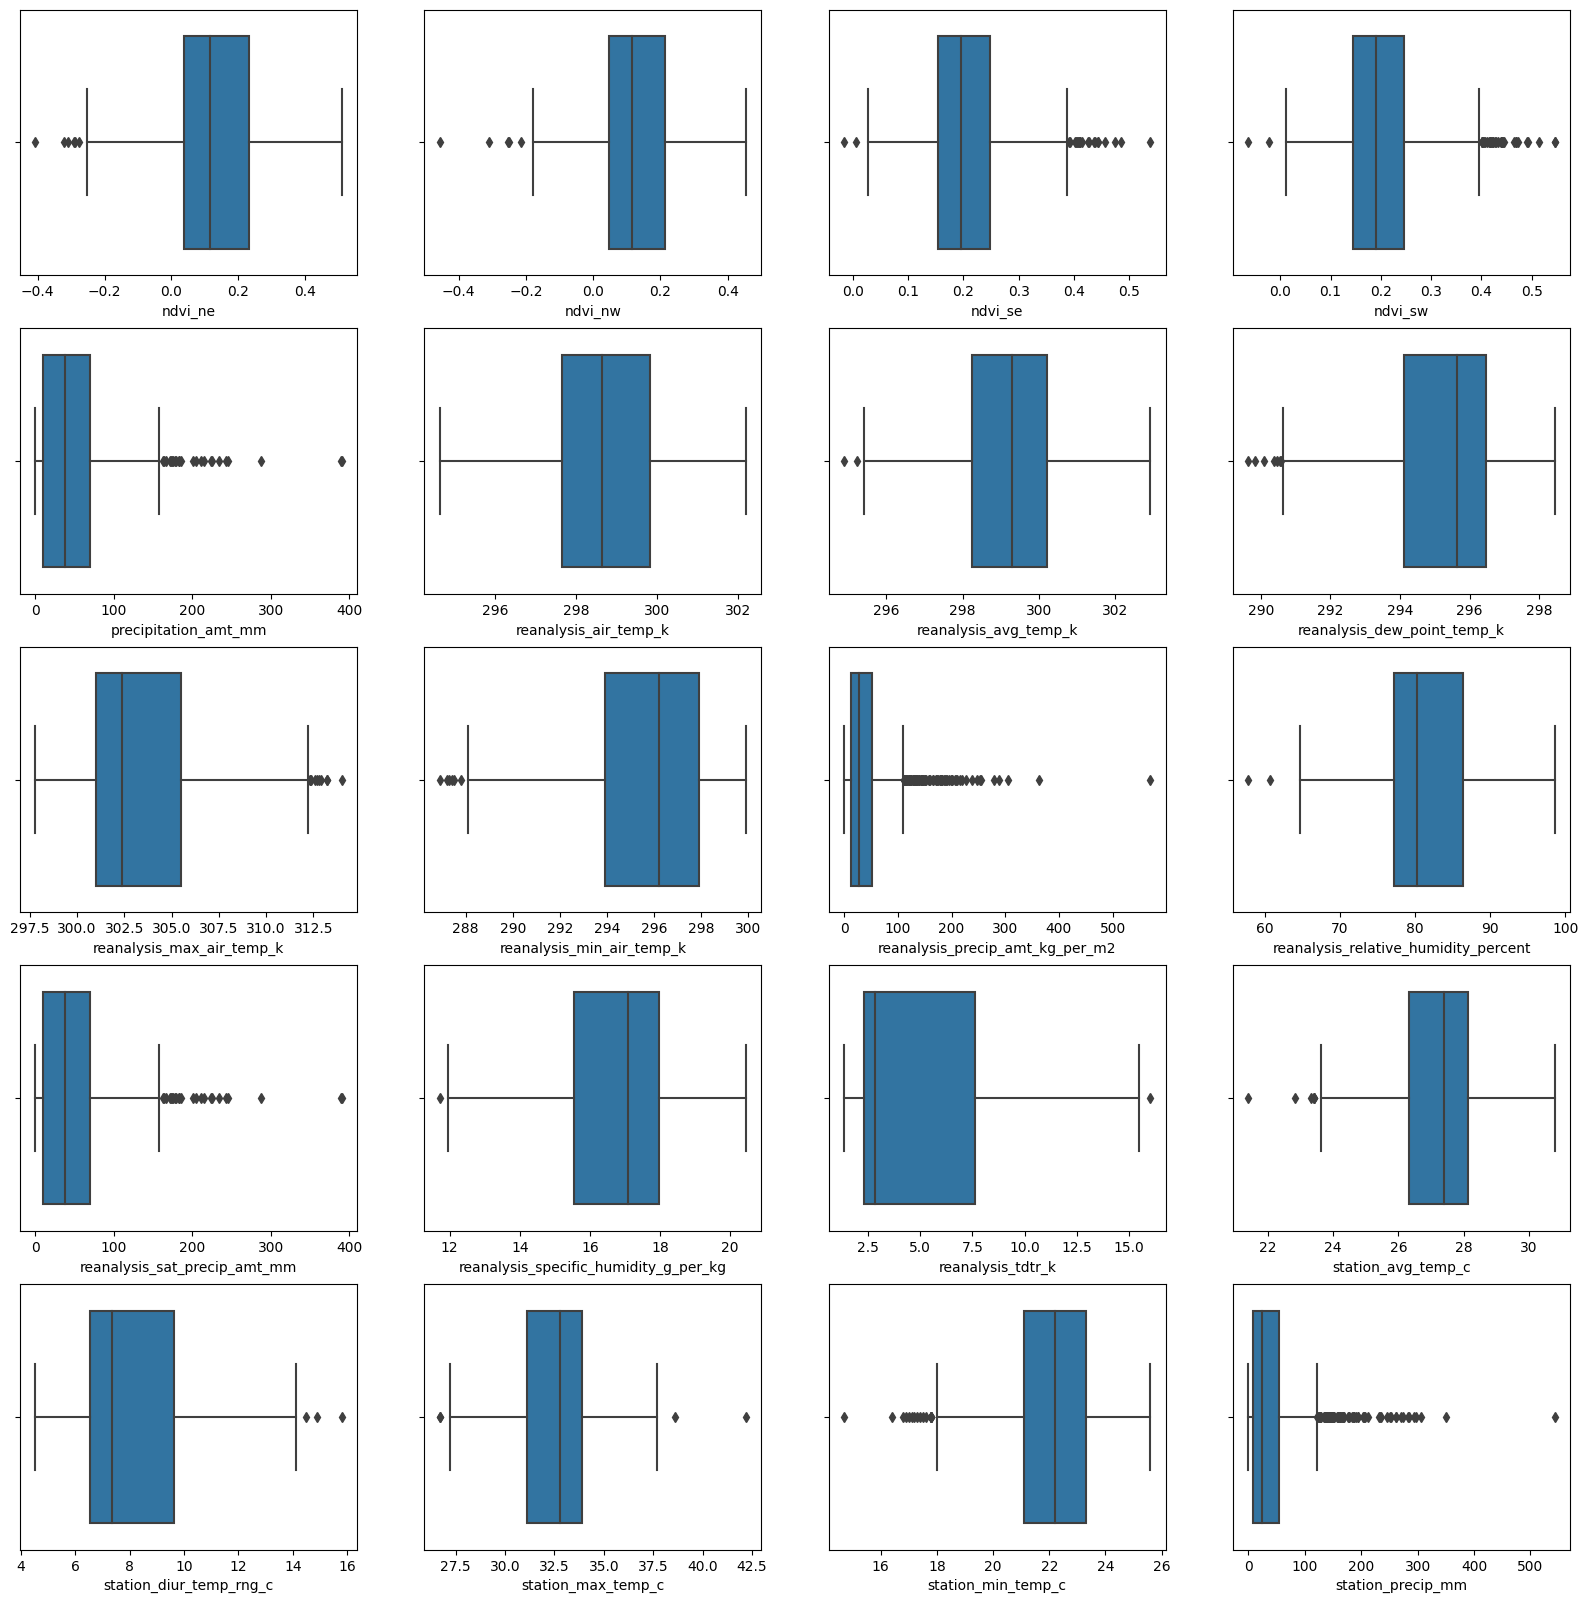

In [11]:
aux = ['year', 'weekofyear', 'city_bin'] #Eliminamos las variables no numéricas
cols = df.columns
for i in aux : cols = cols.drop(i)

f, axes = plt.subplots(figsize=(20,20),nrows=5, ncols=4)
i = 0; j = 0
for col in cols :
  sns.boxplot(x=df[col], ax=axes[i, j])
  j += 1
  if (j == 4):
    j = 0; i += 1

plt.show()

Tratamos los valores atípicos (outliers) de cada variable mediante truncamiento, ya que, tras analizarlos, estos datos se han considerado válidos. De esta manera se limitará su infuencia sin eliminarlos por completo.

Hemos considerado valores atípicos los que se salen del rango definido por q3 + 1.5*rango_intercuartílico por arriba y q1 - 1.5 * rango_intercuartílico.
patrones en los datos que los modelos pueden utilizar para hacer predicciones.

In [12]:
#Porcentaje de outliers
porcentaje_outliers = {}

#cols se ha definido arriba (se han eliminado las columnas 'year', 'weekofyear', 'city_bin')
for col in cols:
    # Calcular los valores máximo y mínimo a partir del boxplot
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Contar los outliers en la columna
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)

    # Calcular el porcentaje de outliers
    porcentaje = (num_outliers / len(df[col])) * 100

    # Guardar el porcentaje en el diccionario
    porcentaje_outliers[col] = porcentaje

# Imprimir los porcentajes de outliers en cada columna
for col, porcentaje in porcentaje_outliers.items():
    print(f"Columna {col}: {porcentaje:.2f}% de outliers")

Columna ndvi_ne: 0.41% de outliers
Columna ndvi_nw: 0.35% de outliers
Columna ndvi_se: 1.52% de outliers
Columna ndvi_sw: 2.42% de outliers
Columna precipitation_amt_mm: 1.66% de outliers
Columna reanalysis_air_temp_k: 0.00% de outliers
Columna reanalysis_avg_temp_k: 0.14% de outliers
Columna reanalysis_dew_point_temp_k: 0.48% de outliers
Columna reanalysis_max_air_temp_k: 0.69% de outliers
Columna reanalysis_min_air_temp_k: 0.41% de outliers
Columna reanalysis_precip_amt_kg_per_m2: 6.02% de outliers
Columna reanalysis_relative_humidity_percent: 0.14% de outliers
Columna reanalysis_sat_precip_amt_mm: 1.66% de outliers
Columna reanalysis_specific_humidity_g_per_kg: 0.07% de outliers
Columna reanalysis_tdtr_k: 0.07% de outliers
Columna station_avg_temp_c: 0.41% de outliers
Columna station_diur_temp_rng_c: 0.21% de outliers
Columna station_max_temp_c: 0.28% de outliers
Columna station_min_temp_c: 1.18% de outliers
Columna station_precip_mm: 5.53% de outliers


Tras analizar los porcentajes, se va a seguir este criterio:

1. Columnas con porcentajes de outliers muy bajos (menos del 1%): Se van a eliminar los outliers, ya que no son representativos para el análisis y podrían llegar a introducir un sesgo significativo.

2. Columnas con porcentajes de outliers moderados (entre el 1% y el 5%): Los outliers son importantes y podrían afectar negativamente a los datos. Por lo tanto, se van a sustituir por valores límite, en este caso, el rango intercuartílico.

3. Columnas con porcentajes de outliers altos (más del 5%): En este caoso hay que analizar cuiadosamente la naturaleza de los outliers y el impacto potencial. Es recomendable considerar técnicas más avanzadas como transformaciones de variables, modelado robusto o métodos estadísticos más sofisticados. En el caso concreto de las dos variables que sobrepasan el 5%, la distribución del boxplot muestra que los outliers están muy concentrados y se dispersan a medida que se alejan del tercer cuartil (Q3), por lo que la técnica de truncamiento puede ser una opción adecuada.

In [13]:
# Se crea un nuevo DataFrame para guardar el análisis realizado hasta el momento
df_con_outliers=df.copy()

In [14]:
print(df_con_outliers.shape)

(1446, 23)


In [15]:
# Código para realizar el tratamiento d los outliers

# Lista para almacenar las columnas a eliminar o truncar
cols_eliminar = []
filas_eliminar = []
cols_truncar = []

# Recorrer las columnas del DataFrame
for col in cols:
  print(col)
  # Calcular los valores máximo y mínimo a partir del boxplot
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Calcular el porcentaje de outliers
  outliers_pct = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0] / df.shape[0] * 100
  print(outliers_pct)

  # Verificar si el porcentaje es menor al 1%
  if outliers_pct < 1:
    # Obtener los índices de las filas a eliminar
    indices_eliminar = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    filas_eliminar.extend(indices_eliminar)

    # Eliminar los outliers individuales
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)] #Se obtiene una serie booleana (tpye = bool) con la cual se filtra el df. Se eliminan todas las filas que no cumplan con la condición

  #Verificar si el porcentaje es mayor al 1%
  elif outliers_pct > 1:
    cols_truncar.append(col)
    # Truncar los valores fuera del rango intercuartílico
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

ndvi_ne
0.4149377593360996
ndvi_nw
0.3472222222222222
ndvi_se
1.5331010452961673
ndvi_sw
2.4390243902439024
precipitation_amt_mm
1.6724738675958188
reanalysis_air_temp_k
0.0
reanalysis_avg_temp_k
0.13937282229965156
reanalysis_dew_point_temp_k
0.6978367062107467
reanalysis_max_air_temp_k
0.6324666198172875
reanalysis_min_air_temp_k
0.2828854314002829
reanalysis_precip_amt_kg_per_m2
5.957446808510639
reanalysis_relative_humidity_percent
0.07092198581560284
reanalysis_sat_precip_amt_mm
1.7033356990773598
reanalysis_specific_humidity_g_per_kg
0.0
reanalysis_tdtr_k
0.14194464158977999
station_avg_temp_c
0.4975124378109453
station_diur_temp_rng_c
0.14285714285714285
station_max_temp_c
0.07153075822603719
station_min_temp_c
0.8589835361488906
station_precip_mm
5.55956678700361


<ipython-input-15-d301431dd1ad>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
<ipython-input-15-d301431dd1ad>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


In [16]:
print(df.shape)

(1385, 23)


In [17]:
filas_eliminar.sort()
print(filas_eliminar)


[189, 255, 256, 352, 457, 459, 506, 507, 513, 519, 658, 723, 767, 768, 769, 770, 781, 820, 821, 860, 861, 919, 922, 929, 939, 941, 946, 959, 961, 987, 993, 1002, 1003, 1040, 1051, 1052, 1053, 1078, 1085, 1094, 1103, 1161, 1198, 1199, 1200, 1203, 1208, 1209, 1210, 1211, 1242, 1259, 1262, 1295, 1304, 1305, 1308, 1349, 1355, 1359, 1414]


In [18]:
# Buscar el índice correspondiente
indice_fila = df.loc[(df['year'] == 2007) &
                     (df['weekofyear'] == 36) &
                     (df['city_bin'] == 1)].index

print("Índice de la fila:", indice_fila)

Índice de la fila: Int64Index([902], dtype='int64')


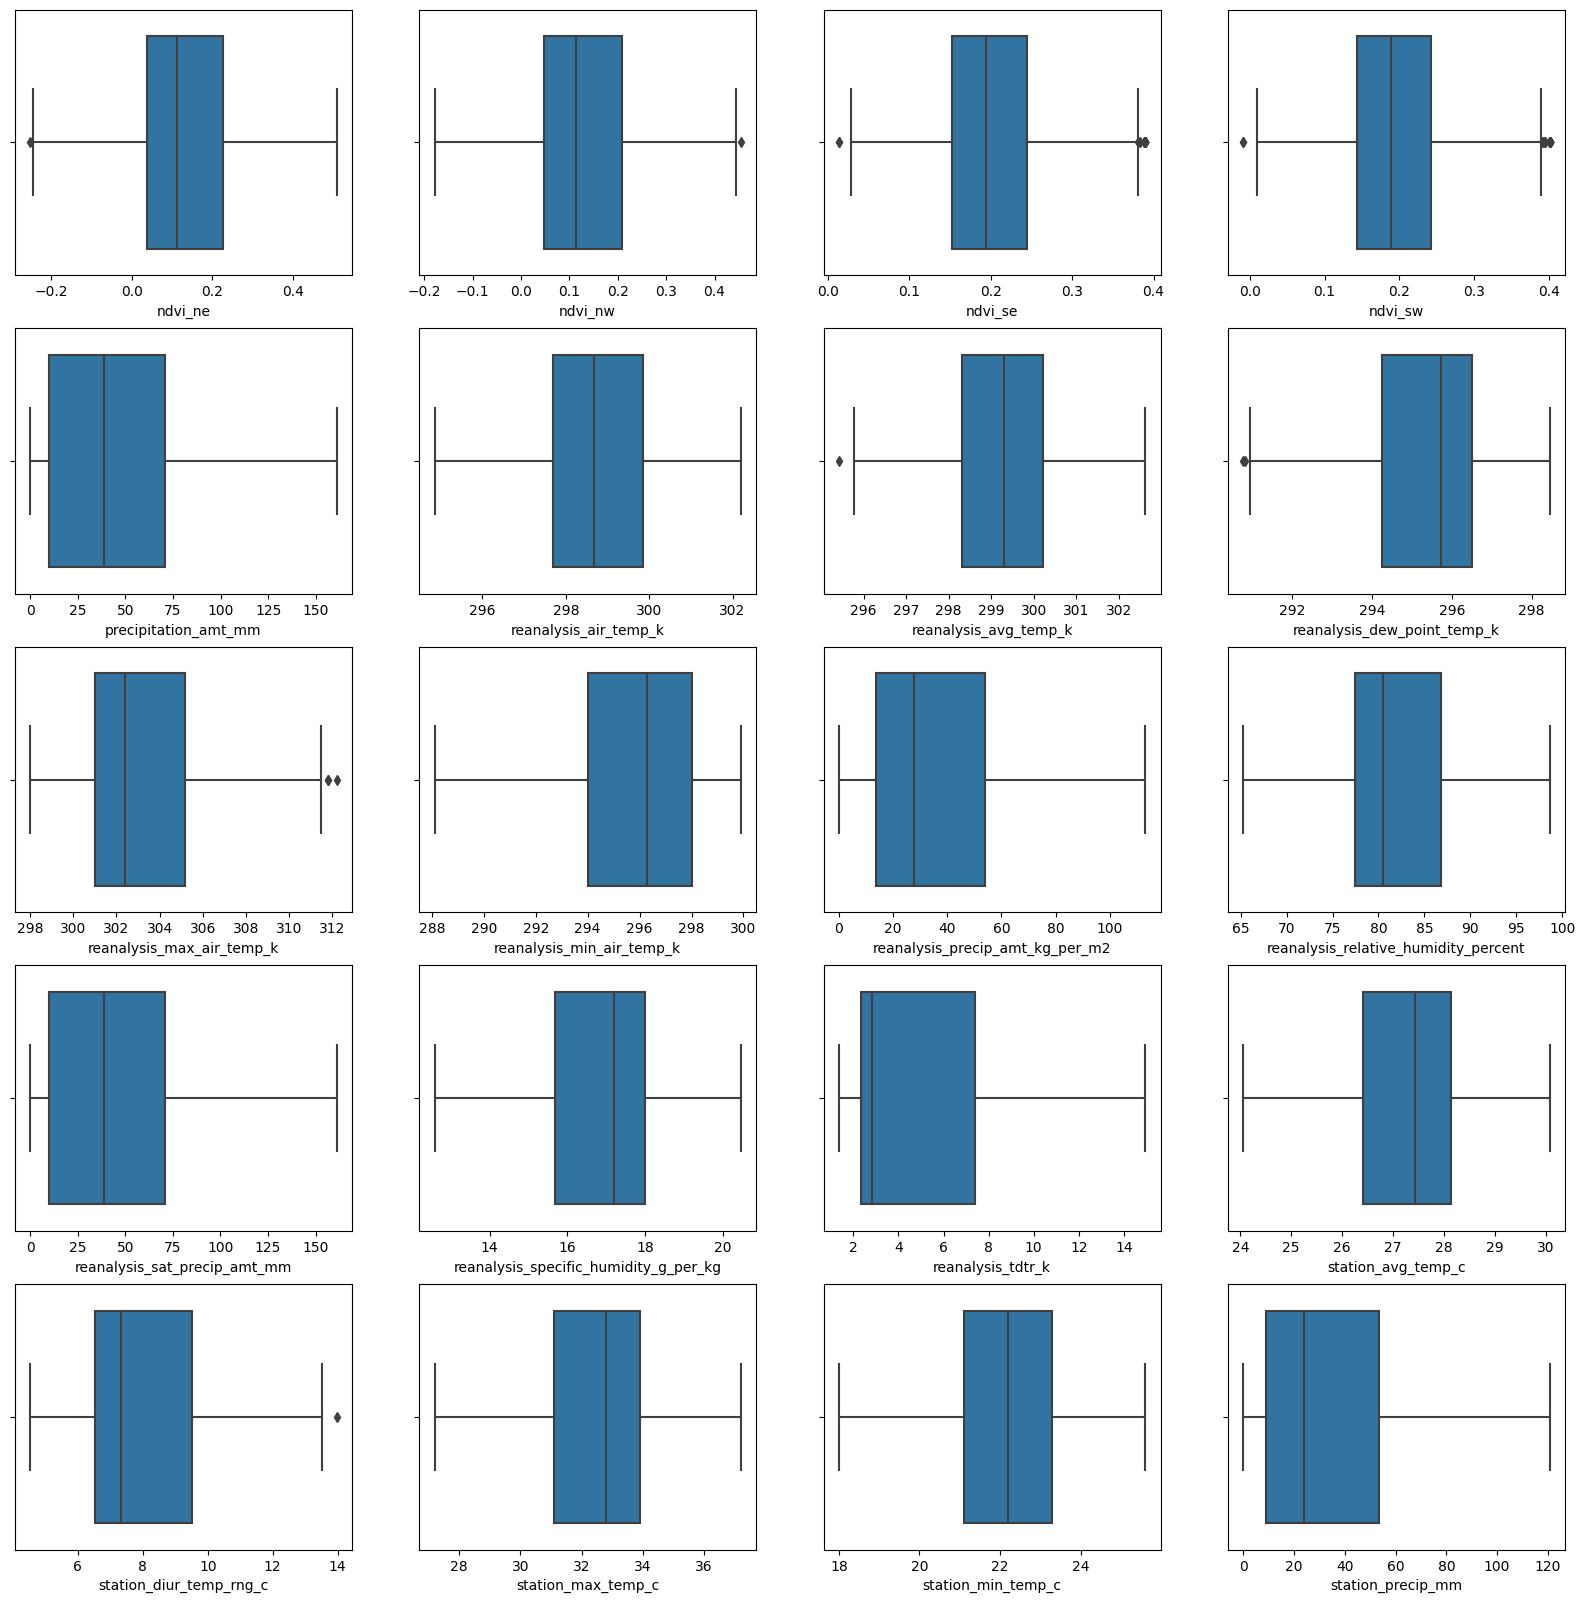

In [19]:
# Comprobar los outliers con boxplot

aux = ['year', 'weekofyear', 'city_bin']
cols = df.columns
for i in aux : cols = cols.drop(i)

f, axes = plt.subplots(figsize=(20,20),nrows=5, ncols=4)
i = 0; j = 0
for col in cols :
  sns.boxplot(x=df[col], ax=axes[i, j])
  j += 1
  if (j == 4):
    j = 0; i += 1

plt.show()

In [20]:
print(df.isnull().any())

year                                     False
weekofyear                               False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_preci

In [21]:
# Copia para realizar el PCA con la matriz transpuesta
df.index = range(df.shape[0])
df_ = df.copy()
df_noNorm = df.copy()

In [22]:
# Copia para realizar el DBSCAN con la matriz transpuesta
df_DBSCAN = df.copy()

In [23]:
# Copia para realizar el K-MEANS
df_KMEANS = df.copy()

---
# 4. Características: Transformación de datos
---

## 4.1. Estandarización de datos

**NOTA:**
* Jerárquico: Debido a que los algoritmos jerárquicos no tienen una fase de asignación de puntos a grupos como los algoritmos k-means o c-means, no se requiere necesariamente una estandarización específica. Sin embargo, el uso de una estandarización basada en Z-score o MinMaxScaler puede ser útil para garantizar que las características tengan un rango similar.

* K-means: Debido a que el algoritmo k-means se basa en la distancia Euclidiana, una estandarización basada en Z-score puede ser más apropiada para garantizar que las características tengan una distribución normalizada y un rango similar.

* Fuzzy C-Means: Al igual que con el algoritmo k-means, una estandarización basada en Z-score puede ser más apropiada para el algoritmo Fuzzy C-Means debido a la naturaleza de la distancia Euclidiana.

* DBSCAN: Dado que el algoritmo DBSCAN se basa en la densidad, no es necesario utilizar una estandarización específica. Sin embargo, la normalización MinMaxScaler puede ser útil para garantizar que las características tengan un rango similar.

* Expectation-Maximization: Al igual que con el algoritmo DBSCAN, no es necesario utilizar una estandarización específica. Sin embargo, la normalización MinMaxScaler puede ser útil para garantizar que las características tengan un rango similar.

* PCA: PCA se utiliza para reducir la dimensionalidad de un conjunto de datos. Por lo tanto, una estandarización basada en Z-score es apropiada antes de aplicar PCA para garantizar que las características tengan una distribución normalizada y un rango similar.

Dado que las variables del dataset están expresadas en diferentes unidades de medida (precipitaciones en mm, temperatura en C y K, humedad en g/kg), se va a emplear la estandarización **Z-score** (distribución de media 0 y varinza 1).

Además, se va a utilizar PCA como algoritmo para reducir la dimensionalidad de las varaibles y poder graficarlas. Este método requiere que las características tengan una distribución normalizada y rango similar.

Por otro lado, en este caso se va a aplicar ***K-means***, la cual se basa en la distancia euclidiana. Por ello, es recomendable aplicar Z-score para que las características tengan un distribución normalizada y un rango similar.

Para el **algoritmo jerárquico** no se necesita tener una estandarización especifica y el motivo es que no tiene ninguna fase donde se asignen puntos a conjuntos, aunque se recomienda usar la estandarización Z-score o MinMaxScaler para que las características que se tienen estén dentro de un rango y, de esta manera, poder compara las distancias de una forma más fácil.


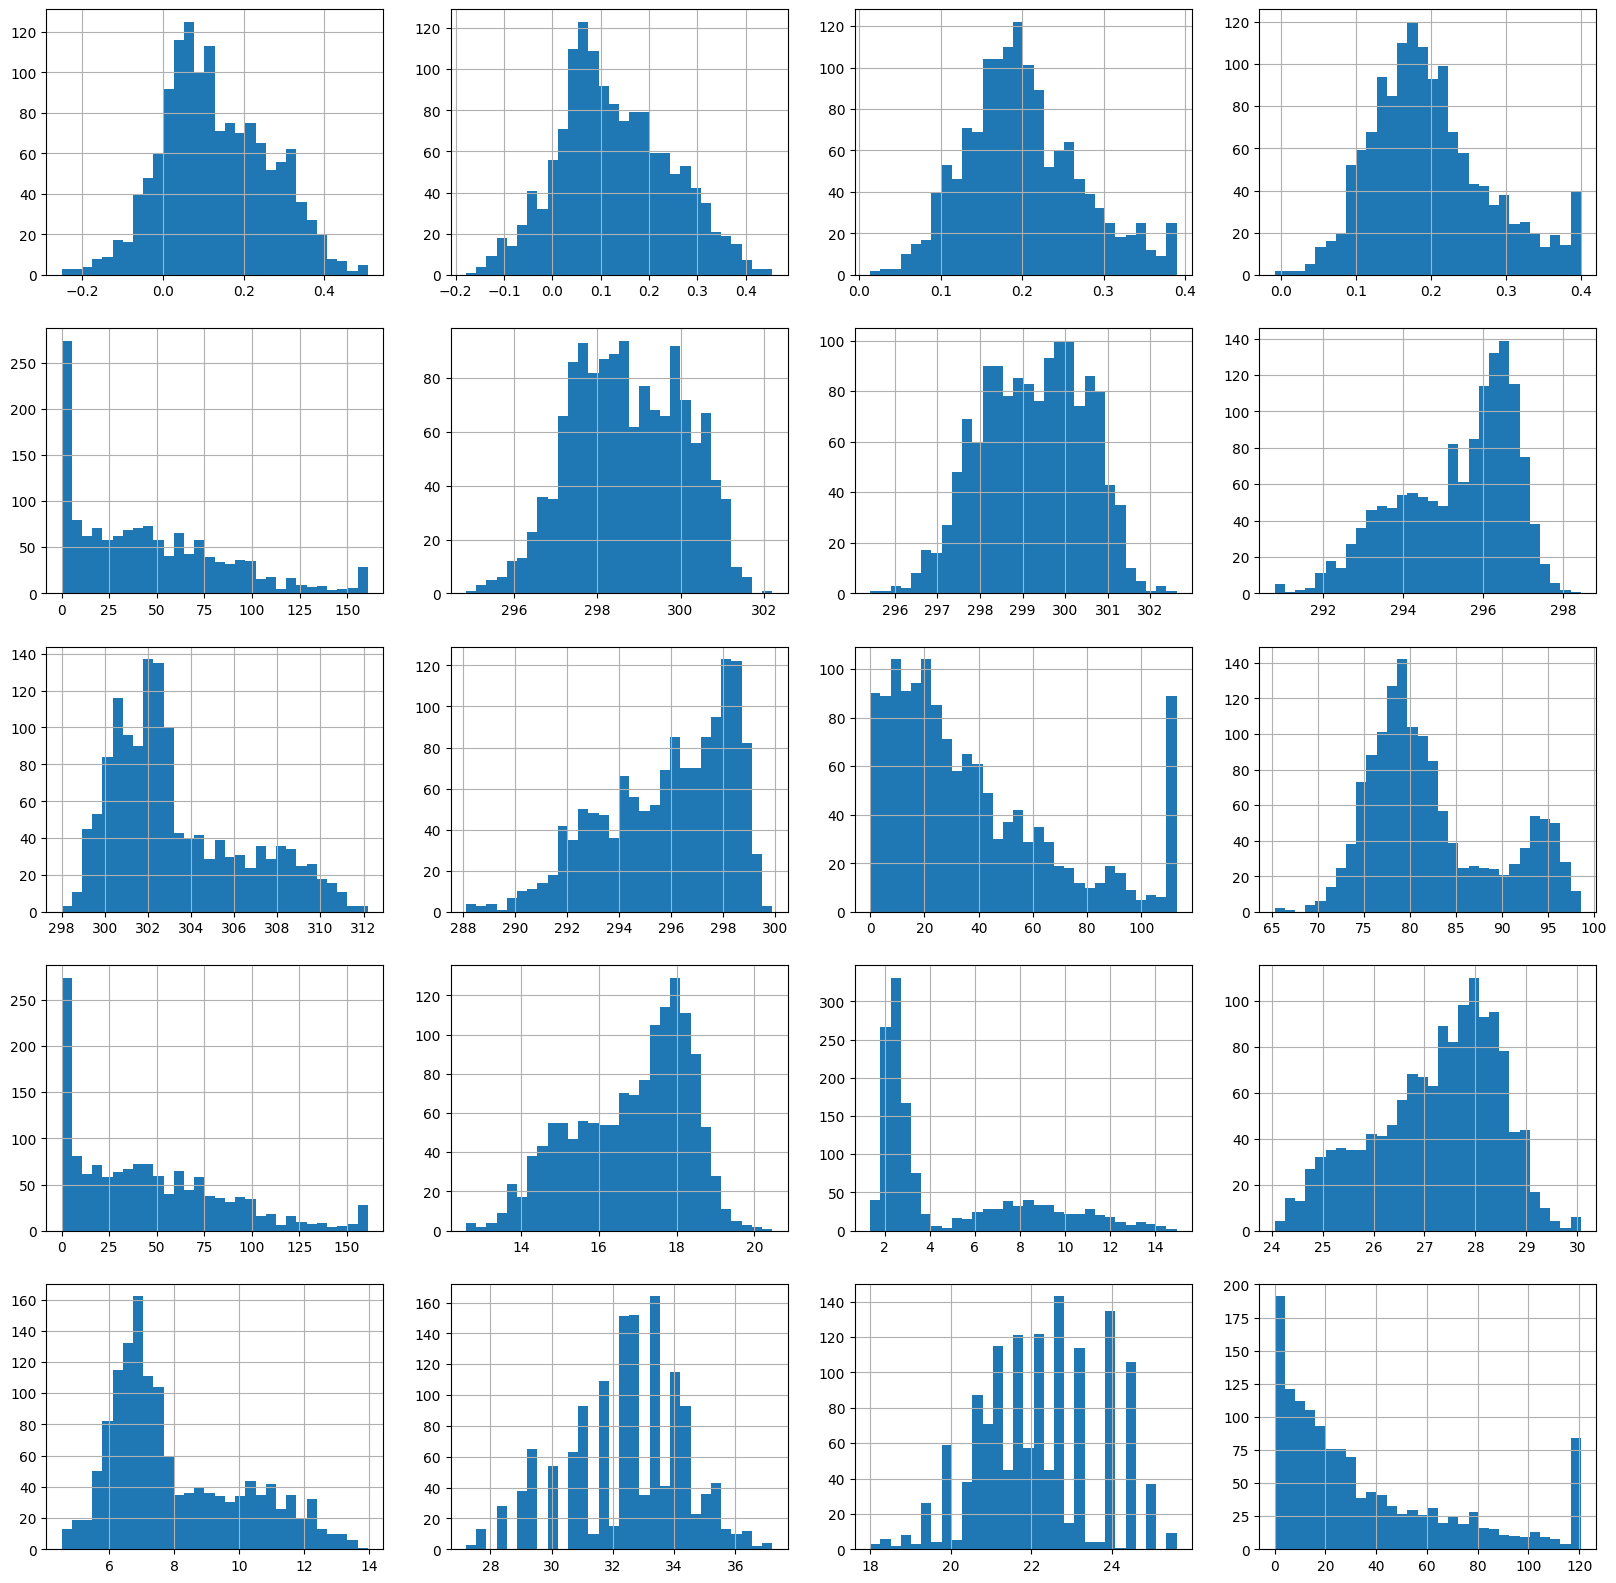

In [24]:
aux = ['year', 'weekofyear', 'city_bin']
cols = df.columns
for i in aux : cols = cols.drop(i)

#Dataset sin outliers
f, axes = plt.subplots(figsize=(20,20),nrows=5, ncols=4)
i = 0; j = 0
for col in cols :
  df[col].hist(bins=30, ax=axes[i, j])
  j += 1
  if (j == 4):
    j = 0; i += 1
plt.show()

In [25]:
print(df.shape)

(1385, 23)


Vamos a estandarizar tanto con **StandardScaler** como con **MinMaxScaler**

In [26]:
# EN ESTE CÓDIGO SE ESTANDARIZA EL DATAFRAME ORIGINAL (df)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Separamos las columnas que se van a estandarizar
cols_excluir = ['year', 'weekofyear', 'city_bin']
cols_estandarizar = [col for col in df.columns if col not in cols_excluir]

# Instanciar la clase StandardScaler y crear el dataframe
scaler = StandardScaler() #Se crea el objeto scaler de la clase StandardScaler
#Estandarizar el DataFrame
df_estandarizar_Z = pd.DataFrame(scaler.fit_transform(df[cols_estandarizar]), columns=cols_estandarizar)

# Reiniciar el índice de los dataframes
df_excluir = df[cols_excluir].reset_index(drop=True)
df_estandarizar_Z = df_estandarizar_Z.reset_index(drop=True)

# Verificar que no hay valores faltantes en las df construidas
print(df_excluir.isnull().any())
print(df_estandarizar_Z.isnull().any())

# Unir los dataframes
df_Z = pd.concat([df_excluir, df_estandarizar_Z], axis=1)

# Verificar que no hay valores faltantes en df_Z
print(df_Z.isnull().any())


# Instanciar la clase MinMaxScaler y crear dataframe
scaler = MinMaxScaler(feature_range=(0, 1)) #Se crea el objeto scaler de la clase MinMaxScaler
df_estandarizar_MinMax = pd.DataFrame(scaler.fit_transform(df[cols_estandarizar]), columns=cols_estandarizar)

# Unir los dataframes
df_MinMax = pd.concat([df_excluir, df_estandarizar_MinMax], axis=1)

# Verificar que no hay valores faltantes en df_MinMax
print(df_MinMax.isnull().any())


#RESULTADOS: df_Z y df_MinMax

year          False
weekofyear    False
city_bin      False
dtype: bool
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_precip_mm                  

Mostramos de nuevo la distribución de las variables para comprobar todas las variables se han estandarizado correctamente, esto es, que siguen la distribución normal estándar (media = 0 y desviación estándar = 1).

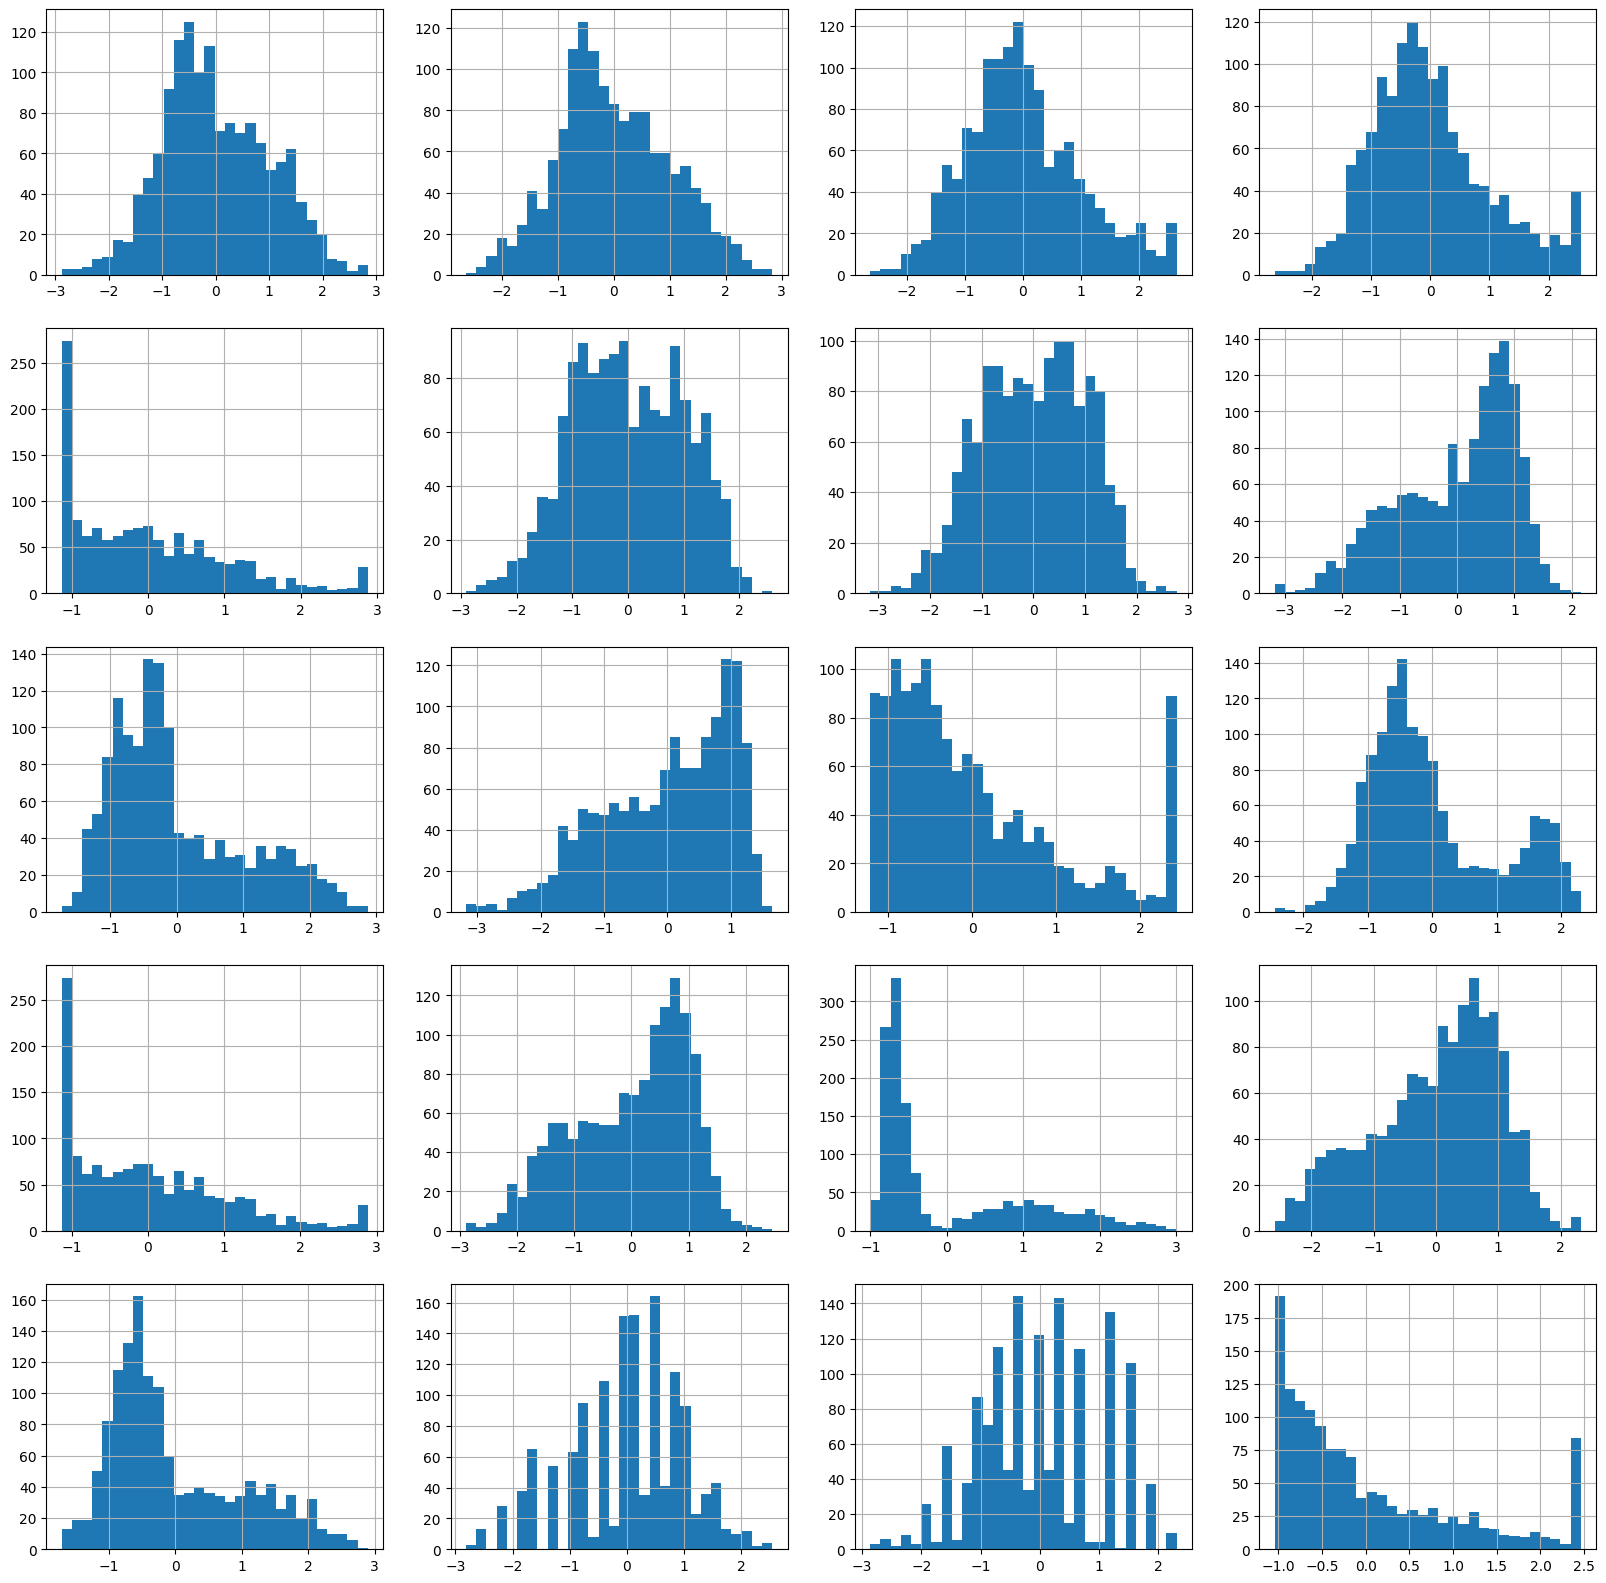

In [27]:
f, axes = plt.subplots(figsize=(20,20),nrows=5, ncols=4)
i = 0; j = 0
for col in cols :
  df_Z[col].hist(bins=30, ax=axes[i, j])
  j += 1
  if (j == 4):
    j = 0; i += 1
plt.show()

Asimismo, también se muestra la distribución de las variables para la estandarización MinMax.

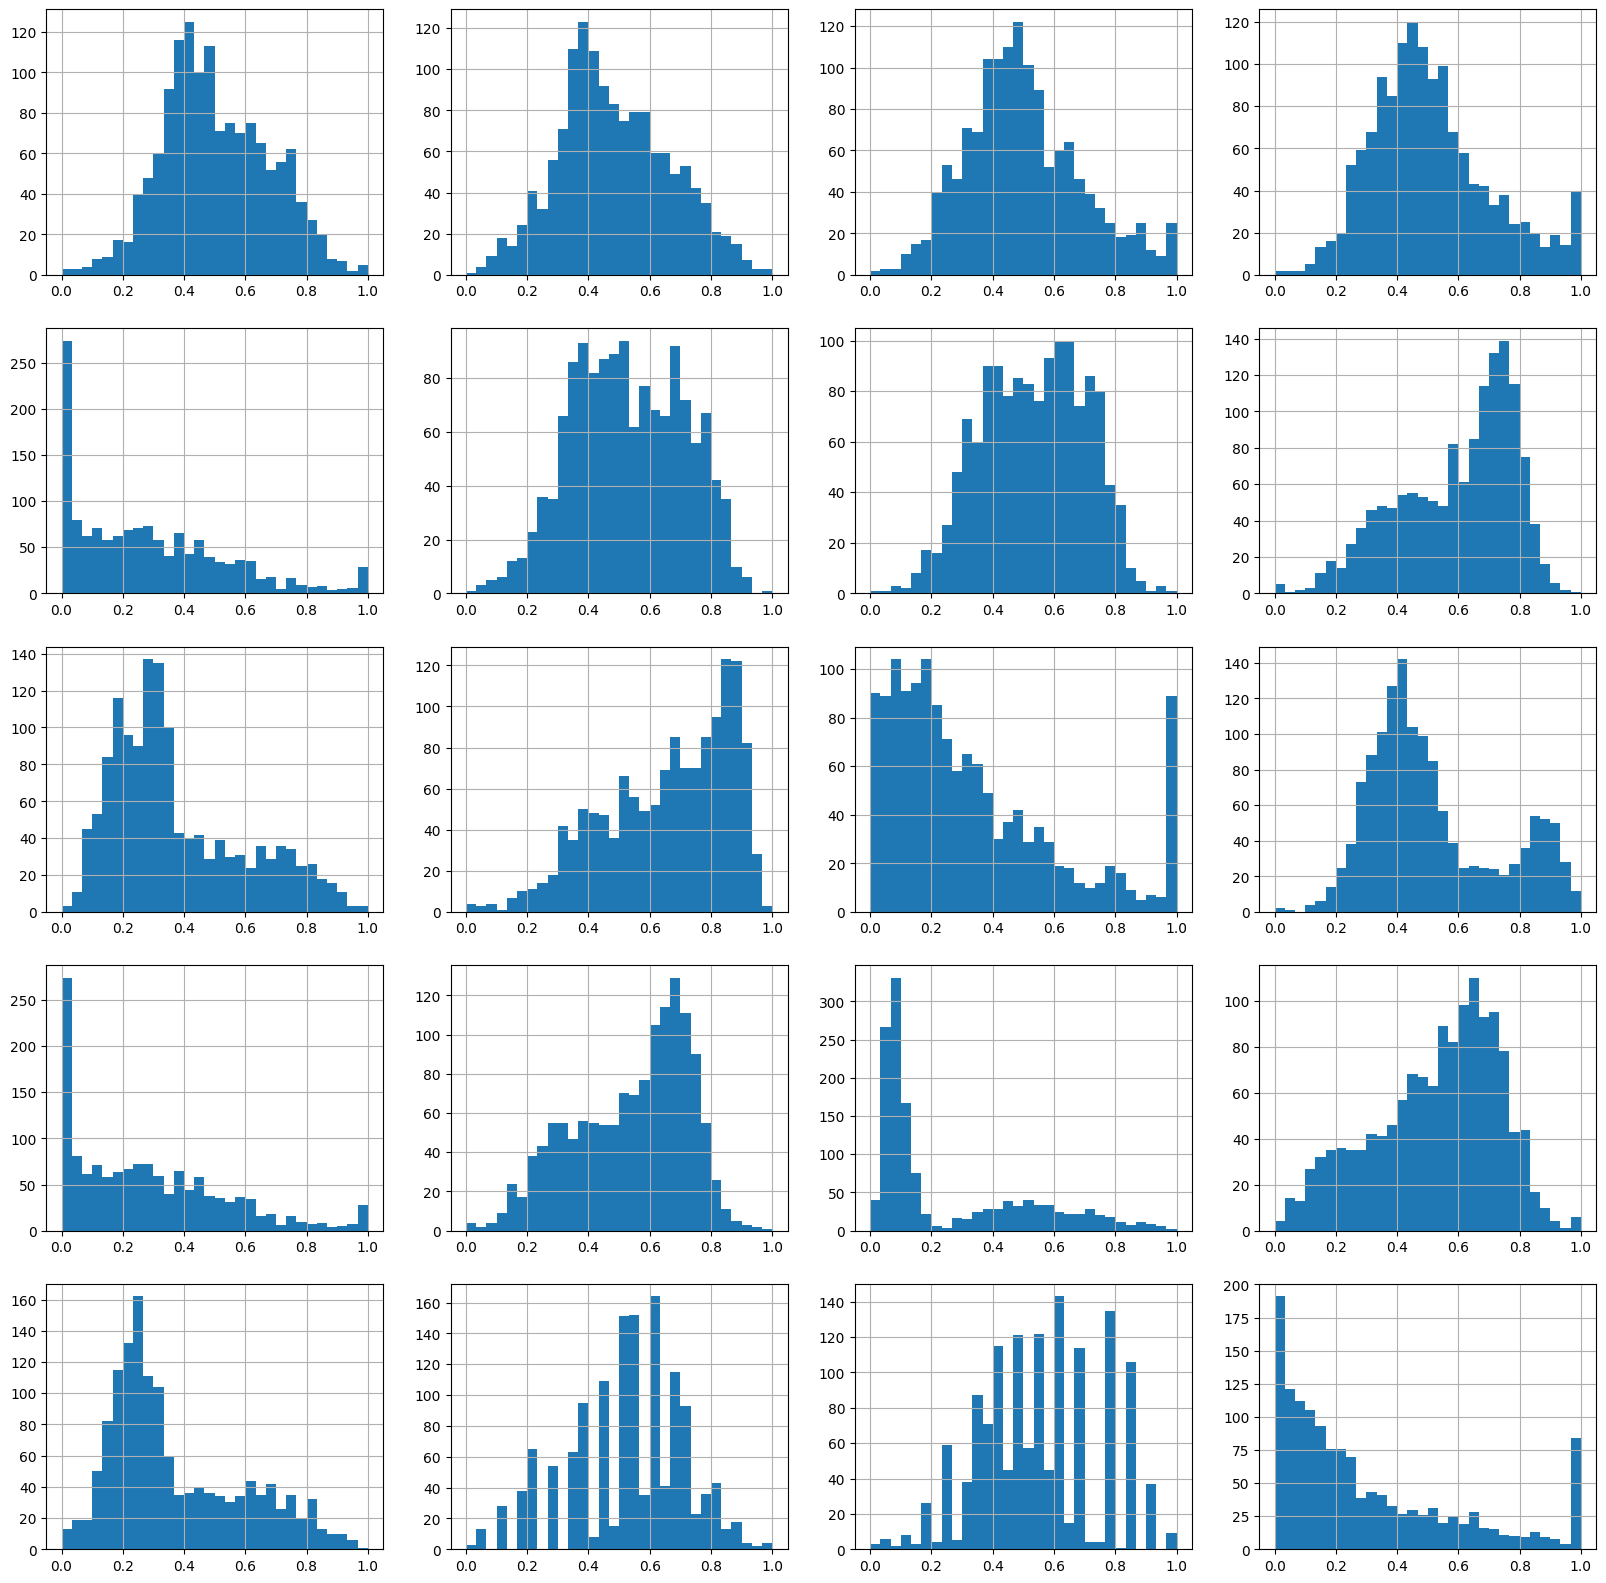

In [28]:
f, axes = plt.subplots(figsize=(20,20),nrows=5, ncols=4)
i = 0; j = 0
for col in cols :
  df_MinMax[col].hist(bins=30, ax=axes[i, j])
  j += 1
  if (j == 4):
    j = 0; i += 1
plt.show()

## 4.2. Descripción de los algorítmos de aprendizaje no supervisado

**Reducción de la dimensionalidad**

* **Selección de características**  
La selección de características es un proceso importante en el aprendizaje automático que implica la selección de un subconjunto de características relevantes y significativas para un modelo. El objetivo es reducir la complejidad del modelo y mejorar su rendimiento al mismo tiempo.

* **PCA**  
En el análisis de componentes principales, se busca reducir la dimensionalidad de los datos mediante la proyección de los datos originales en un espacio de menor dimensión.

**Algoritmos de Clustering**  
Un algoritmo de clustering es un algoritmo de aprendizaje no supervisado que agrupa un conjunto de datos en grupos o clústeres en función de la similitud entre los datos.

* **Clustering jerárquico**  
El clustering jerárquico es un algoritmo de agrupamiento que se utiliza para clasificar objetos en grupos o clusters. Se empieza considerando cada elemento como un cluster y se van agrupando por similitud. El resultado final es un árbol jerárquico o dendrograma donde se muestra la estructura de clusters y la relación que tienen entre ellos.

* **K-means (Clustering particionante)**  
Es un algoritmo de clustering divide el conjunto de datos en k clústeres, donde cada punto de datos se asigna al clúster con el centroide más cercano. A continuación, se calcula un nuevo centroide para cada clúster, y el proceso se repite hasta que no haya más cambios en la asignación de puntos de datos a los clústeres.

* **DBSCAN (Clustering basado en densidad)**  
DBSCAN es un algoritmo de clustering que se basa en la densidad de los puntos de datos para determinar los grupos, en lugar de usar distancias entre los puntos. Es decir, encuentra áreas de alta densidad de puntos de datos y los considera como un clúster.


## 4.3. Análisis para la reducción de características

### 4.3.1 Reducción de dimensionalidad (PCA): Análisis de características con la matriz transpuesta

En este apartado se quiere analizar las relaciones que hay entre las diferentes características. Para este objetivo se va a utilizar PCA.

Mediante **Análisis de Componentes Principales (PCA)**, se va a generar un conjunto nuevo de características cominando las originales mediante realcciones liales. El PCA va a ser útil para poder graficar los datos.

Este algoritmo utiliza los índices del Dataframe para hacer el análisis; es por ello que, para analizar las relaciones entre las características y ver los posibles grupos y/o realaciones que se pueden crear se va a transponer la matriz.

Como esta nueva matriz hay que volver a estandarizarla, se utilizará la estandarización Z-Score, tal y como se ha especificado en el apartado 4.1.

In [29]:
# Se crea un nuevo DataFrame con un índice de varias columnas que consiste en las columnas 'year', 'weekofyear' y 'city_bin
df_index = df_.set_index(['year', 'weekofyear', 'city_bin'])
df_trans = pd.DataFrame(np.transpose(df_index))

#print(df_trans.head())
df_trans.head()

year                       1990                                            \
weekofyear                   18         19         20         21       22   
city_bin                      1          1          1          1        1   
ndvi_ne                0.122600   0.169900   0.032250   0.128633  0.19620   
ndvi_nw                0.103725   0.142175   0.172967   0.245067  0.26220   
ndvi_se                0.198483   0.162357   0.157200   0.227557  0.25120   
ndvi_sw                0.177617   0.155486   0.170843   0.235886  0.24734   
precipitation_amt_mm  12.420000  22.820000  34.540000  15.360000  7.52000   

year                                                                        \
weekofyear                  23        24          25         26         27   
city_bin                     1         1           1          1          1   
ndvi_ne               0.154550  0.112900    0.072500   0.102450   0.147663   
ndvi_nw               0.174850  0.092800    0.072500   0.146175   0.121550   
ndvi_se               0.254314  0.205071    0.151471   0.125571   0.160683   
ndvi_sw               0.181743  0.210271    0.133029   0.123600   0.202567   
precipitation_amt_mm  9.580000  3.480000  151.120000  19.320000  14.410000   

year                  ...       2010                                   \
weekofyear            ...         16         17         18         19   
city_bin              ...          0          0          0          0   
ndvi_ne               ...   0.231486   0.239743   0.260814   0.168686   
ndvi_nw               ...   0.294686   0.259271   0.255786   0.158500   
ndvi_se               ...   0.331657   0.307786   0.257771   0.133071   
ndvi_sw               ...   0.244400   0.307943   0.340286   0.145600   
precipitation_amt_mm  ...  86.700000  26.000000  73.970000  59.400000   

year                                                                        \
weekofyear                  20         21         22         23         24   
city_bin                     0          0          0          0          0   
ndvi_ne               0.263071   0.342750   0.160157   0.247057   0.333914   
ndvi_nw               0.272500   0.318900   0.160371   0.146057   0.245771   
ndvi_se               0.258271   0.256343   0.136043   0.250357   0.278886   
ndvi_sw               0.244500   0.292514   0.225657   0.233714   0.325486   
precipitation_amt_mm  1.150000  55.300000  86.470000  58.940000  59.670000   

year                             
weekofyear                   25  
city_bin                      0  
ndvi_ne                0.298186  
ndvi_nw                0.232971  
ndvi_se                0.274214  
ndvi_sw                0.315757  
precipitation_amt_mm  63.220000  

[5 rows x 1385 columns]

In [30]:
# Estandarización de la matriz transpuesta
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos usando StandardScaler y crear el dataframe
scaler = StandardScaler()
df_trans_scaled = pd.DataFrame(scaler.fit_transform(df_trans))

df_trans_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384
0,-0.704858,-0.709114,-0.749815,-0.699941,-0.694573,-0.720688,-0.714212,-0.841348,-0.729475,-0.706570,...,-0.851485,-0.746079,-0.811870,-0.814764,-0.681358,-0.786031,-0.854105,-0.773417,-0.787880,-0.784016
1,-0.705013,-0.709340,-0.748653,-0.698999,-0.694040,-0.720523,-0.714376,-0.841348,-0.729118,-0.706781,...,-0.850950,-0.745919,-0.811912,-0.814849,-0.681282,-0.786229,-0.854103,-0.774256,-0.788617,-0.784559
2,-0.704239,-0.709175,-0.748783,-0.699140,-0.694129,-0.719876,-0.713463,-0.840698,-0.729286,-0.706464,...,-0.850638,-0.745521,-0.811895,-0.815063,-0.681397,-0.786748,-0.854308,-0.773389,-0.788340,-0.784215
3,-0.704409,-0.709231,-0.748671,-0.699073,-0.694160,-0.720467,-0.713421,-0.840850,-0.729302,-0.706126,...,-0.851376,-0.745520,-0.811206,-0.814958,-0.681508,-0.786448,-0.853553,-0.773528,-0.787950,-0.783870
4,-0.604429,-0.524437,-0.464974,-0.576627,-0.635504,-0.643965,-0.686852,0.402951,-0.572479,-0.591307,...,-0.120354,-0.534696,-0.195799,-0.317757,-0.674214,-0.329754,-0.126441,-0.285543,-0.291883,-0.260176


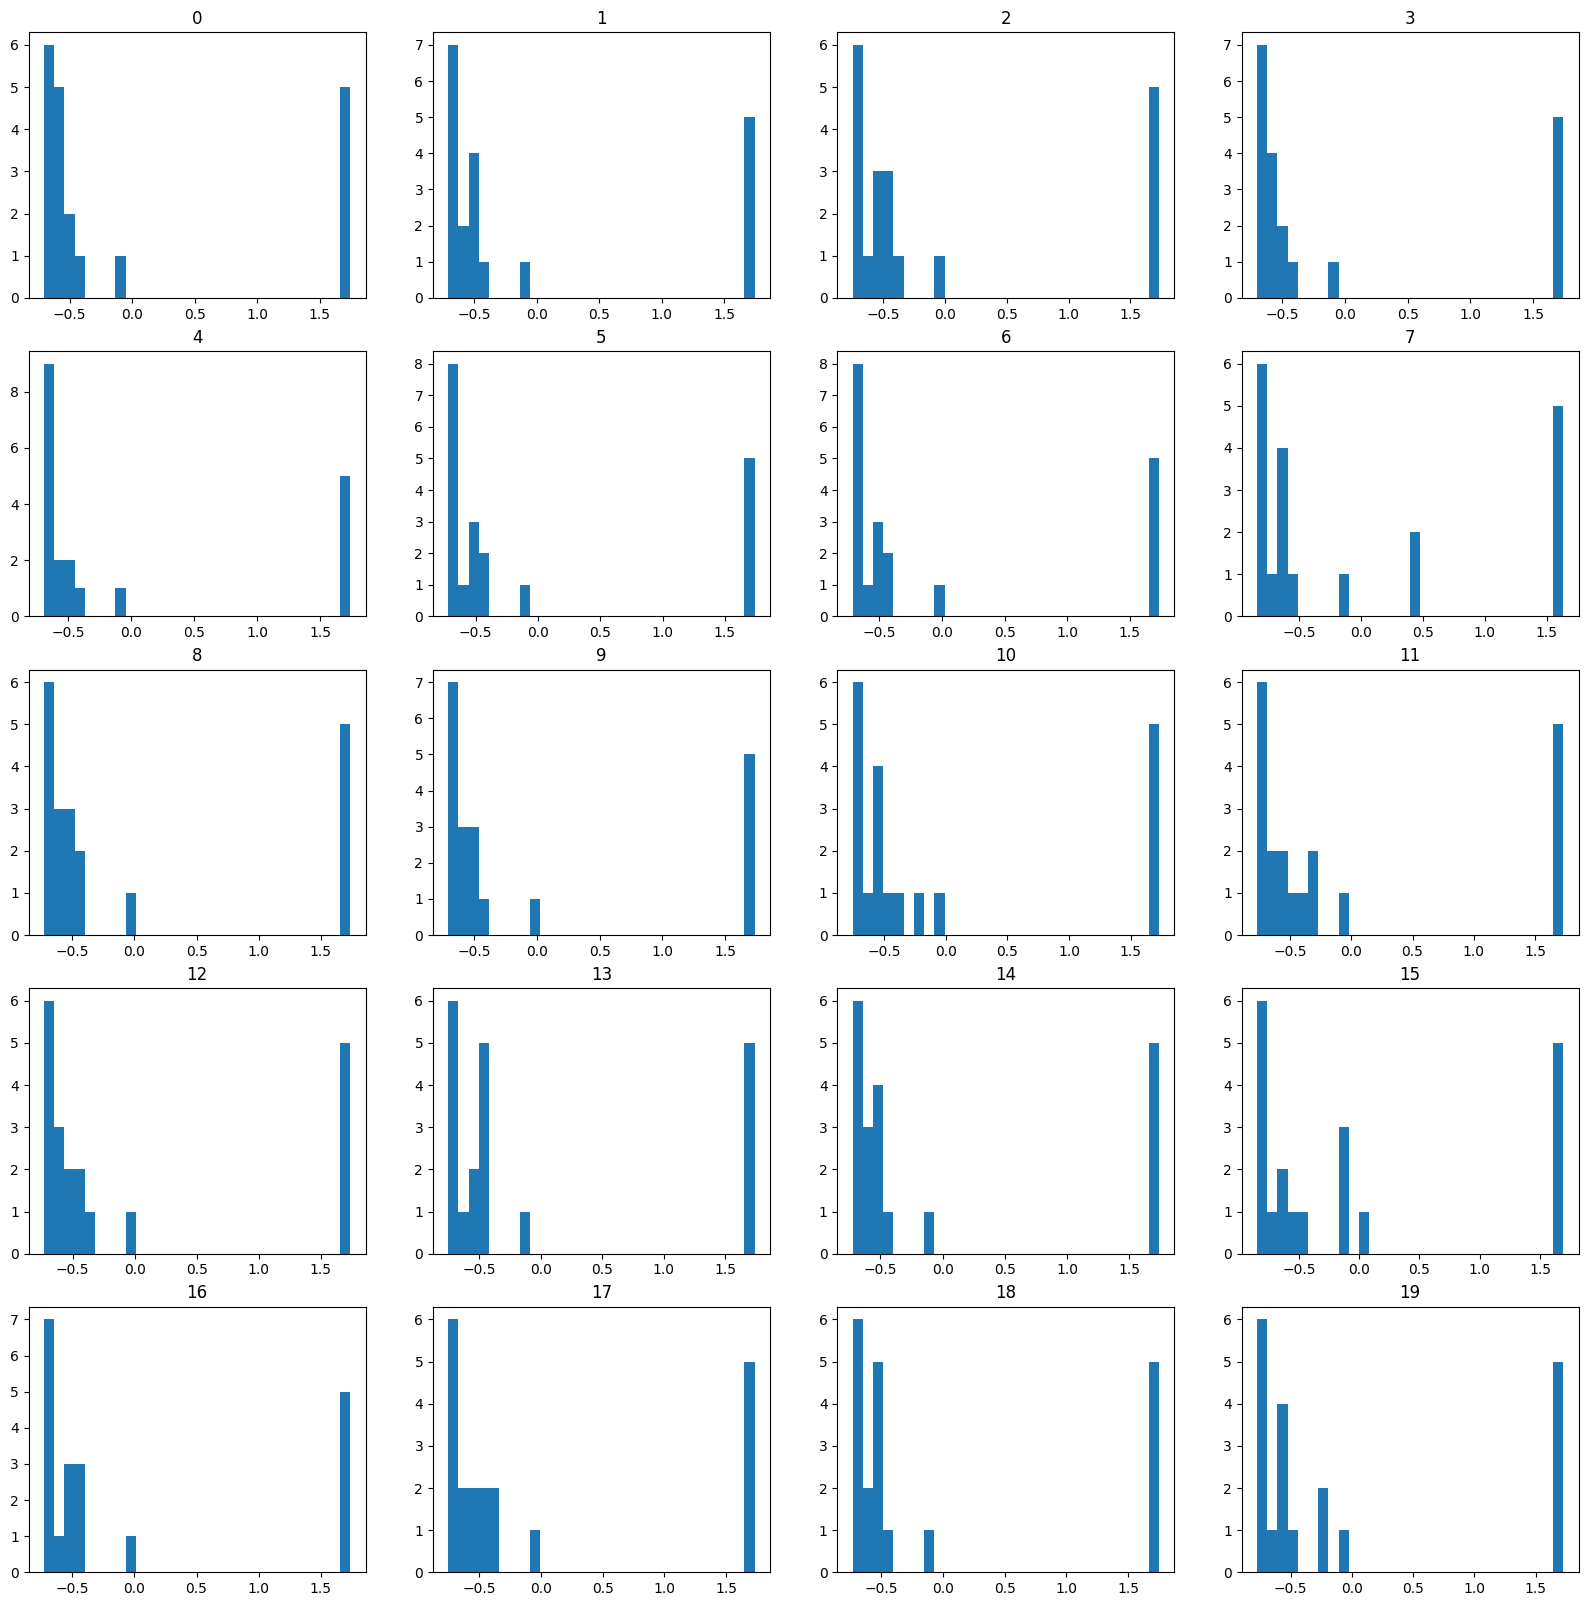

In [31]:
# Obtener nombres de las columnas
cols = df_trans_scaled.columns[:20]

# Graficar histogramas de cada columna para ver las distribuciones
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
for i, col in enumerate(cols):
    ax = axs[i//4, i%4]
    ax.hist(df_trans_scaled[col], bins=30)
    ax.set_title(col)
plt.show()

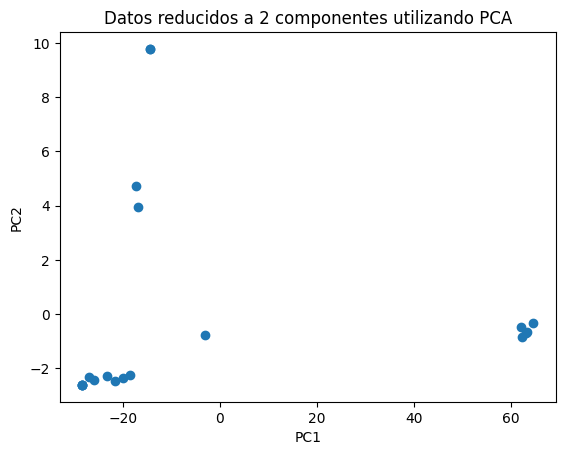

Componentes lineales:
 [[ 0.02698749  0.02700582  0.02706014 ...  0.02700663  0.02700714
   0.02703472]
 [-0.02038869 -0.0177787  -0.00653778 ...  0.0050582   0.00770589
   0.00668488]] 

Los vectores de componentes principales (almacenados en pca.components)
representan las direcciones de máxima varianza en los datos originales, 
y se utilizan para transformar los datos de entrada en las nuevas dimensiones reducidas.

Ratio de variabilidad:  [0.98478646 0.01053296] 

El ratio de varianza explicada por cada componente principal (almacenado en pca.explained_variance_ratio_) 
indica cuánto de la varianza total de os datos originales es capturado por cada componente principal. 
Este valor se utiliza para evaluar la calidad de la reducción de dimensionalidad y determinar cuántas componentes principales son necesarias para representar adecuadamente los datos.


In [32]:
from sklearn.decomposition import PCA

# Aplicar PCA a la matriz transpuesta
pca = PCA(n_components=2)
principal_components_trans = pca.fit_transform(df_trans_scaled)
principal_df_PCA = pd.DataFrame(data=principal_components_trans, columns=['PC1', 'PC2'])

# Visualizar los datos en un scatter plot
fig, ax = plt.subplots()
ax.scatter(principal_df_PCA['PC1'], principal_df_PCA['PC2'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Datos reducidos a 2 componentes utilizando PCA')
plt.show()

print("Componentes lineales:\n", pca.components_,"\n")


print("Los vectores de componentes principales (almacenados en pca.components)\nrepresentan las direcciones de máxima varianza en los datos originales, \ny se utilizan para transformar los datos de entrada en las nuevas dimensiones reducidas.")

print("\nRatio de variabilidad: ", pca.explained_variance_ratio_, "\n")

print("El ratio de varianza explicada por cada componente principal (almacenado en pca.explained_variance_ratio_) \nindica cuánto de la varianza total de os datos originales es capturado por cada componente principal. \nEste valor se utiliza para evaluar la calidad de la reducción de dimensionalidad y determinar cuántas componentes principales son necesarias para representar adecuadamente los datos.")

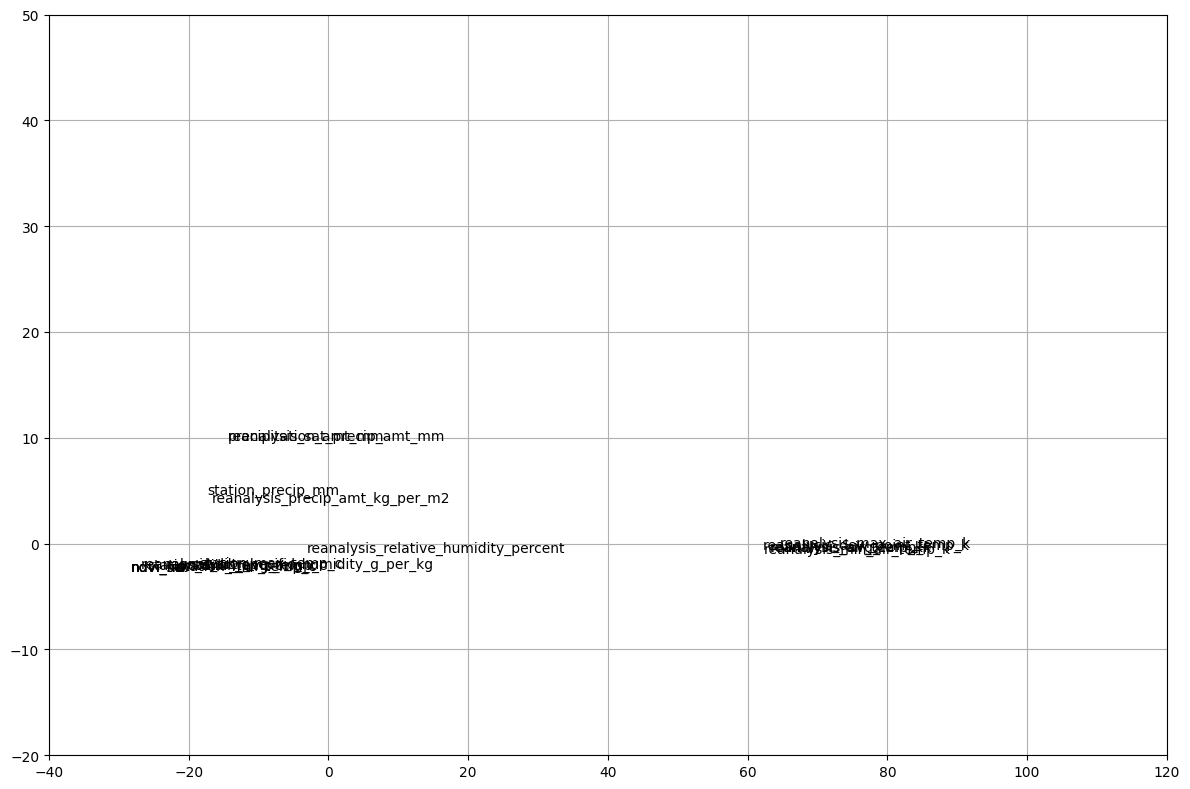

In [33]:
#Graficar mediante un scratter plot los resultados obtenidos del PCA, junto con el nombre de cada característica.
names = df_trans.index

fig, ax = plt.subplots(figsize=(12, 8))
for i in range(len(principal_components_trans)):
    plt.text(principal_components_trans[i][0], principal_components_trans[i][1], names[i], fontsize=10)

plt.xlim(-40,120)
plt.ylim(-20, 50)
ax.grid(True)
fig.tight_layout()
plt.show()

In [34]:
#Posición de las coordenadas de cada cararcterística en la los datos obtenidos por PCA (2D)
for i in range(len(principal_components_trans)):
    print(principal_components_trans[i][0], principal_components_trans[i][1], names[i])

-28.35744038075658 -2.6032951527257535 ndvi_ne
-28.358590503067393 -2.6052514790998047 ndvi_nw
-28.33616846975536 -2.611164325270914 ndvi_se
-28.336679214272102 -2.609565679012065 ndvi_sw
-14.368089446666666 9.771118025653394 precipitation_amt_mm
63.172101869859524 -0.7075857957450921 reanalysis_air_temp_k
63.33099692793196 -0.644534743573472 reanalysis_avg_temp_k
62.137459630561295 -0.479584862590711 reanalysis_dew_point_temp_k
64.5893525135213 -0.3230559461085515 reanalysis_max_air_temp_k
62.287638691189564 -0.834184875317349 reanalysis_min_air_temp_k
-16.770260463644007 3.9649907887166727 reanalysis_precip_amt_kg_per_m2
-3.1080464730149813 -0.7695388400558879 reanalysis_relative_humidity_percent
-14.367122737168712 9.773958566843776 reanalysis_sat_precip_amt_mm
-23.232634190726806 -2.2799722860955254 reanalysis_specific_humidity_g_per_kg
-26.93443656066147 -2.3177271237797235 reanalysis_tdtr_k
-20.050749447363515 -2.356974037703826 station_avg_temp_c
-25.932511079309812 -2.413950201

El ratio de variabilidad por eje es bueno, con el eje X se representa casi el 100% de la variabilidad del conjunto de datos.

Una vez que hemos verificado que el resultado es fiable podemos ver que muchas de las variables son muy parecidas entre ellas. Parece que se han formado 4 grupos de características.

In [35]:
# Dataframe obtenido mediante PCA
principal_df_PCA.head()

,PC1,PC2
0,-28.357440,-2.603295
1,-28.358591,-2.605251
2,-28.336168,-2.611164
3,-28.336679,-2.609566
4,-14.368089,9.771118


In [36]:
# Se va a modificar el DataFrame con los datos graficados junto con los nombres

data = []
for i in range(len(principal_components_trans)):
    data.append({
        'PC1': principal_components_trans[i][0],
        'PC2': principal_components_trans[i][1],
        'name': names[i]
    })

principal_df_PCA = pd.DataFrame(data).set_index('name')

principal_df_PCA.head()

,PC1,PC2
name,,
ndvi_ne,-28.357440,-2.603295
ndvi_nw,-28.358591,-2.605251
ndvi_se,-28.336168,-2.611164
ndvi_sw,-28.336679,-2.609566
precipitation_amt_mm,-14.368089,9.771118


### 4.3.2. Clustering particionante mediante k-means (con el df reducido por PCA)

#### 4.3.2.1. Elbow Method

Se ha empleado el **Elbow Method** para encontrar el valor óptimo de k (número de clusters)

Para ello, se debe ejecutar el algoritmo K-means para diferentes valores de K y registrar la suma de los errores cuadrados (SSE) de cada cluster.


***NOTA: Valores por defecto en class sklearn.cluster.KMeans***

class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')

* 'random_state':  
El parámetro random_state se utiliza para controlar la selección inicial de los centroides del algoritmo k-means.  
El algoritmo k-means se inicializa seleccionando aleatoriamente k centroides de los datos de entrada. Si el parámetro random_state se establece en un valor fijo, los centroides iniciales se seleccionarán de la misma manera en cada ejecución del algoritmo. Esto es útil para la reproducibilidad de los resultados y para comparar diferentes ejecuciones del algoritmo.  
Por otro lado, si random_state no se establece en un valor fijo, los centroides iniciales se seleccionarán aleatoriamente en cada ejecución del algoritmo. En este caso, los resultados pueden variar ligeramente entre diferentes ejecuciones, lo que puede ser útil para explorar diferentes soluciones en busca de la mejor.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

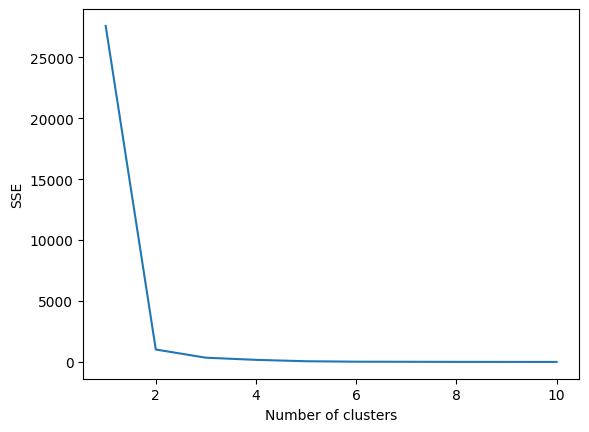

In [37]:
# Importamos la biblioteca necesaria
from sklearn.cluster import KMeans

# Seleccionamos el rango de valores k que vamos a probar () y calculamos el error cuadrático medio para cada valor
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(principal_df_PCA)
    sse.append(kmeans.inertia_) # el método .inertia_ del ainsancia de la clase KMeans almacena la SSE de cada cúster

# Trazamos la gráfica de SSE en función de número de clústers k.
# Para determinar k, hay que observar le punto en el que se produce una disminución significativamente menor en SSE
plt.plot(k_range, sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


In [38]:
# Para determinar el punto de codo (inflexión) se va a calcular la pendiente de la curva.
diff = np.diff(sse) #Primera derivada
diff_r = diff[1:] / diff[:-1] #Aproximación numérica de la segunda derivada (el valor óptimo de k se encuentra en el punto de inflexión de la curva SSE vs k)
# Encontrar el punto de codo
k_elbow = np.argmin(diff_r) + 2  # +2 ya que diff tiene una entrada menos que sse
print("Elbow found at k=%d" % k_elbow)

Elbow found at k=2


#### 4.3.2.2. K-means k=2

Como en *Elbow Method* se ha obtenido el valor k=2, se va a ejecutar el algoritmo K-means para este valor.

In [39]:
# Ejecutar K-means con k=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(principal_df_PCA)

# Obtener la etiqueta de cluster para cada muestra
labels = kmeans.labels_

# Obtener las coordenadas de los centroides para cada cluster
centroids = kmeans.cluster_centers_

# Crear un diccionario para almacenar los resultados
results_kmeans = {"cluster": labels}

# Recorrer las columnas del dataframe y añadirlas al diccionario
for col in principal_df_PCA.columns:
    results_kmeans[col] = principal_df_PCA[col]

# Convertir el diccionario en un DataFrame de pandas
df_results_kmeans = pd.DataFrame(results_kmeans)

# Imprimir los resultados
print(df_results_kmeans.head())
print(df_results_kmeans.shape)

# Imprimir los centroides
print(centroids)

                      cluster        PC1       PC2
name                                              
ndvi_ne                     0 -28.357440 -2.603295
ndvi_nw                     0 -28.358591 -2.605251
ndvi_se                     0 -28.336168 -2.611164
ndvi_sw                     0 -28.336679 -2.609566
precipitation_amt_mm        0 -14.368089  9.771118
(20, 3)
[[-21.03450331   0.19926308]
 [ 63.10350993  -0.59778924]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


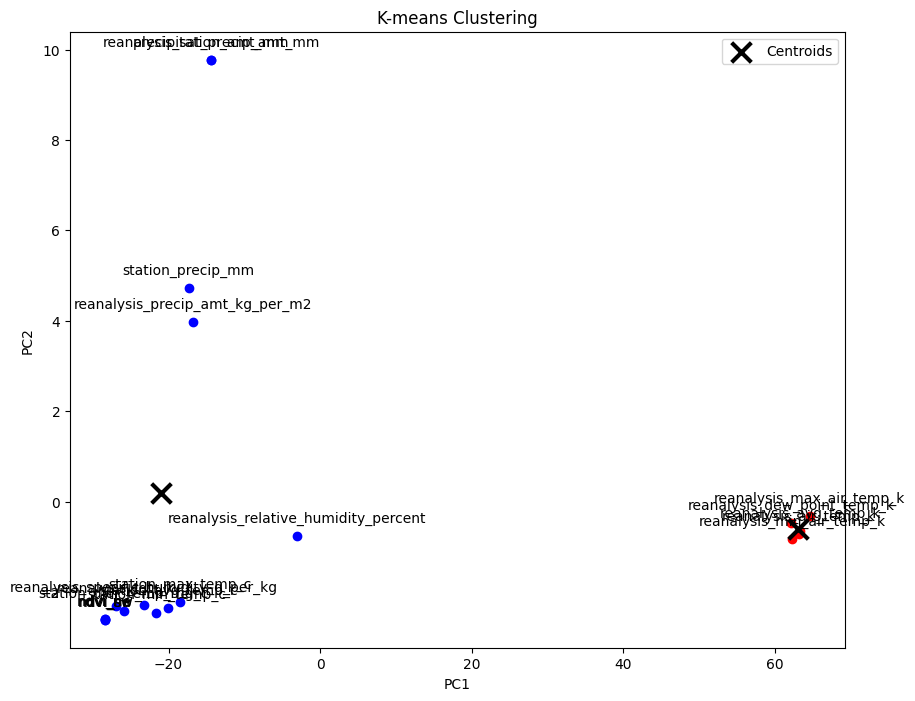

In [40]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 8))

# Graficar el scatter plot con los colores correspondientes a cada cluster y los nombres de los índices
colors = ['b', 'r']
for i in range(len(colors)):
    for index, row in df_results_kmeans[df_results_kmeans['cluster'] == i].iterrows():
        x = row['PC1']
        y = row['PC2']
        name = index
        plt.scatter(x, y, c=colors[i], label='Cluster {}'.format(i) if index == 0 else "")
        plt.annotate(name, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Graficar los centroides
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='k', label='Centroids')

# Personalizar la gráfica
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering')
plt.legend()
plt.show()


In [41]:
# Iterar sobre cada índice y su respectivo cluster
for index, cluster in zip(df_results_kmeans.index, df_results_kmeans['cluster']):
    print(f"{index} --> {cluster}")

ndvi_ne --> 0
ndvi_nw --> 0
ndvi_se --> 0
ndvi_sw --> 0
precipitation_amt_mm --> 0
reanalysis_air_temp_k --> 1
reanalysis_avg_temp_k --> 1
reanalysis_dew_point_temp_k --> 1
reanalysis_max_air_temp_k --> 1
reanalysis_min_air_temp_k --> 1
reanalysis_precip_amt_kg_per_m2 --> 0
reanalysis_relative_humidity_percent --> 0
reanalysis_sat_precip_amt_mm --> 0
reanalysis_specific_humidity_g_per_kg --> 0
reanalysis_tdtr_k --> 0
station_avg_temp_c --> 0
station_diur_temp_rng_c --> 0
station_max_temp_c --> 0
station_min_temp_c --> 0
station_precip_mm --> 0


#### 4.2.2.3. K-means k=4

Mediante *Elbow Method* se haya obtenido el valor k=2. Sin embargo, tras analizar tanto el *scatter plot* realizado con el df del PCA, como el gráfico realizado con los datos de K-means (k=2), se ha decido probar con el valor k=4.

Aunque en el anterior gráfico haya dos clusters claramente diferenciados (derecha e izquierda) también se puede concluir la posibilidad de que existan 4 clusters.

In [42]:
# Ejecutar K-means con k=4
kmeans = KMeans(n_clusters=4)
kmeans.fit(principal_df_PCA)

# Obtener la etiqueta de cluster para cada muestra
labels = kmeans.labels_

# Obtener las coordenadas de los centroides para cada cluster
centroids = kmeans.cluster_centers_

# Crear un diccionario para almacenar los resultados
results_kmeans = {"cluster": labels}

# Recorrer las columnas del dataframe y añadirlas al diccionario
for col in principal_df_PCA.columns:
    results_kmeans[col] = principal_df_PCA[col]

# Convertir el diccionario en un DataFrame de pandas
df_results_kmeans = pd.DataFrame(results_kmeans)

# Imprimir los resultados
print(df_results_kmeans.head())
print(df_results_kmeans.shape)

# Imprimir los centroides
print(centroids)

                      cluster        PC1       PC2
name                                              
ndvi_ne                     0 -28.357440 -2.603295
ndvi_nw                     0 -28.358591 -2.605251
ndvi_se                     0 -28.336168 -2.611164
ndvi_sw                     0 -28.336679 -2.609566
precipitation_amt_mm        2 -14.368089  9.771118
(20, 3)
[[-24.95786922  -2.44806562]
 [ 63.10350993  -0.59778924]
 [-15.70770273   7.05978533]
 [ -3.10804647  -0.76953884]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


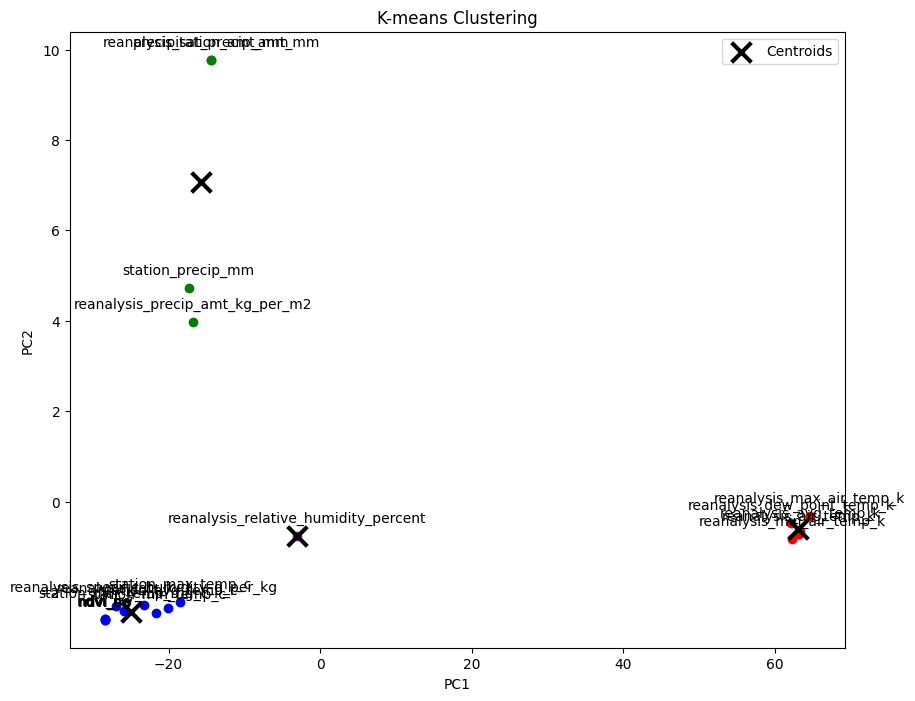

In [43]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 8))

# Graficar el scatter plot con los colores correspondientes a cada cluster y los nombres de los índices
colors = ['b', 'r', 'g', 'm']
for i in range(len(colors)):
    for index, row in df_results_kmeans[df_results_kmeans['cluster'] == i].iterrows():
        x = row['PC1']
        y = row['PC2']
        name = index
        plt.scatter(x, y, c=colors[i], label='Cluster {}'.format(i) if index == 0 else "")
        plt.annotate(name, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Graficar los centroides
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='k', label='Centroids')

# Personalizar la gráfica
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [44]:
# Iterar sobre cada índice y su respectivo cluster
df_results_sorted = df_results_kmeans.sort_values('cluster')

# Iterar sobre cada índice y su respectivo cluster
for index, cluster in zip(df_results_sorted.index, df_results_sorted['cluster']):
    print(f"{index} --> {cluster}")

cluster_counts = df_results_sorted['cluster'].value_counts()
print(cluster_counts)

ndvi_ne --> 0
ndvi_nw --> 0
ndvi_se --> 0
ndvi_sw --> 0
station_max_temp_c --> 0
station_diur_temp_rng_c --> 0
station_avg_temp_c --> 0
reanalysis_tdtr_k --> 0
reanalysis_specific_humidity_g_per_kg --> 0
station_min_temp_c --> 0
reanalysis_min_air_temp_k --> 1
reanalysis_max_air_temp_k --> 1
reanalysis_dew_point_temp_k --> 1
reanalysis_avg_temp_k --> 1
reanalysis_air_temp_k --> 1
reanalysis_sat_precip_amt_mm --> 2
precipitation_amt_mm --> 2
reanalysis_precip_amt_kg_per_m2 --> 2
station_precip_mm --> 2
reanalysis_relative_humidity_percent --> 3
0    10
1     5
2     4
3     1
Name: cluster, dtype: int64


En este caso se han creado 4 clusters (0, 1, 2 y 3). En el anterior *print* se detalla a que cluster pertenece cada una de las características.

### 4.3.3 Clustering particionante mediante K-means (con el df original transpuesto)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

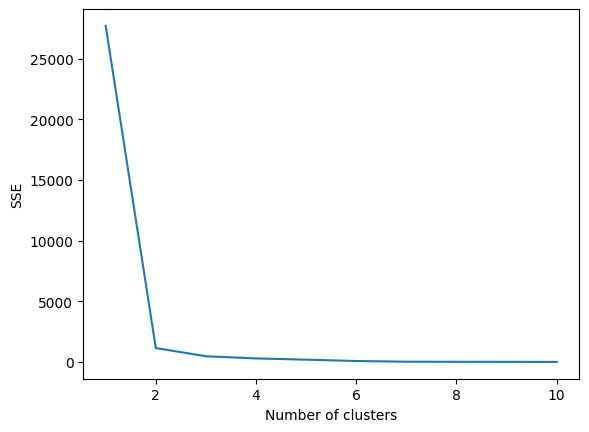

In [45]:
# Importamos la biblioteca necesaria
from sklearn.cluster import KMeans

# Seleccionamos el rango de valores k que vamos a probar () y calculamos el error cuadrático medio para cada valor
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_trans_scaled)
    sse.append(kmeans.inertia_) # el método .inertia_ del ainsancia de la clase KMeans almacena la SSE de cada cúster

# Trazamos la gráfica de SSE en función de número de clústers k.
# Para determinar k, hay que observar le punto en el que se produce una disminución significativamente menor en SSE
plt.plot(k_range, sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


Aunque en este caso, k=2, siguendo las conclusiones obtenidas en el punto 4.3.2, se ha decidido ejecutar K-means con k=4 en el df transpuesto para verificar que los cluster creados son iguales.

In [46]:
# Ejecutar K-means con k=4
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_trans_scaled)

# Obtener la etiqueta de cluster para cada muestra
labels = kmeans.labels_

# Obtener las coordenadas de los centroides para cada cluster
centroids = kmeans.cluster_centers_

# Crear un diccionario para almacenar los resultados
results_kmeans = {"cluster": labels}

# Recorrer las columnas del dataframe y añadirlas al diccionario
for col in df_trans_scaled.columns:
    results_kmeans[col] = df_trans_scaled[col]

# Convertir el diccionario en un DataFrame de pandas
df_results_kmeans = pd.DataFrame(results_kmeans)

# Imprimir los resultados
print(df_results_kmeans.head())
print(df_results_kmeans.shape)

# Imprimir los centroides
print(centroids)

   cluster         0         1         2         3         4         5  \
0        2 -0.704858 -0.709114 -0.749815 -0.699941 -0.694573 -0.720688   
1        2 -0.705013 -0.709340 -0.748653 -0.698999 -0.694040 -0.720523   
2        2 -0.704239 -0.709175 -0.748783 -0.699140 -0.694129 -0.719876   
3        2 -0.704409 -0.709231 -0.748671 -0.699073 -0.694160 -0.720467   
4        3 -0.604429 -0.524437 -0.464974 -0.576627 -0.635504 -0.643965   

          6         7         8  ...      1375      1376      1377      1378  \
0 -0.714212 -0.841348 -0.729475  ... -0.851485 -0.746079 -0.811870 -0.814764   
1 -0.714376 -0.841348 -0.729118  ... -0.850950 -0.745919 -0.811912 -0.814849   
2 -0.713463 -0.840698 -0.729286  ... -0.850638 -0.745521 -0.811895 -0.815063   
3 -0.713421 -0.840850 -0.729302  ... -0.851376 -0.745520 -0.811206 -0.814958   
4 -0.686852  0.402951 -0.572479  ... -0.120354 -0.534696 -0.195799 -0.317757   

       1379      1380      1381      1382      1383      1384  
0 -0.68135

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [47]:
df_results_kmeans = df_results_kmeans.set_index(names)
df_results_kmeans.head()

,cluster,0,1,2,3,4,5,6,7,8,...,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384
ndvi_ne,2,-0.704858,-0.709114,-0.749815,-0.699941,-0.694573,-0.720688,-0.714212,-0.841348,-0.729475,...,-0.851485,-0.746079,-0.811870,-0.814764,-0.681358,-0.786031,-0.854105,-0.773417,-0.787880,-0.784016
ndvi_nw,2,-0.705013,-0.709340,-0.748653,-0.698999,-0.694040,-0.720523,-0.714376,-0.841348,-0.729118,...,-0.850950,-0.745919,-0.811912,-0.814849,-0.681282,-0.786229,-0.854103,-0.774256,-0.788617,-0.784559
ndvi_se,2,-0.704239,-0.709175,-0.748783,-0.699140,-0.694129,-0.719876,-0.713463,-0.840698,-0.729286,...,-0.850638,-0.745521,-0.811895,-0.815063,-0.681397,-0.786748,-0.854308,-0.773389,-0.788340,-0.784215
ndvi_sw,2,-0.704409,-0.709231,-0.748671,-0.699073,-0.694160,-0.720467,-0.713421,-0.840850,-0.729302,...,-0.851376,-0.745520,-0.811206,-0.814958,-0.681508,-0.786448,-0.853553,-0.773528,-0.787950,-0.783870
precipitation_amt_mm,3,-0.604429,-0.524437,-0.464974,-0.576627,-0.635504,-0.643965,-0.686852,0.402951,-0.572479,...,-0.120354,-0.534696,-0.195799,-0.317757,-0.674214,-0.329754,-0.126441,-0.285543,-0.291883,-0.260176


In [48]:
# Iterar sobre cada índice y su respectivo cluster
df_results_sorted = df_results_kmeans.sort_values('cluster')

# Iterar sobre cada índice y su respectivo cluster
for index, cluster in zip(df_results_sorted.index, df_results_sorted['cluster']):
    print(f"{index} --> {cluster}")

cluster_counts = df_results_sorted['cluster'].value_counts()
print(cluster_counts)

reanalysis_relative_humidity_percent --> 0
reanalysis_min_air_temp_k --> 1
reanalysis_air_temp_k --> 1
reanalysis_avg_temp_k --> 1
reanalysis_dew_point_temp_k --> 1
reanalysis_max_air_temp_k --> 1
station_max_temp_c --> 2
station_diur_temp_rng_c --> 2
station_avg_temp_c --> 2
reanalysis_tdtr_k --> 2
reanalysis_specific_humidity_g_per_kg --> 2
ndvi_ne --> 2
station_min_temp_c --> 2
ndvi_sw --> 2
ndvi_se --> 2
ndvi_nw --> 2
reanalysis_sat_precip_amt_mm --> 3
precipitation_amt_mm --> 3
reanalysis_precip_amt_kg_per_m2 --> 3
station_precip_mm --> 3
2    10
1     5
3     4
0     1
Name: cluster, dtype: int64


Con la lista impresa, se ha comprobado que tanto con el dataframe transpuesto como con el dataframe transpuesto con la reducción de dimensionalidad aplicada se obtienen los mismos resultados; esto es, en ambos casos las características se unen en el musmo cluster.

### 4.3.4 Clustering mediante DBSCAN (con el df original transpuesto)

En este apartado se quiere analizar las relaciones que hay entre las diferentes características.

El propósito es aislar aquellas características que son diferentes a los demás y que nos pueden ayudar a distinguir a los diferentes elementos a los que representan.

Este algoritmo utiliza los índices del Dataframe para hacer el análisis; es por ello que, para analizar las relaciones entre las características y ver los posibles grupos y/o realaciones que se pueden crear se va a transponer la matriz.

Como esta nueva matriz hay que volver a estandarizarla, se utilizará la estandarización MinMaxScaler, tal y como se ha especificado en el apartado 4.1.

Se utilizan dos parámetros: epsilon (ε) y minPts. Epsilon es la distancia máxima permitida entre dos puntos para que se consideren vecinos cercanos. MinPts es el número mínimo de puntos que se necesitan para formar un clúster.

In [49]:
#df_DBSCAN es una copia del df original limpio
df_DBSCAN_index = df_DBSCAN.set_index(['year', 'weekofyear', 'city_bin'])
df_DBSCAN_trans = pd.DataFrame(np.transpose(df_DBSCAN_index))

In [50]:
from sklearn.neighbors import kneighbors_graph
from scipy import cluster
import sklearn.metrics
from sklearn import preprocessing

scaler = MinMaxScaler() #Se crea el objeto scaler de la clase MinMaxScaler
df_DBSCAN_MinMax_trans = scaler.fit_transform(df_DBSCAN_trans)

In [51]:
df_DBSCAN_MinMax_trans

array([[6.29804291e-05, 9.21838027e-05, 0.00000000e+00, ...,
        3.30763700e-04, 2.88185978e-04, 2.12032806e-04],
       [0.00000000e+00, 0.00000000e+00, 4.68325469e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.16181107e-04, 6.71041560e-05, 4.15851618e-04, ...,
        3.41570831e-04, 1.08268243e-04, 1.34094022e-04],
       ...,
       [9.77532170e-02, 1.04927694e-01, 1.07058911e-01, ...,
        1.04973077e-01, 1.01205822e-01, 1.08812147e-01],
       [6.63881291e-02, 7.33408183e-02, 7.57743552e-02, ...,
        6.23995312e-02, 6.78566018e-02, 7.14219229e-02],
       [5.30412832e-02, 2.81217122e-02, 1.37677837e-01, ...,
        2.37558514e-02, 5.15089449e-02, 6.55695401e-02]])

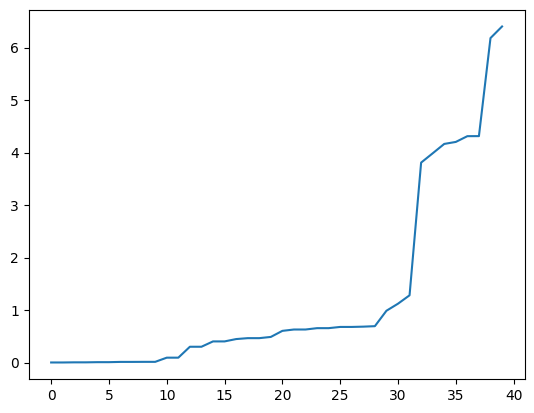

In [52]:
minPts=2

A = kneighbors_graph(df_DBSCAN_MinMax_trans, minPts, include_self=False).toarray()
dist = sklearn.metrics.DistanceMetric.get_metric('euclidean')
matdist = dist.pairwise(df_DBSCAN_MinMax_trans)

seq = []
for i,s in enumerate(df_DBSCAN_MinMax_trans):
    for j in range(len(df_DBSCAN_MinMax_trans)):
        if A[i][j] != 0:
            seq.append(matdist[i][j])
seq.sort()

# establecer intervalo ejes
fig = plt.figure()
ax = fig.gca()
plt.plot(seq)
plt.show()

In [53]:
from sklearn.cluster import DBSCAN

for eps in np.arange(0.1, 6, 0.3):
  db = DBSCAN(eps, min_samples=minPts).fit(df_DBSCAN_MinMax_trans)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  print ("%6.3f, %d, %d" % (eps, n_clusters_, n_outliers))

 0.100, 3, 12
 0.400, 4, 10
 0.700, 4, 3
 1.000, 4, 3
 1.300, 3, 3
 1.600, 3, 3
 1.900, 3, 3
 2.200, 3, 3
 2.500, 3, 3
 2.800, 3, 3
 3.100, 3, 3
 3.400, 3, 3
 3.700, 3, 3
 4.000, 3, 2
 4.300, 3, 1
 4.600, 2, 1
 4.900, 2, 1
 5.200, 2, 1
 5.500, 2, 1
 5.800, 2, 1


In [54]:
db = DBSCAN(eps=1, min_samples=2).fit(df_DBSCAN_MinMax_trans)
labels_trans = db.labels_
labels_trans

array([ 0,  0,  0,  0,  1,  2,  2,  2,  2,  2, -1, -1,  1,  3,  0,  3,  0,
        3,  3, -1])

In [55]:
df_DBSCAN_MinMax_trans_df = pd.DataFrame(df_DBSCAN_MinMax_trans, index=df_trans.index)
df_DBSCAN_MinMax_trans_df['dbscan'] = labels_trans
df_DBSCAN_MinMax_trans_df['dbscan'].value_counts()

 0    6
 2    5
 3    4
-1    3
 1    2
Name: dbscan, dtype: int64

In [56]:
df_DBSCAN_MinMax_trans_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1376,1377,1378,1379,1380,1381,1382,1383,1384,dbscan
ndvi_ne,0.000063,0.000092,0.000000,0.000000,0.000000,0.000000,0.000067,0.000000,0.000000,0.000086,...,0.000000,0.000017,0.000116,0.000060,0.000279,0.000078,0.000331,0.000288,0.000212,0
ndvi_nw,0.000000,0.000000,0.000468,0.000386,0.000219,0.000067,0.000000,0.000000,0.000145,0.000000,...,0.000063,0.000000,0.000083,0.000091,0.000202,0.000079,0.000000,0.000000,0.000000,0
ndvi_se,0.000316,0.000067,0.000416,0.000328,0.000182,0.000330,0.000373,0.000263,0.000077,0.000130,...,0.000221,0.000007,0.000000,0.000045,0.000000,0.000000,0.000342,0.000108,0.000134,0
ndvi_sw,0.000247,0.000044,0.000461,0.000356,0.000170,0.000090,0.000390,0.000201,0.000070,0.000268,...,0.000221,0.000278,0.000041,0.000000,0.000117,0.000291,0.000287,0.000261,0.000269,0
precipitation_amt_mm,0.041096,0.075402,0.114847,0.050557,0.024275,0.031185,0.011245,0.502608,0.063635,0.047285,...,0.083594,0.242127,0.193767,0.002936,0.177879,0.279974,0.192544,0.194289,0.204791,1


Vamos a visualizar los cluster de características que hemos conseguido con el algoritmo de DBSCAN

In [57]:
print("----- Cluster 1 -----")
df_DBSCAN_MinMax_trans_df[df_DBSCAN_MinMax_trans_df['dbscan'] == 0]

----- Cluster 1 -----


,0,1,2,3,4,5,6,7,8,9,...,1376,1377,1378,1379,1380,1381,1382,1383,1384,dbscan
ndvi_ne,0.000063,0.000092,0.000000,0.000000,0.000000,0.000000,0.000067,0.000000,0.000000,0.000086,...,0.000000,0.000017,0.000116,0.000060,0.000279,0.000078,0.000331,0.000288,0.000212,0
ndvi_nw,0.000000,0.000000,0.000468,0.000386,0.000219,0.000067,0.000000,0.000000,0.000145,0.000000,...,0.000063,0.000000,0.000083,0.000091,0.000202,0.000079,0.000000,0.000000,0.000000,0
ndvi_se,0.000316,0.000067,0.000416,0.000328,0.000182,0.000330,0.000373,0.000263,0.000077,0.000130,...,0.000221,0.000007,0.000000,0.000045,0.000000,0.000000,0.000342,0.000108,0.000134,0
ndvi_sw,0.000247,0.000044,0.000461,0.000356,0.000170,0.000090,0.000390,0.000201,0.000070,0.000268,...,0.000221,0.000278,0.000041,0.000000,0.000117,0.000291,0.000287,0.000261,0.000269,0
reanalysis_tdtr_k,0.008425,0.007412,0.007547,0.007634,0.009341,0.006437,0.006474,0.004988,0.005905,0.006264,...,0.026017,0.017929,0.019788,0.035656,0.030841,0.023788,0.024083,0.024932,0.035054,0
station_diur_temp_rng_c,0.022677,0.020712,0.021478,0.022049,0.030411,0.022460,0.022173,0.025333,0.024117,0.021155,...,0.038568,0.030693,0.033567,0.029033,0.037735,0.033609,0.022118,0.027750,0.031431,0


In [58]:
print("----- Cluster 2 -----")
df_DBSCAN_MinMax_trans_df[df_DBSCAN_MinMax_trans_df['dbscan'] == 1]

----- Cluster 2 -----


,0,1,2,3,4,5,6,7,8,9,...,1376,1377,1378,1379,1380,1381,1382,1383,1384,dbscan
precipitation_amt_mm,0.041096,0.075402,0.114847,0.050557,0.024275,0.031185,0.011245,0.502608,0.063635,0.047285,...,0.083594,0.242127,0.193767,0.002936,0.177879,0.279974,0.192544,0.194289,0.204791,1
reanalysis_sat_precip_amt_mm,0.041096,0.075402,0.114847,0.050557,0.024275,0.031185,0.011245,0.502608,0.063635,0.047285,...,0.083594,0.242127,0.193767,0.002936,0.177879,0.279974,0.192544,0.194289,0.204791,1


In [59]:
print("----- Cluster 3 -----")
df_DBSCAN_MinMax_trans_df[df_DBSCAN_MinMax_trans_df['dbscan'] == 2]

----- Cluster 3 -----


,0,1,2,3,4,5,6,7,8,9,...,1376,1377,1378,1379,1380,1381,1382,1383,1384,dbscan
reanalysis_air_temp_k,0.992569,0.991061,0.994280,0.991991,0.992107,0.990835,0.993052,0.996644,0.991651,0.992899,...,0.969654,0.976735,0.971486,0.964172,0.966502,0.967019,0.970849,0.968108,0.968453,2
reanalysis_avg_temp_k,0.993136,0.991830,0.994604,0.992792,0.992590,0.991280,0.993099,0.996435,0.991580,0.993310,...,0.972834,0.979917,0.973635,0.967604,0.971146,0.970466,0.974105,0.971952,0.974106,2
reanalysis_dew_point_temp_k,0.975356,0.976896,0.983141,0.979786,0.979853,0.978334,0.981958,0.986462,0.981055,0.981307,...,0.961282,0.974628,0.969721,0.949838,0.958395,0.960932,0.967256,0.964768,0.961007,2
reanalysis_max_air_temp_k,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2
reanalysis_min_air_temp_k,0.986987,0.985038,0.989350,0.985395,0.985416,0.985773,0.988048,0.992680,0.985430,0.988087,...,0.955218,0.966825,0.960767,0.939700,0.950880,0.946168,0.957099,0.953573,0.949604,2


In [60]:
print("----- Cluster 4 -----")
df_DBSCAN_MinMax_trans_df[df_DBSCAN_MinMax_trans_df['dbscan'] == 3]

----- Cluster 4 -----


,0,1,2,3,4,5,6,7,8,9,...,1376,1377,1378,1379,1380,1381,1382,1383,1384,dbscan
reanalysis_specific_humidity_g_per_kg,0.046411,0.050641,0.055967,0.054915,0.056392,0.056439,0.056909,0.059577,0.058569,0.059402,...,0.057856,0.060264,0.059694,0.047540,0.058910,0.058158,0.055223,0.054176,0.055672,3
station_avg_temp_c,0.084549,0.088351,0.088802,0.090758,0.095281,0.092507,0.090707,0.094164,0.093465,0.093346,...,0.092842,0.089817,0.089146,0.082310,0.091703,0.088523,0.079429,0.082352,0.088573,3
station_max_temp_c,0.097753,0.104928,0.107059,0.110105,0.115358,0.113303,0.106595,0.112560,0.111913,0.111783,...,0.116693,0.108211,0.109744,0.109434,0.113570,0.112088,0.104973,0.101206,0.108812,3
station_min_temp_c,0.066388,0.073341,0.075774,0.076912,0.078566,0.078563,0.077047,0.075625,0.075158,0.080345,...,0.068666,0.069452,0.068876,0.064047,0.071560,0.069930,0.062400,0.067857,0.071422,3


Y ahora vemos qué tres variables nos han salido como outliers

In [61]:
df_DBSCAN_MinMax_trans_df[df_DBSCAN_MinMax_trans_df['dbscan'] == -1]

,0,1,2,3,4,5,6,7,8,9,...,1376,1377,1378,1379,1380,1381,1382,1383,1384,dbscan
reanalysis_precip_amt_kg_per_m2,0.106429,0.059177,0.086757,0.045711,0.039787,0.087133,0.127843,0.099583,0.123867,0.093582,...,0.075806,0.279868,0.284983,0.027737,0.144594,0.366252,0.165231,0.202986,0.119216,-1
reanalysis_relative_humidity_percent,0.244454,0.256773,0.272976,0.266233,0.266035,0.263815,0.271930,0.277190,0.273731,0.268583,...,0.283675,0.316830,0.318154,0.255317,0.286027,0.296610,0.308278,0.308690,0.288880,-1
station_precip_mm,0.053041,0.028122,0.137678,0.012850,0.018574,0.128854,0.098295,0.069969,0.069529,0.003238,...,0.114097,0.025766,0.104186,0.007312,0.086425,0.118250,0.023756,0.051509,0.065570,-1


In [62]:
for index, row in df_DBSCAN_MinMax_trans_df.iterrows():
    dbscan_value = row['dbscan']
    print(f"Índice: {index}, DBSCAN: {dbscan_value}")

Índice: ndvi_ne, DBSCAN: 0.0
Índice: ndvi_nw, DBSCAN: 0.0
Índice: ndvi_se, DBSCAN: 0.0
Índice: ndvi_sw, DBSCAN: 0.0
Índice: precipitation_amt_mm, DBSCAN: 1.0
Índice: reanalysis_air_temp_k, DBSCAN: 2.0
Índice: reanalysis_avg_temp_k, DBSCAN: 2.0
Índice: reanalysis_dew_point_temp_k, DBSCAN: 2.0
Índice: reanalysis_max_air_temp_k, DBSCAN: 2.0
Índice: reanalysis_min_air_temp_k, DBSCAN: 2.0
Índice: reanalysis_precip_amt_kg_per_m2, DBSCAN: -1.0
Índice: reanalysis_relative_humidity_percent, DBSCAN: -1.0
Índice: reanalysis_sat_precip_amt_mm, DBSCAN: 1.0
Índice: reanalysis_specific_humidity_g_per_kg, DBSCAN: 3.0
Índice: reanalysis_tdtr_k, DBSCAN: 0.0
Índice: station_avg_temp_c, DBSCAN: 3.0
Índice: station_diur_temp_rng_c, DBSCAN: 0.0
Índice: station_max_temp_c, DBSCAN: 3.0
Índice: station_min_temp_c, DBSCAN: 3.0
Índice: station_precip_mm, DBSCAN: -1.0


### 4.3.5. Clustering mediante Jerárquico (con el df original transpuesto)

A continuación, se va a realizar el clustering de las características del dataframe mediante clustering jerárquico. Lo primero que se realiza es considerar que todos los elementos, en este caso las características, son clusters individuales y, posteriormente, se van formando agrupaciones de aquellas que son más similares. Finalmente, con el gráfico del dendrograma se valora donde se tendrá que cortar para formar aquella cantidad de clusters óptima.

A continuación se realiza la transposición del dataframe para trabajar con las características y se consideran como índices 'year', 'weekofyear' y 'city_bin'. Seguidamente se realiza el clustering. Se ha probado varios métodos y métricas para observar cuál da un mejor resultado, evaluándolo con el coeficiente cophenético.

In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage #recursos para clustering jerárquico

df_Z_trans = df_Z.transpose()
df_Z_jer = df_Z_trans.drop(index=['year', 'weekofyear', 'city_bin'])
Z = linkage(df_Z_jer, method='average', metric='cityblock')

Se calcula el coeficiente cophenético para la matriz de linkage Z.

Se calcula la matriz de distancias a pares para el conjunto de datos con la distancia euclidiana. Con la función "cophenet" calcula el coeficiente cophenético que mide la correlación entre las distancias originales y las representadas por la matriz creada con "linkage". Este valor está entre 0 y 1, siendo la correlación perfecta cuando vale 1. Un valor por encima de 0.5 se considera un buen ajuste.

Se ha probado con diferentes métodos de clustering y se ha comparado el coeficiente cophenético con los siguientes resultados:
- Single: 0.47385
- Complete: 0.74355
- Average: 0.79461
- Ward: 0.75699

Y a continuación con diferentes métricas para el "average" con los siguientes resultados:
- Euclidean: 0.79461
- Cityblock: 0.82040
- Hamming: 0.27324
- Cosine: 0.77488

Dicho lo anterior, para este caso, se ha escogido  el método "average" con la métrica "cityblock".

Además también devuelve un array de distancias cophenéticas que se almacenan en "coph_dists", en donde se encuentran todas las distancias cophenéticas entre los pares de puntos del conjunto de datos.

In [64]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(df_Z_jer))
c

0.7840594134024328

A continuación se representa gráficamente el dendrograma para observar las agrupaciones que se han ido haciendo a medida que aumentaba la distancia entre las características.

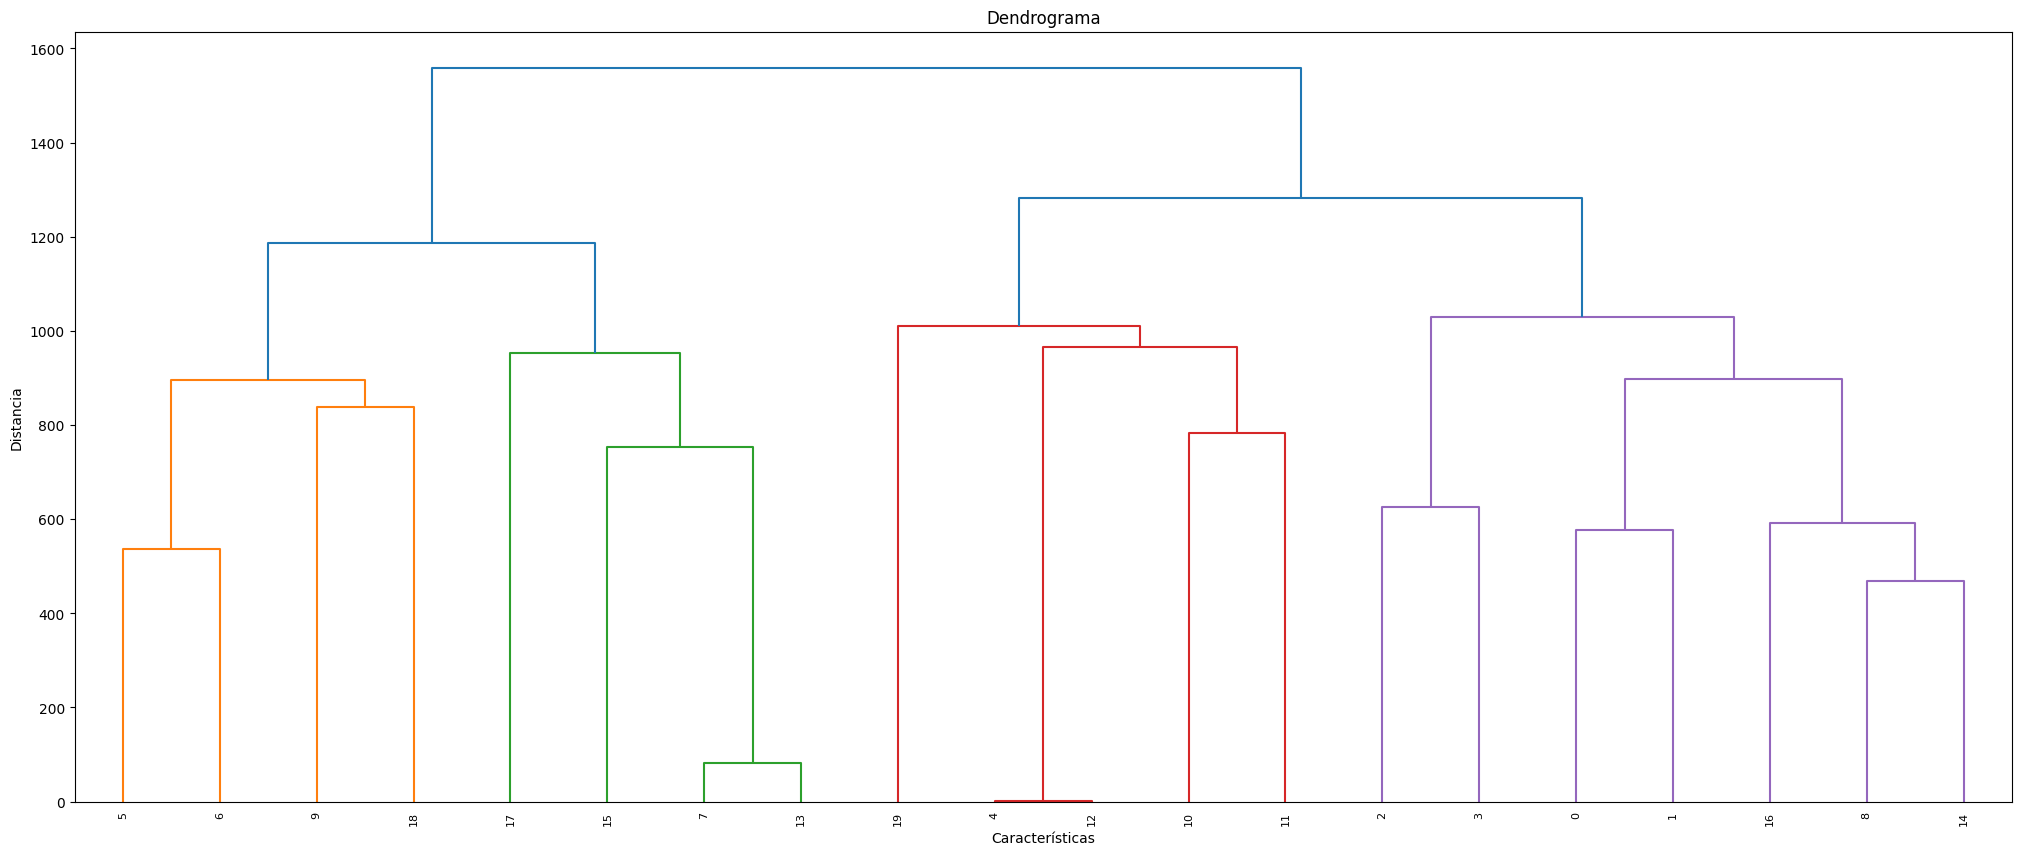

In [65]:
plt.figure(figsize=(25, 10))
plt.title('Dendrograma')
plt.xlabel('Características')
plt.ylabel('Distancia')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Como se puede observar en el dendrograma anterior, se forman claramente 4 clusters.

A continuación se realizan las anotaciones y la simplificación del dendrograma anterior.

In [66]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Dendrograma (truncado)')
        plt.xlabel('Características')
        plt.ylabel('Distancia')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

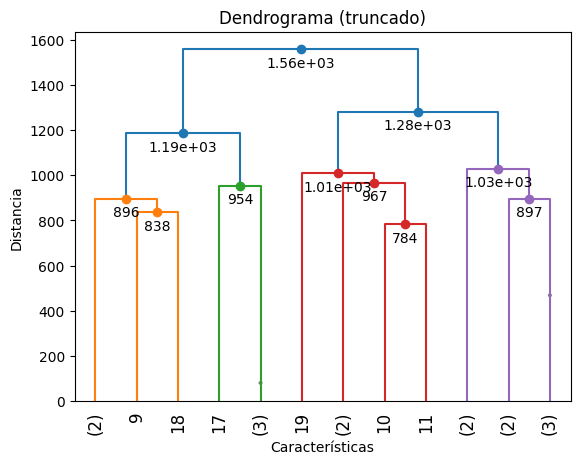

In [67]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=1,  # useful in small plots so annotations don't overlap
)
plt.show()

\\Como se ha dicho anteriormente, se observan claramente 4 clusters bien definidos, por lo que se corta el dendrograma en 1100.

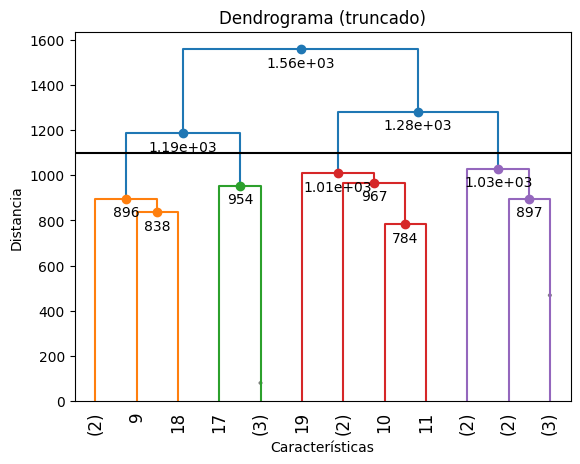

In [68]:
d_max = 1100

fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=1,
    max_d=d_max,
)
plt.show()

A continuación, se sacan los grupos de características para saber cuales pertenecen a cada uno de los clusters que se han formado.

In [69]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='cityblock', linkage='average')
clusters = cluster.fit_predict(df_Z_jer)
print(clusters)

[0 0 0 0 2 3 3 1 0 3 2 2 2 1 0 1 0 1 3 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [70]:
# Obtener los clusters asignados a cada fila
cluster_labels = cluster.labels_

# Crear un nuevo dataframe con el índice y los clusters
df_clusters = pd.DataFrame({'Index': df_Z_jer.index, 'Cluster': cluster_labels})

# Ordenar el dataframe por el número de cluster
df_clusters_sorted = df_clusters.sort_values('Cluster')

# Imprimir el índice y el número de cluster para cada fila
for index, cluster in df_clusters_sorted.iterrows():
    print(f"Índice: {cluster['Index']}, Cluster: {cluster['Cluster']}")

Índice: ndvi_ne, Cluster: 0
Índice: ndvi_nw, Cluster: 0
Índice: ndvi_se, Cluster: 0
Índice: ndvi_sw, Cluster: 0
Índice: station_diur_temp_rng_c, Cluster: 0
Índice: reanalysis_max_air_temp_k, Cluster: 0
Índice: reanalysis_tdtr_k, Cluster: 0
Índice: station_max_temp_c, Cluster: 1
Índice: station_avg_temp_c, Cluster: 1
Índice: reanalysis_dew_point_temp_k, Cluster: 1
Índice: reanalysis_specific_humidity_g_per_kg, Cluster: 1
Índice: reanalysis_sat_precip_amt_mm, Cluster: 2
Índice: station_precip_mm, Cluster: 2
Índice: reanalysis_precip_amt_kg_per_m2, Cluster: 2
Índice: precipitation_amt_mm, Cluster: 2
Índice: reanalysis_relative_humidity_percent, Cluster: 2
Índice: station_min_temp_c, Cluster: 3
Índice: reanalysis_avg_temp_k, Cluster: 3
Índice: reanalysis_air_temp_k, Cluster: 3
Índice: reanalysis_min_air_temp_k, Cluster: 3


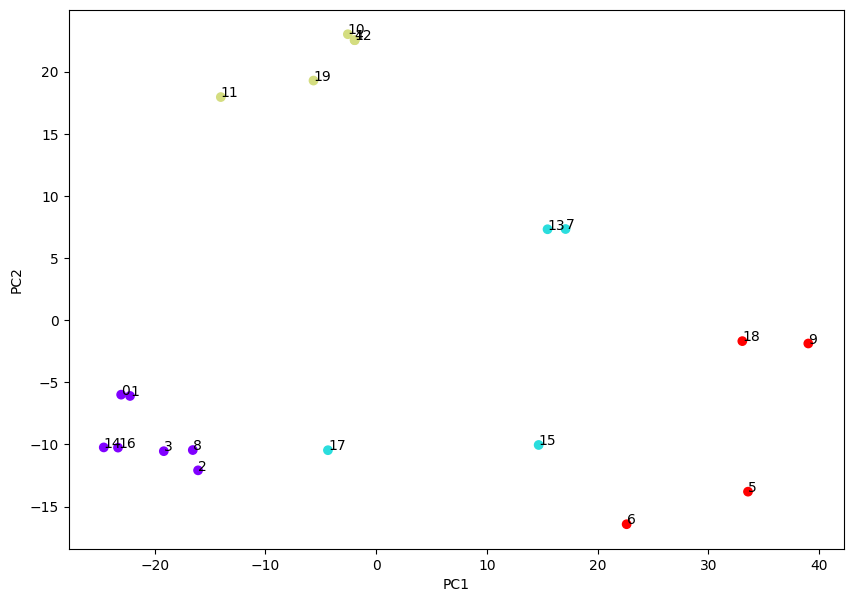

[(0, 'ndvi_ne'), (1, 'ndvi_nw'), (2, 'ndvi_se'), (3, 'ndvi_sw'), (4, 'precipitation_amt_mm'), (5, 'reanalysis_air_temp_k'), (6, 'reanalysis_avg_temp_k'), (7, 'reanalysis_dew_point_temp_k'), (8, 'reanalysis_max_air_temp_k'), (9, 'reanalysis_min_air_temp_k'), (10, 'reanalysis_precip_amt_kg_per_m2'), (11, 'reanalysis_relative_humidity_percent'), (12, 'reanalysis_sat_precip_amt_mm'), (13, 'reanalysis_specific_humidity_g_per_kg'), (14, 'reanalysis_tdtr_k'), (15, 'station_avg_temp_c'), (16, 'station_diur_temp_rng_c'), (17, 'station_max_temp_c'), (18, 'station_min_temp_c'), (19, 'station_precip_mm')]


In [71]:
# Resultados graficados

pca = PCA(n_components=2)
principal_components_trans = pca.fit_transform(df_Z_jer)
principal_df_PCA = pd.DataFrame(data=principal_components_trans, columns=['PC1', 'PC2'])


plt.figure(figsize=(10, 7))
plt.scatter(principal_df_PCA['PC1'], principal_df_PCA['PC2'], c=cluster_labels, cmap='rainbow')

for i in range(len(df_Z_jer.index)):
  plt.annotate(i,(principal_df_PCA['PC1'][i], principal_df_PCA['PC2'][i]))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

print(list(zip(range(len(df_Z_jer.index)), df_Z_jer.index)))

También se puede visualizar la agrupación de datos mediante un mapa de calor para poder ver las similitudes entre las diferentes características. Cuanto más similar sea el color de dos características, más similares son.

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


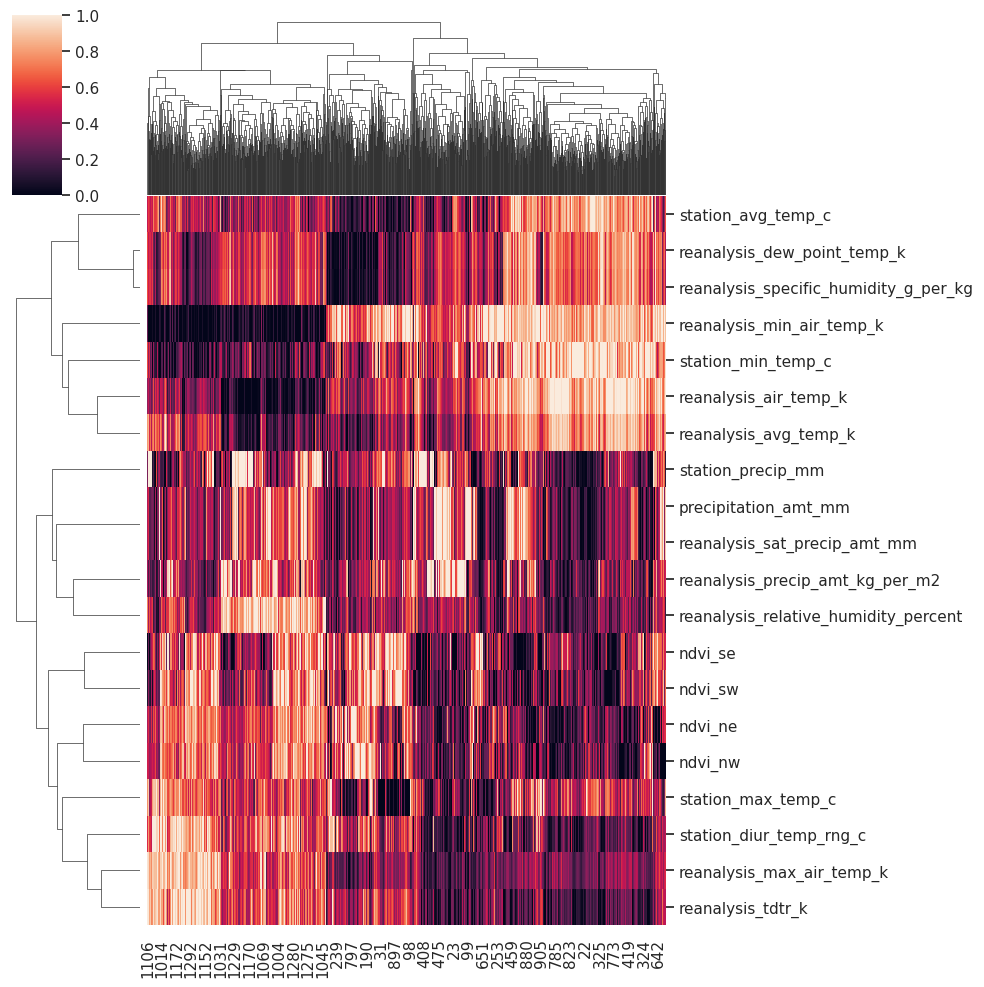

In [72]:
import seaborn as sns
sns.set(color_codes=True)
sns.clustermap(df_Z_jer, standard_scale=1)

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 4.3.Resultados

![Clusters por herramienta](/content/drive/MyDrive/Colab Notebooks/07 Machine Learning/Práctica 2/07MBID - A1 - Resultados.png)

### 4.3.6. Reducción de dimensionalidad (Selección de características): Matriz de correlaciones

El conjunto de datos tiene un alto número de variables, por lo que puede aumentar el coste computacional e impedir el correcto funcionamiento de los algoritmos. Para solucionarlo se va a realizar una **reducicón de dimensionalidad**

Primero, se va a graficar la matriz de correlaccioes para obtener una mejor comprensión del dominio del problema.

Después, se va a realizar una **Selección de características** para eliminar información irrelevante y redundante.

#### 4.3.6.1 Matriz de correlaciones

In [74]:
# Se crea un nuevo DataFrame new_df con un índice de varias columnas que consiste en las columnas 'year', 'weekofyear' y 'city_bin
df_new_index = df_Z.set_index(['year', 'weekofyear', 'city_bin'])
df_new_index_2 = df_MinMax.set_index(['year', 'weekofyear', 'city_bin'])
df_new_index_noNorm = df_noNorm.set_index(['year', 'weekofyear', 'city_bin'])

In [75]:
df_new_index.head()

ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear city_bin                                           
1990 18         1        -0.062977 -0.204344 -0.035307 -0.273059   
     19         1         0.293274  0.128725 -0.542414 -0.553103   
     20         1        -0.743468  0.395455 -0.614805 -0.358774   
     21         1        -0.017536  1.020014  0.372806  0.464274   
     22         1         0.491358  1.168430  0.704684  0.609216   

                          precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear city_bin                                                
1990 18         1                    -0.824201              -0.871164   
     19         1                    -0.564646              -0.393079   
     20         1                    -0.272148               0.033667   
     21         1                    -0.750827               0.187681   
     22         1                    -0.946492               0.585549   

                          reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
year weekofyear city_bin                                                       
1990 18         1                     -1.241665                    -2.038997   
     19         1                     -0.665240                    -0.970438   
     20         1                     -0.306444                     0.060384   
     21         1                     -0.018232                    -0.026015   
     22         1                      0.340564                     0.329510   

                          reanalysis_max_air_temp_k  \
year weekofyear city_bin                              
1990 18         1                         -1.144473   
     19         1                         -0.788243   
     20         1                         -0.917781   
     21         1                         -0.626320   
     22         1                         -0.464397   

                          reanalysis_min_air_temp_k  \
year weekofyear city_bin                              
1990 18         1                          0.016175   
     19         1                          0.220947   
     20         1                          0.589537   
     21         1                          0.466674   
     22         1                          0.671446   

                          reanalysis_precip_amt_kg_per_m2  \
year weekofyear city_bin                                    
1990 18         1                               -0.182188   
     19         1                               -0.635171   
     20         1                               -0.372273   
     21         1                               -0.765331   
     22         1                               -0.820101   

                          reanalysis_relative_humidity_percent  \
year weekofyear city_bin                                         
1990 18         1                                    -1.294711   
     19         1                                    -0.723000   
     20         1                                    -0.053964   
     21         1                                    -0.299012   
     22         1                                    -0.281465   

                          reanalysis_sat_precip_amt_mm  \
year weekofyear city_bin                                 
1990 18         1                            -0.824090   
     19         1                            -0.564595   
     20         1                            -0.272165   
     21         1                            -0.750733   
     22         1                            -0.946352   

                          reanalysis_specific_humidity_g_per_kg  \
year weekofyear city_bin                                          
1990 18         1                                     -1.921287   
     19         1                                     -0.997296   
     20         1                                      0.005311   
     21         1                                     -0.114070   
     

Text(0.5, 1.0, 'Variable Correlations')

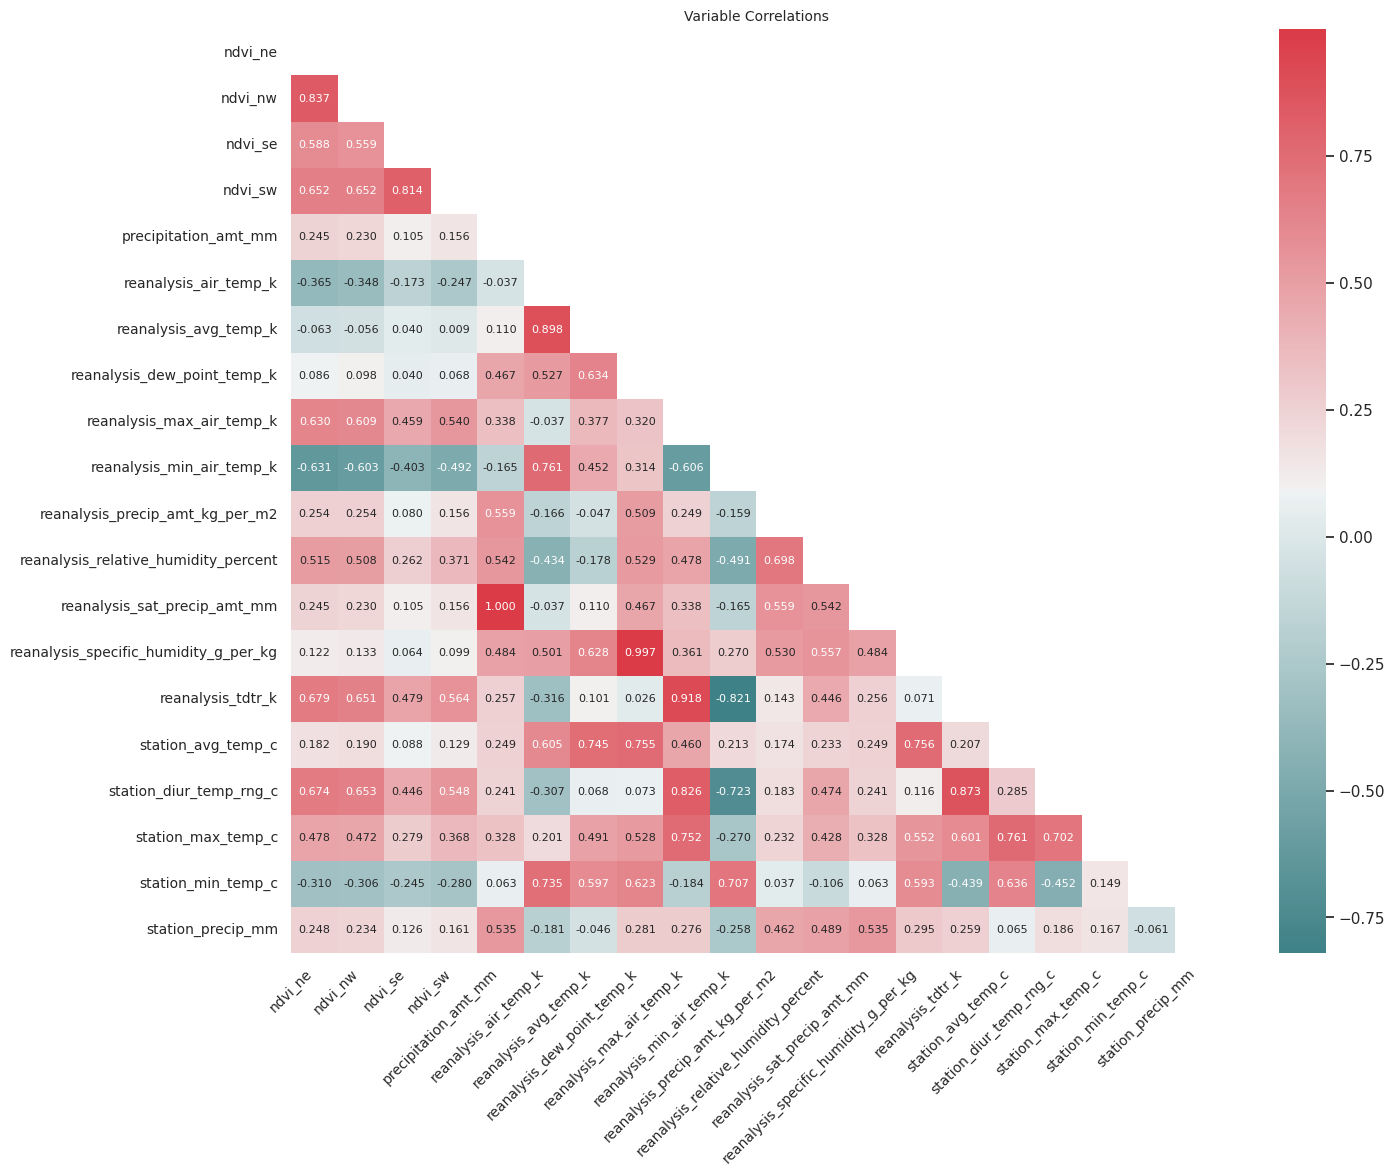

In [76]:
# compute the correlations
df_correlations = df_new_index.corr()

# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(df_correlations, dtype=bool) #Generamos una matriz booleana con la misma forma que df_correlations
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# plot
plt.figure(figsize=(15, 12))
df_corr_heat = sns.heatmap(df_correlations, mask=mask, cmap=cmap, annot=True, fmt='.3f', annot_kws={'fontsize':8}, xticklabels=df_correlations.columns, yticklabels=df_correlations.columns)
df_corr_heat.set_xticklabels(df_corr_heat.get_xticklabels(), fontsize = 10, rotation = 45, ha='right')
df_corr_heat.set_yticklabels(df_corr_heat.get_yticklabels(), fontsize = 10, rotation = 0)
plt.title('Variable Correlations', fontsize = 10)

#### 4.3.6.2. Selección de características

Existen variables con una correlación superior al 0.7-0.8. Además, las varaibles correalacioandas corresponen a las varaibles pertenecientes a los clusters que se han analizado en los anteriores puntos.

Hay variables que tienen una correlación superior a |0.7|, a continuación vemos cuales son.

In [77]:
names = df_new_index.columns
tuplas=[]
for i in names:
  for j in names:
    if i!=j and [j,i] not in tuplas:
      correlation = df_correlations[i][j]
      if correlation >= 0.70 or correlation <= -0.70:
        tuplas.append([i, j, correlation])
for i in tuplas:
  print(i)

['ndvi_ne', 'ndvi_nw', 0.8371605353613164]
['ndvi_nw', 'ndvi_ne', 0.8371605353613164]
['ndvi_se', 'ndvi_sw', 0.8144629769647599]
['ndvi_sw', 'ndvi_se', 0.8144629769647599]
['precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm', 0.9999998409008202]
['reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 0.8980605867958357]
['reanalysis_air_temp_k', 'reanalysis_min_air_temp_k', 0.7605283372592512]
['reanalysis_air_temp_k', 'station_min_temp_c', 0.7347535088047589]
['reanalysis_avg_temp_k', 'reanalysis_air_temp_k', 0.8980605867958357]
['reanalysis_avg_temp_k', 'station_avg_temp_c', 0.7445527813728082]
['reanalysis_dew_point_temp_k', 'reanalysis_specific_humidity_g_per_kg', 0.9974076845696477]
['reanalysis_dew_point_temp_k', 'station_avg_temp_c', 0.7548067658976427]
['reanalysis_max_air_temp_k', 'reanalysis_tdtr_k', 0.9180897302628219]
['reanalysis_max_air_temp_k', 'station_diur_temp_rng_c', 0.8261062636950904]
['reanalysis_max_air_temp_k', 'station_max_temp_c', 0.7520581886776198]
['reanalysi

Las características son las siguentes:

* NOAA's GHCN daily climate data weather station measurements
  * station_max_temp_c – Maximum temperature
  * station_min_temp_c – Minimum temperature
  * station_avg_temp_c – Average temperature
  * station_precip_mm – Total precipitation
  * station_diur_temp_rng_c – Diurnal temperature range

* PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)
  * precipitation_amt_mm – Total precipitation

* NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)
  * reanalysis_sat_precip_amt_mm – Total precipitation
  * reanalysis_dew_point_temp_k – Mean dew point temperature
  * reanalysis_air_temp_k – Mean air temperature
  * reanalysis_relative_humidity_percent – Mean relative humidity
  * reanalysis_specific_humidity_g_per_kg – Mean specific humidity
  * reanalysis_precip_amt_kg_per_m2 – Total precipitation
  * reanalysis_max_air_temp_k – Maximum air temperature
  * reanalysis_min_air_temp_k – Minimum air temperature
  * reanalysis_avg_temp_k – Average air temperature
  * reanalysis_tdtr_k – Diurnal temperature range

* Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements
  * ndvi_se – Pixel southeast of city centroid
  * ndvi_sw – Pixel southwest of city centroid
  * ndvi_ne – Pixel northeast of city centroid
  * ndvi_nw – Pixel northwest of city centroid


Los datos diarios del GHCN se basan en mediciones directas de estaciones meteorológicas terrestres, mientras que los datos de reanálisis del NCEP se generan a partir de modelos climáticos y combinan observaciones de diversas fuentes para proporcionar una visión coherente y detallada del clima pasado en una malla espacial regular

**ANÁLISIS**

**Satellite vegetation**
Las varibles 'ndvi_ne', 'ndvi_nw', 'ndvi_se' y 'ndvi_sw' correspondían al mismo cluster en los cuatro análisis realizados. El significado de estas características es el siguente:
* ndvi_se – Pixel southeast of city centroid
* ndvi_sw – Pixel southwest of city centroid
* ndvi_ne – Pixel northeast of city centroid
* ndvi_nw – Pixel northwest of city centroid
  
Aunque las variables estén altamente correlacionadas, se van a conservar las cuatro porque representan los valores de vegetación en diferentes ubicaciones.

**'precipitation_amt_mm'**  
['precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm', 0.9999998409008202]  
* La variable *'reanalysis_sat_precip_amt_mm'* va a ser **eliminada**, ya que ambas tienen el mismo significado.

**reanalysis_air_temp_k'**  
['reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 0.8980605867958357]  
['reanalysis_air_temp_k', 'reanalysis_min_air_temp_k', 0.7605283372592512]  
['reanalysis_air_temp_k', 'station_min_temp_c', 0.7347535088047589]   
* En la primera tupla ambas características tienen el mismo significado. La variable *'reanalysis_avg_temp_k'* va a ser **eliminada** por la alta correlación que presentan, aunque correspondan a diferentes maneras de medir el clima.
* Las otras dos tuplas se van a conservar, ya que una representa la temperatura media y las otras dos la mínima.

**'reanalysis_avg_temp_k'**  
La variable va a ser eliminada

**'reanalysis_dew_point_temp_k'** (temperatura promedio del punto de rocío)  
['reanalysis_dew_point_temp_k', 'station_avg_temp_c', 0.7548067658976427]  
['reanalysis_dew_point_temp_k', 'reanalysis_specific_humidity_g_per_kg', 0.9974076845696477]
* Primera tupla: Se mantienen ambas ya que tienen un significado diferente
* Segunda tupla: La humedad específica y el punto de rocío están relacionados en términos de la cantidad de vapor de agua presente en el aire y la capacidad del aire para retener dicho vapor. Por lo tanto, la variable *'reanalysis_specific_humidity_g_per_kg'* va a ser **eliminada**

**'reanalysis_max_air_temp_k'**  
['reanalysis_max_air_temp_k', 'reanalysis_tdtr_k', 0.9180897302628219]  
['reanalysis_max_air_temp_k', 'station_diur_temp_rng_c', 0.8261062636950904]  
['reanalysis_max_air_temp_k', 'station_max_temp_c', 0.7520581886776198]  
* Primera y segunda tupla: Ambas se conservan, ya que una representa la temperatura máxima y otra la diurna
* <font color="red">Tercera tupla: Aunque representen conceptos parecidos, son diferentes maneras de medir el clima, por lo que se conservarán las dos. Además, la correlación no es muy alta.</font>

**'reanalysis_min_air_temp_k'**  
['reanalysis_min_air_temp_k', 'reanalysis_air_temp_k', 0.7605283372592512]  
['reanalysis_min_air_temp_k', 'reanalysis_tdtr_k', -0.8205571909939401]  
['reanalysis_min_air_temp_k', 'station_diur_temp_rng_c', -0.7225165194512534]  
['reanalysis_min_air_temp_k', 'station_min_temp_c', 0.70668738465616]  
* Primera Segunda y tercera tupla: Todas se conservan, ya que una respresentan conceptos diferentes.
* <font color="red">Cuarta tupla: Aunque representen conceptos parecidos, son diferentes maneras de medir el clima, por lo que se conservarán todas. Además, la correlación no es muy alta.</font>

**'reanalysis_sat_precip_amt_mm'**  
La varaible va a ser eliminada

**['reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c', 0.7558755849750096]**  
Ambas se mantienen, ya que represenan conceptos diferentes.

**'reanalysis_tdtr_k'**  
['reanalysis_tdtr_k', 'reanalysis_max_air_temp_k', 0.9180897302628219]  
['reanalysis_tdtr_k', 'reanalysis_min_air_temp_k', -0.8205571909939401]  
['reanalysis_tdtr_k', 'station_diur_temp_rng_c', 0.8726584163176253]  
* Primera y segunda tupla: Ambas se conservan, ya que representan la temperatura diurna, máxima y mímina
* Tercera tupla: Ambas características tienen el mismo significado. La variable *'reanalysis_tdtr_k'* va a ser **eliminada**. Se ha decidido eliminar la variable correspondiente a reanálisis ya que el estudio será a nivel local / regional, por lo que las estaciones meteorológicas suelen tener una resolución espacial más alta.

**'station_avg_temp_c'**  
['station_avg_temp_c', 'reanalysis_avg_temp_k', 0.7445527813728082]  
['station_avg_temp_c', 'reanalysis_dew_point_temp_k', 0.7548067658976427]  
['station_avg_temp_c', 'reanalysis_specific_humidity_g_per_kg', 0.7558755849750096]  
['station_avg_temp_c', 'station_max_temp_c', 0.7613755573663717]  
* <font color="red">Primera tupla: Aunque representen conceptos parecidos, son diferentes maneras de medir el clima, por lo que se conservarán ambas. Además, la correlación no es muy alta.</font>
* Segunda tupla: Representan conceptos diferentes. Se conservan ambas.
* Tercera tupla: 'reanalysis_specific_humidity_g_per_k' ha sido eliminada
* Cuarta tupla: Representan conceptos diferentes. Se conservan ambas.

**'station_diur_temp_rng_c'**  
La variable ha sido eliminada.

**'station_max_temp_c'**  
['station_max_temp_c', 'reanalysis_max_air_temp_k', 0.7520581886776198]  
['station_max_temp_c', 'station_avg_temp_c', 0.7613755573663717]  
['station_max_temp_c', 'station_diur_temp_rng_c', 0.7016750310085544]

**station_min_temp_c**  
['station_min_temp_c', 'reanalysis_air_temp_k', 0.7347535088047589]  
['station_min_temp_c', 'reanalysis_min_air_temp_k', 0.70668738465616]  

Estas combinaciones ya han sido analizadas.

Para los casos en rojo se ha decidido conservar ambas variables. La correlación no es muy alta y puede ser beneficioso combinar datos de estaciones meteorológicas y reanálisis para obtener una imagen más completa del clima: Utilizar los datos de estaciones meteorológicas para obtener información local detallada y complementarla con los datos de reanálisis para obtener una perspectiva más amplia y consistente.

**CARACTERÍSTICAS QUE SE VAN A ELIMINAR**

Por lo tanto, se van a eliminar la siguientes características:
* 'reanalysis_sat_precip_amt_mm'
* 'reanalysis_avg_temp_k'
* 'reanalysis_specific_humidity_g_per_kg'
* 'reanalysis_tdtr_k'

In [78]:
#Eliminación de las variables

df_var_sel = df_new_index.copy() #Se crea un nuevo Dataframe para no editar el correspondiente a la estandarización Z-score
variables_elim = ['reanalysis_sat_precip_amt_mm','reanalysis_avg_temp_k', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k']
df_var_sel.drop(variables_elim, axis = 1, inplace = True)

df_var_sel_2 = df_new_index_2.copy() #Se crea un nuevo Dataframe para no editar el correspondiente a la estandarización MinMax
df_var_sel_2.drop(variables_elim, axis = 1, inplace = True)

# Dataset sin estandarizar
df_var_sel_noNorm = df_new_index_noNorm.copy()
df_var_sel_noNorm.drop(variables_elim, axis = 1, inplace = True)

In [79]:
df_var_sel.head()

ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear city_bin                                           
1990 18         1        -0.062977 -0.204344 -0.035307 -0.273059   
     19         1         0.293274  0.128725 -0.542414 -0.553103   
     20         1        -0.743468  0.395455 -0.614805 -0.358774   
     21         1        -0.017536  1.020014  0.372806  0.464274   
     22         1         0.491358  1.168430  0.704684  0.609216   

                          precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear city_bin                                                
1990 18         1                    -0.824201              -0.871164   
     19         1                    -0.564646              -0.393079   
     20         1                    -0.272148               0.033667   
     21         1                    -0.750827               0.187681   
     22         1                    -0.946492               0.585549   

                          reanalysis_dew_point_temp_k  \
year weekofyear city_bin                                
1990 18         1                           -2.038997   
     19         1                           -0.970438   
     20         1                            0.060384   
     21         1                           -0.026015   
     22         1                            0.329510   

                          reanalysis_max_air_temp_k  \
year weekofyear city_bin                              
1990 18         1                         -1.144473   
     19         1                         -0.788243   
     20         1                         -0.917781   
     21         1                         -0.626320   
     22         1                         -0.464397   

                          reanalysis_min_air_temp_k  \
year weekofyear city_bin                              
1990 18         1                          0.016175   
     19         1                          0.220947   
     20         1                          0.589537   
     21         1                          0.466674   
     22         1                          0.671446   

                          reanalysis_precip_amt_kg_per_m2  \
year weekofyear city_bin                                    
1990 18         1                               -0.182188   
     19         1                               -0.635171   
     20         1                               -0.372273   
     21         1                               -0.765331   
     22         1                               -0.820101   

                          reanalysis_relative_humidity_percent  \
year weekofyear city_bin                                         
1990 18         1                                    -1.294711   
     19         1                                    -0.723000   
     20         1                                    -0.053964   
     21         1                                    -0.299012   
     22         1                                    -0.281465   

                          station_avg_temp_c  station_diur_temp_rng_c  \
year weekofyear city_bin                                                
1990 18         1                  -1.456516                -0.552083   
     19         1                  -0.418112                -0.810260   
     20         1                  -0.418112                -0.754438   
     21         1                   0.200263                -0.614882   
     22         1                   1.402012                 0.655069   

                          station_max_temp_c  station_min_temp_c  \
year weekofyear city_bin                                           
1990 18         1                  -1.636456           -1.501300   
     19         1                  -0.402893           -0.002582   
     20         1                  -0.134727            0.406159   
     21         1                   0.455237            0.746777   
     22         1                   1.367001           

## 4.4. Análisis para reducción de observaciones

### Nota

A partir de ahora, usaremos el dataset extraído de la selección de características.

### 4.4.1. Clustering mediante DBSCAN

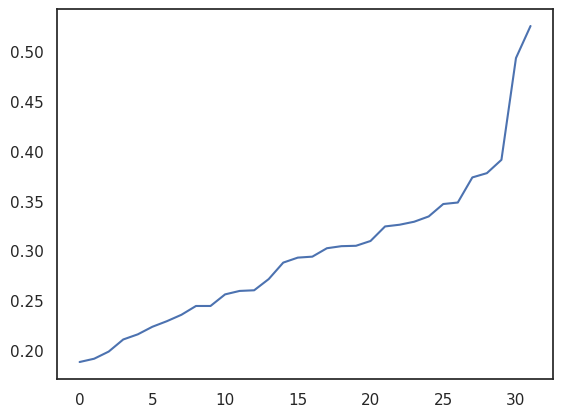

In [80]:
df_aux = df_DBSCAN[aux]
df_DBSCAN = df_var_sel_2.copy()

minPts=2
A = kneighbors_graph(df_DBSCAN, minPts, include_self=False).toarray()
dist = sklearn.metrics.DistanceMetric.get_metric('euclidean')
matdist = dist.pairwise(df_DBSCAN)

seq = []
for i,s in enumerate(df_DBSCAN):
    for j in range(len(df_DBSCAN)):
        if A[i][j] != 0:
            seq.append(matdist[i][j])
seq.sort()

# establecer intervalo ejes
fig = plt.figure()
ax = fig.gca()
plt.plot(seq)
plt.show()

In [81]:
for eps in np.arange(0.1, 0.9, 0.05):
  db = DBSCAN(eps, min_samples=minPts).fit(df_DBSCAN)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  print ("%6.3f, %d, %d" % (eps, n_clusters_, n_outliers))

 0.100, 0, 1385
 0.150, 6, 1373
 0.200, 46, 1256
 0.250, 53, 1004
 0.300, 46, 728
 0.350, 62, 450
 0.400, 29, 233
 0.450, 10, 87
 0.500, 2, 36
 0.550, 3, 17
 0.600, 1, 4
 0.650, 1, 3
 0.700, 1, 0
 0.750, 1, 0
 0.800, 1, 0
 0.850, 1, 0


In [82]:
db = DBSCAN(eps=0.55, min_samples=2).fit(df_DBSCAN)
labels = db.labels_
labels

array([0, 0, 0, ..., 1, 1, 1])

In [83]:
df_DBSCAN['dbscan'] = labels
df_DBSCAN['dbscan'].value_counts()

 0    902
 1    464
-1     17
 2      2
Name: dbscan, dtype: int64

In [84]:
print("----- Cluster 1 -----")
df_DBSCAN[df_DBSCAN['dbscan'] == 0].head()

----- Cluster 1 -----


ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear city_bin                                           
1990 18         1         0.492463  0.446013  0.491924  0.455375   
     19         1         0.554695  0.506750  0.395980  0.401242   
     20         1         0.373590  0.555390  0.382284  0.438806   
     21         1         0.500401  0.669283  0.569137  0.597902   
     22         1         0.589298  0.696347  0.631927  0.625919   

                          precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear city_bin                                                
1990 18         1                     0.077223               0.370457   
     19         1                     0.141887               0.457337   
     20         1                     0.214758               0.534888   
     21         1                     0.095503               0.562877   
     22         1                     0.046757               0.635180   

                          reanalysis_dew_point_temp_k  \
year weekofyear city_bin                                
1990 18         1                            0.213515   
     19         1                            0.413812   
     20         1                            0.607036   
     21         1                            0.590841   
     22         1                            0.657483   

                          reanalysis_max_air_temp_k  \
year weekofyear city_bin                              
1990 18         1                          0.126761   
     19         1                          0.204225   
     20         1                          0.176056   
     21         1                          0.239437   
     22         1                          0.274648   

                          reanalysis_min_air_temp_k  \
year weekofyear city_bin                              
1990 18         1                          0.661017   
     19         1                          0.703390   
     20         1                          0.779661   
     21         1                          0.754237   
     22         1                          0.796610   

                          reanalysis_precip_amt_kg_per_m2  \
year weekofyear city_bin                                    
1990 18         1                                0.282998   
     19         1                                0.158656   
     20         1                                0.230820   
     21         1                                0.122927   
     22         1                                0.107893   

                          reanalysis_relative_humidity_percent  \
year weekofyear city_bin                                         
1990 18         1                                     0.242498   
     19         1                                     0.362611   
     20         1                                     0.503172   
     21         1                                     0.451689   
     22         1                                     0.455376   

                          station_avg_temp_c  station_diur_temp_rng_c  \
year weekofyear city_bin                                                
1990 18         1                   0.230404                 0.251261   
     19         1                   0.441805                 0.195257   
     20         1                   0.441805                 0.207366   
     21         1                   0.567696                 0.237639   
     22         1                   0.812352                 0.513118   

                          station_max_temp_c  station_min_temp_c  \
year weekofyear city_bin                                           
1990 18         1                       0.22            0.263158   
     19         1                       0.45            0.552632   
     20         1                       0.50            0.631579   
     21         1                       0.61            0.697368   
     22         1                       0.78           

In [85]:
print("----- Cluster 2 -----")
df_DBSCAN[df_DBSCAN['dbscan'] == 1].head()

----- Cluster 2 -----


ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear city_bin                                           
2000 26         0         0.584937  0.491083  0.870112  0.625577   
     27         0         0.616445  0.718304  0.733529  0.612019   
     28         0         0.563717  0.555646  0.506878  0.334047   
     30         0         0.763552  0.791013  0.640350  0.904038   
     32         0         0.742294  0.803424  0.975546  0.968193   

                          precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear city_bin                                                
2000 26         0                     0.157990               0.257143   
     27         0                     0.376852               0.242760   
     28         0                     0.345204               0.213022   
     30         0                     0.390220               0.215355   
     32         0                     0.555671               0.336054   

                          reanalysis_dew_point_temp_k  \
year weekofyear city_bin                                
2000 26         0                            0.574460   
     27         0                            0.597171   
     28         0                            0.631608   
     30         0                            0.414557   
     32         0                            0.396873   

                          reanalysis_max_air_temp_k  \
year weekofyear city_bin                              
2000 26         0                          0.654930   
     27         0                          0.605634   
     28         0                          0.457746   
     30         0                          0.633803   
     32         0                          0.760563   

                          reanalysis_min_air_temp_k  \
year weekofyear city_bin                              
2000 26         0                          0.423729   
     27         0                          0.254237   
     28         0                          0.381356   
     30         0                          0.288136   
     32         0                          0.338983   

                          reanalysis_precip_amt_kg_per_m2  \
year weekofyear city_bin                                    
2000 26         0                                0.381959   
     27         0                                0.406810   
     28         0                                0.572806   
     30         0                                0.281229   
     32         0                                0.235950   

                          reanalysis_relative_humidity_percent  \
year weekofyear city_bin                                         
2000 26         0                                     0.814215   
     27         0                                     0.849108   
     28         0                                     0.917138   
     30         0                                     0.686471   
     32         0                                     0.539866   

                          station_avg_temp_c  station_diur_temp_rng_c  \
year weekofyear city_bin                                                
2000 26         0                   0.389549                 0.661831   
     27         0                   0.472684                 0.745711   
     28         0                   0.456057                 0.735116   
     30         0                   0.422803                 0.736529   
     32         0                   0.492082                 0.754541   

                          station_max_temp_c  station_min_temp_c  \
year weekofyear city_bin                                           
2000 26         0                       0.53            0.355263   
     27         0                       0.68            0.368421   
     28         0                       0.58            0.355263   
     30         0                       0.61            0.144737   
     32         0                       0.68           

In [86]:
print("----- Cluster 3 -----")
df_DBSCAN[df_DBSCAN['dbscan'] == 2].head()

----- Cluster 3 -----


,,,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,dbscan
year,weekofyear,city_bin,,,,,,,,,,,,,,,,,
2001,15,0,0.834749,0.868167,0.87808,0.941287,0.502510,0.316424,0.697692,0.528169,0.338983,0.97369,0.879758,0.399525,0.75560,0.68,0.197368,0.995441,2
2008,45,0,0.990358,0.985106,1.00000,1.000000,0.359691,0.491740,0.872115,0.647887,0.423729,0.95052,0.900377,0.625653,0.80222,0.84,0.421053,0.903440,2


In [87]:
print("----- Outliers -----")
df_DBSCAN[df_DBSCAN['dbscan'] == -1]

----- Outliers -----


ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear city_bin                                           
1999 42         1         0.282895  0.224033  0.060405  0.112586   
     49         1         0.501660  0.421331  0.645914  0.545837   
2000 35         1         0.577698  0.666808  0.702040  0.494924   
2005 41         1         0.386287  0.326289  0.111263  0.124738   
2000 38         0         0.790091  0.749292  1.000000  0.614255   
     39         0         0.562307  0.439312  0.564243  0.468018   
2001 5          0         0.780468  0.693925  0.839571  0.923676   
2002 4          0         0.468160  0.516471  0.262737  0.368046   
2003 36         0         0.780731  0.734439  0.523002  0.671527   
2004 13         0         0.734133  0.596071  0.044151  0.730633   
     26         0         0.645916  0.524707  0.317559  0.502892   
2005 10         0         0.536200  0.498707  0.607153  0.379088   
2006 19         0         0.708311  0.577806  0.672599  0.724046   
     50         0         0.829148  0.759270  0.892269  1.000000   
2008 40         0         0.848338  0.879699  0.877586  1.000000   
     41         0         0.542403  0.541023  0.482496  0.525080   
2009 24         0         0.577363  0.531432  0.345786  0.508832   

                          precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear city_bin                                                
1999 42         1                     1.000000               0.704179   
     49         1                     0.394634               0.337804   
2000 35         1                     1.000000               0.695238   
2005 41         1                     0.981332               0.678134   
2000 38         0                     0.606532               0.351798   
     39         0                     0.596210               0.613022   
2001 5          0                     0.542055               0.060836   
2002 4          0                     0.752771               0.553158   
2003 36         0                     0.054964               0.344412   
2004 13         0                     0.746740               0.335083   
     26         0                     0.204872               0.106706   
2005 10         0                     0.967093               0.422741   
2006 19         0                     0.791134               0.181535   
     50         0                     0.980834               0.450146   
2008 40         0                     0.150965               0.588921   
     41         0                     0.431940               0.714480   
2009 24         0                     0.054342               0.034597   

                          reanalysis_dew_point_temp_k  \
year weekofyear city_bin                                
1999 42         1                            0.787602   
     49         1                            0.416791   
2000 35         1                            0.776620   
2005 41         1                            0.752048   
2000 38         0                            0.251675   
     39         0                            0.318131   
2001 5          0                            0.473753   
2002 4          0                            0.564780   
2003 36         0                            0.025316   
2004 13         0                            0.759866   
     26         0                            0.401899   
2005 10         0                            0.879933   
2006 19         0                            0.609456   
     50         0                            0.856850   
2008 40         0                            0.519360   
     41         0                            0.597543   
2009 24         0                            0.408414   

                          reanalysis_max_air_temp_k  \
year weekofyear city_bin                              
1999 42         1                          0.253521   
     49         1                          0.063380   
2000 35         1                         

In [88]:
#Almacenamos los índices que se han considerado outliers tras el análisis
index_a_eliminar = df_DBSCAN[df_DBSCAN['dbscan'] == -1].index

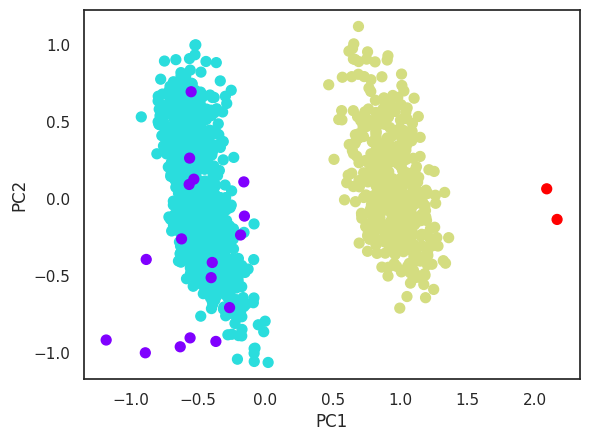

In [89]:
# Aplicar PCA
estimator = PCA(n_components=2)
principal_components = estimator.fit_transform(df_DBSCAN)
principal_df_PCA = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

#plotting orginal points with color related to label
plt.scatter(principal_df_PCA['PC1'], principal_df_PCA['PC2'],
            c=df_DBSCAN['dbscan'], s=50, cmap="rainbow")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

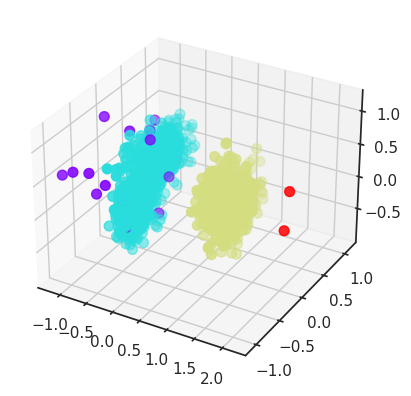

In [90]:
estimator = PCA(n_components=3)
principal_components = estimator.fit_transform(df_DBSCAN)
principal_df_PCA = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Creamos la figura
fig = plt.figure()

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')
ax1.scatter(principal_df_PCA['PC1'], principal_df_PCA['PC2'], principal_df_PCA['PC3'],
            c=df_DBSCAN['dbscan'], s=50, cmap="rainbow")

# Mostramos el gráfico
plt.show()

### 4.4.2 Clustering mediante Jerárquico

En este apartado se va a volver a realizar el clustering jerárquico para todas las observaciones.

In [91]:
df_Z = df_var_sel.copy()
Z = linkage(df_Z, method='average', metric='euclidean')

Se calcula el coeficiente cophenético para la matriz de linkage Z y la matriz de distancias pdist(X).

Se calcula la matriz de distancias a pares para el conjunto de datos con la distancia euclidiana. Con la función "cophenet" calcula el coeficiente cophenético que mide la correlación entre las distancias originales y las representadas por la matriz creada con "linkage". Este valor está entre 0 y 1, siendo la correlación perfecta cuando vale 1. Un valor por encima de 0.5 se considera un buen ajuste.

Se ha probado con diferentes métodos de clustering y se ha comparado el coeficiente cophenético con los siguientes resultados:
- Single: 0.69334
- Complete: 0.69537
- Average: 0.76554
- Ward: 0.70221

Y a continuación con diferentes métricas para el "average" con los siguientes resultados:
- Euclidean: 0.76554
- Cityblock: 0.75047
- Hamming: 0.41190
- Cosine: 0.70710

Dicho lo anterior, para este caso, se ha escogido  el método "average" con la métrica "euclidean". Además esta métrica podría ser una buena opción, ya que muchas de las características son medidas de precipitación y temperatura, lo que indica que es posible que haya cierta correlación en la distribución espacial de estas características.

Además también devuelve un array de distancias cophenéticas que se almacenan en "coph_dists", en donde se encuentran todas las distancias cophenéticas entre los pares de puntos del conjunto de datos.

In [92]:
c, coph_dists = cophenet(Z, pdist(df_Z))
c

0.7622713183811013

A continuación se representa gráficamente el dendrograma para observar las agrupaciones que se han ido haciendo a medida que aumentaba la distancia entre las observaciones.

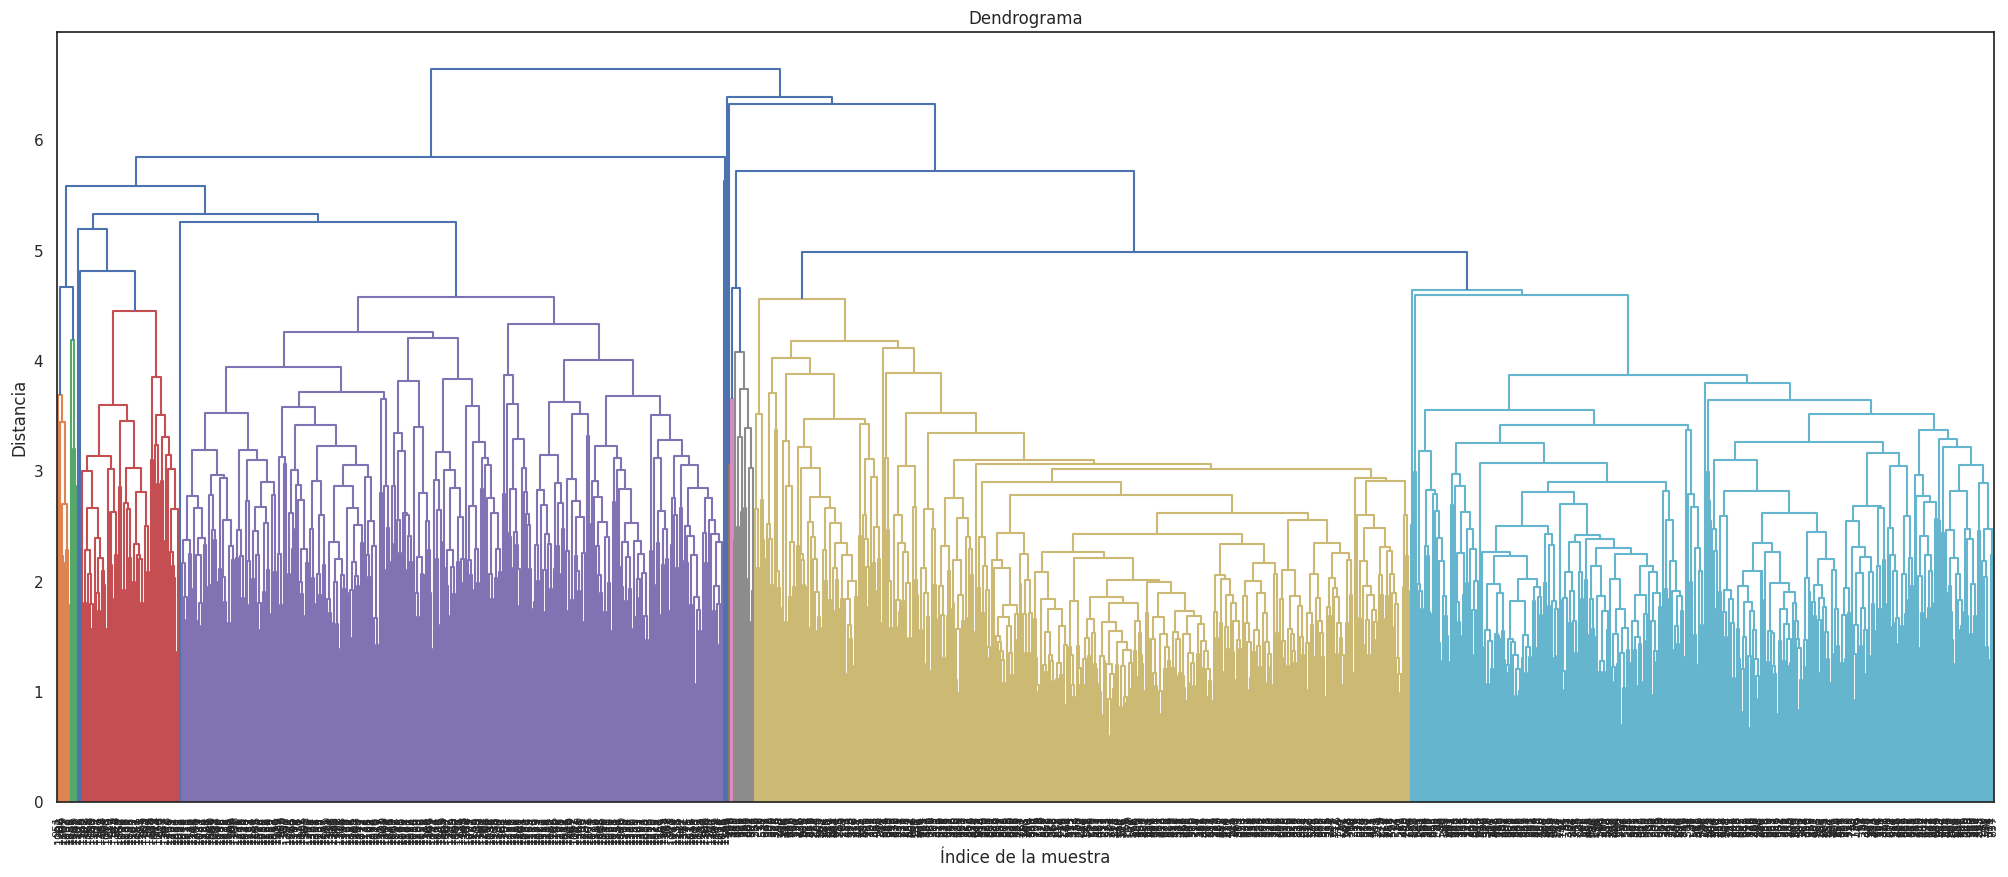

In [93]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Dendrograma')
plt.xlabel('Índice de la muestra')
plt.ylabel('Distancia')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Como en el dedrograma anterior hay muchas observaciones se realiza un nuevo dendrograma solamente con las uniones de los últimos 100 clusters.

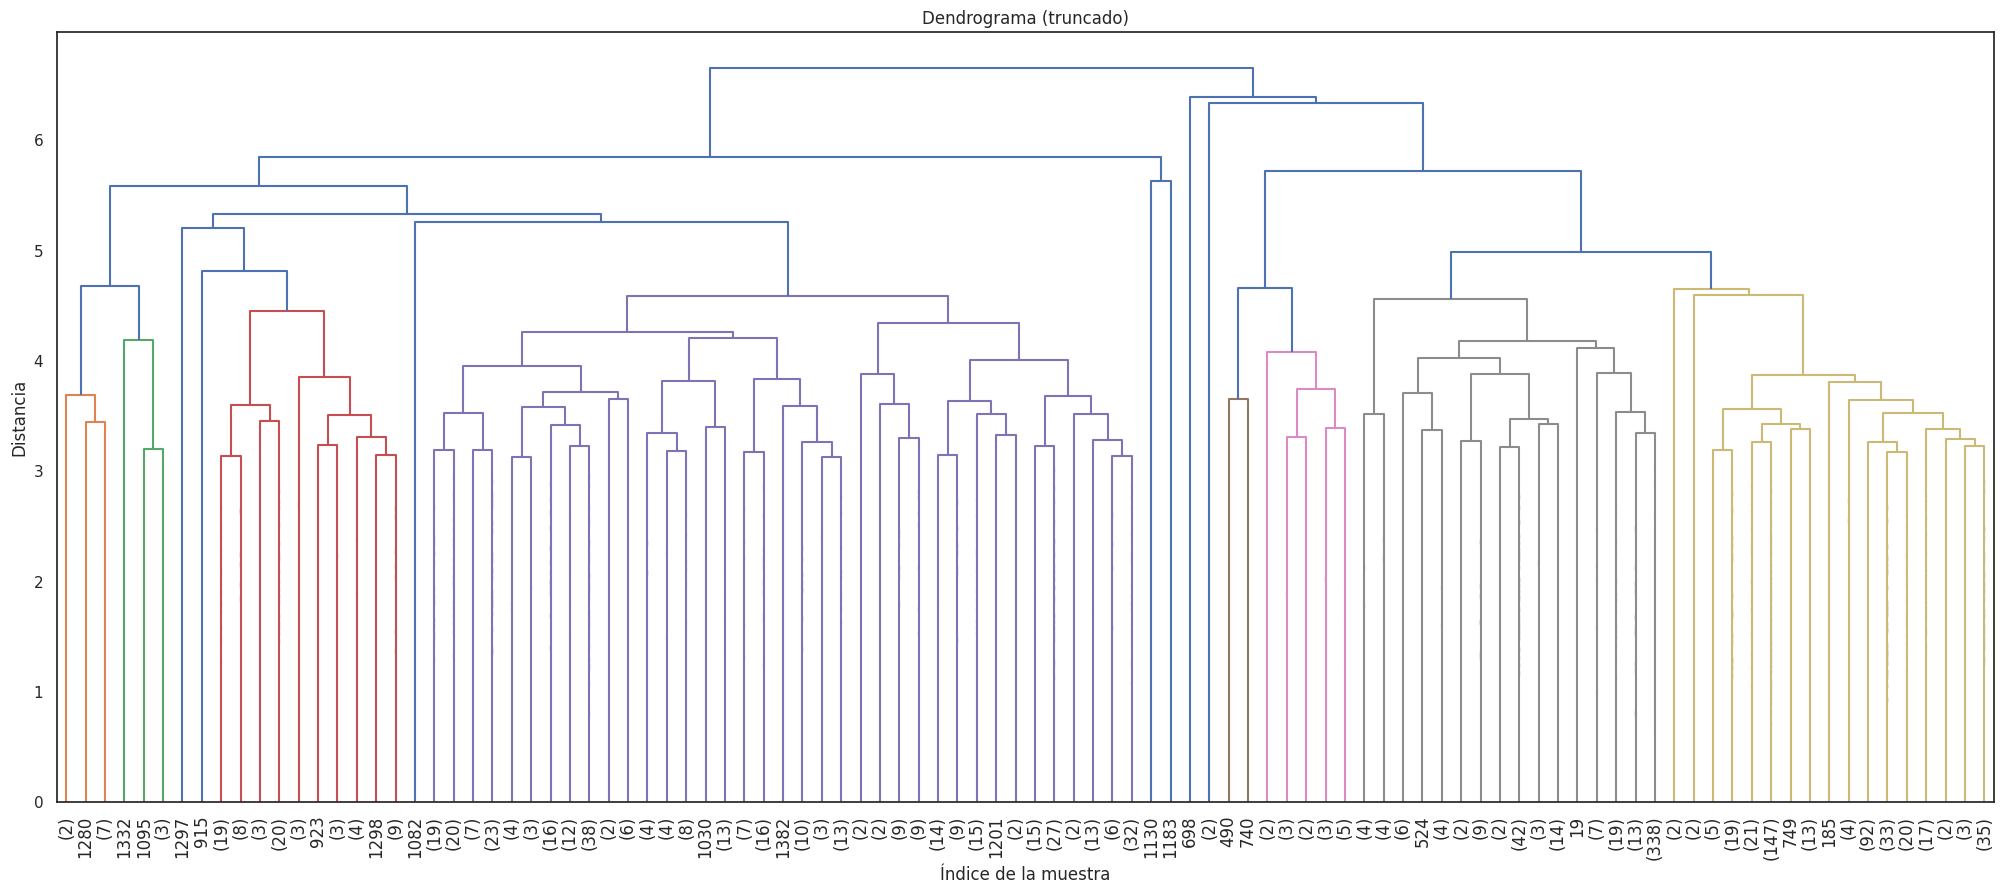

In [94]:
plt.figure(figsize=(25, 10))
# quedarnos con las últimas p uniones
plt.title('Dendrograma (truncado)')
plt.xlabel('Índice de la muestra')
plt.ylabel('Distancia')
dendrogram(
    Z,
    truncate_mode='lastp',  # mostrar solo las últimas p uniones
    p=100,  # definimos p
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # para observar las que están truncadas
)
plt.show()

En el siguiente paso se añaden los valores de las medias para cada una de las uniones.

In [95]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    fig = plt.figure(figsize=(30, 10))
    ddata = dendrogram(*args, **kwargs, ax=plt.gca())


    if not kwargs.get('no_plot', False):
        plt.title('Dendrogram (truncado)')
        plt.xlabel('Índice de la muestra o medida del cluster')
        plt.ylabel('Distancia')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

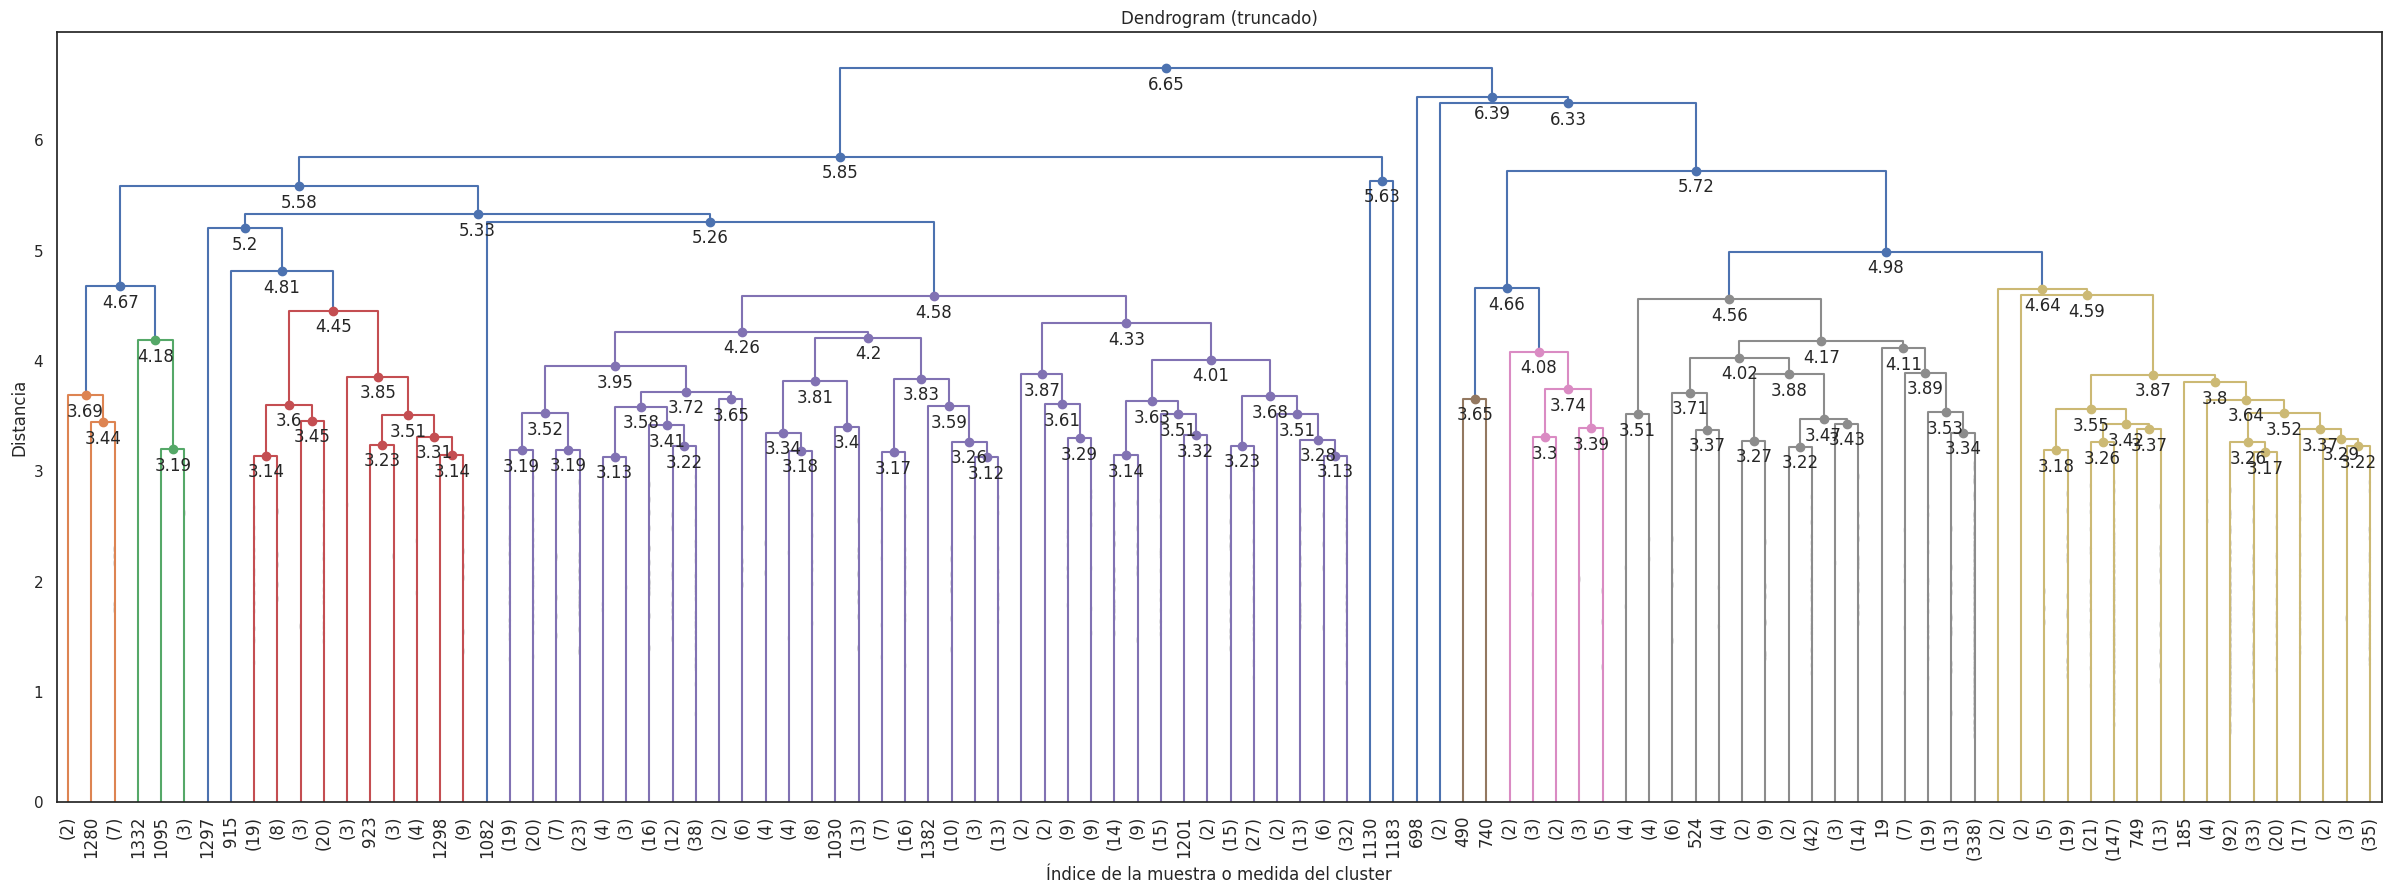

In [96]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=100,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=1,  # useful in small plots so annotations don't overlap
)
plt.show()

Como podemos observar, se generar 3/4 clusters claros en el dendograma. Además, las observaciones que se quedan a la izquierda se ve claramente que son outliers. Por tanto, cortaremos por una distancia = 5.7 para obtener 3 clusters, como hemos observado con el algoritmo de DBSCAN

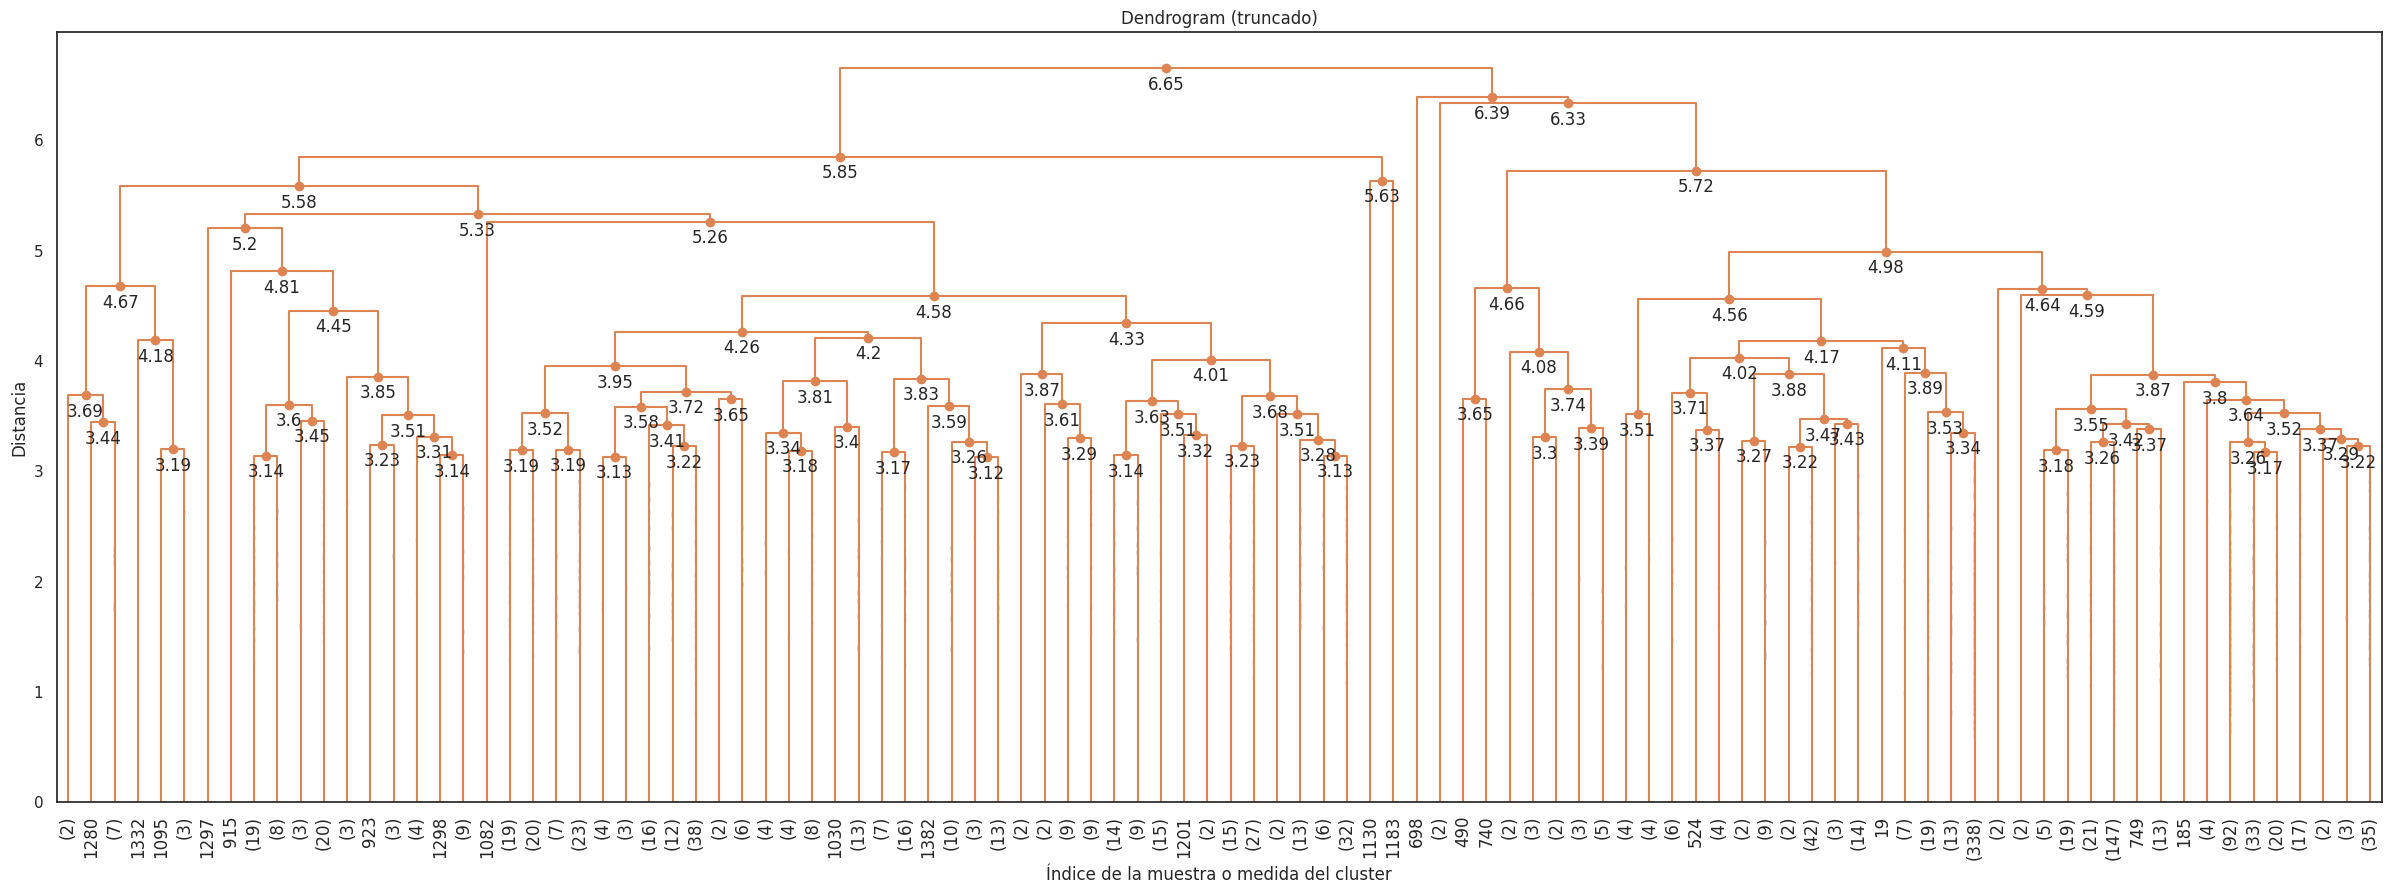

In [97]:
 lad_max = 5.7

fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=100,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=1,
    max_d=d_max,
)
plt.show()

A continuación se van a mostrar qué observaciones forman parte de cada cluster.

In [98]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
clusters = cluster.fit_predict(df_Z)
df_Z['jerarquico'] = clusters
print(clusters)

[0 0 0 ... 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Vamos a pintar el cluster formado por las observaciones que consideramos outliers según la salida del dendograma

In [99]:
print("----- Outliers -----")
df_Z[df_Z['jerarquico'] == 1]

----- Outliers -----


ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear city_bin                                           
2000 26         0         0.466396  0.042813  1.963612  0.607445   
     27         0         0.646762  1.288837  1.241703  0.537305   
     28         0         0.344920  0.396858  0.043736 -0.900725   
     30         0         1.488882  1.687555  0.749201  2.048007   
     32         0         1.367190  1.755616  2.520885  2.379901   
...                            ...       ...       ...       ...   
2010 21         0         1.595132  1.659588  0.776875  1.180850   
     22         0         0.219893  0.286350 -0.911789  0.334842   
     23         0         0.874400  0.162354  0.692852  0.436798   
     24         0         1.528584  1.026119  1.093311  1.598068   
     25         0         1.259486  0.915240  1.027738  1.474963   

                          precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear city_bin                                                
2000 26         0                    -0.500007              -1.494705   
     27         0                     0.378487              -1.573851   
     28         0                     0.251455              -1.737491   
     30         0                     0.432146              -1.724656   
     32         0                     1.096257              -1.060472   
...                                        ...                    ...   
2010 21         0                     0.245965               0.447579   
     22         0                     1.023881              -0.304308   
     23         0                     0.336809              -1.600590   
     24         0                     0.355028              -1.789898   
     25         0                     0.443626              -0.478643   

                          reanalysis_dew_point_temp_k  \
year weekofyear city_bin                                
2000 26         0                           -0.113406   
     27         0                            0.007750   
     28         0                            0.191471   
     30         0                           -0.966466   
     32         0                           -1.060809   
...                                               ...   
2010 21         0                            1.027648   
     22         0                            0.768453   
     23         0                            0.107059   
     24         0                           -0.016084   
     25         0                            0.319579   

                          reanalysis_max_air_temp_k  \
year weekofyear city_bin                              
2000 26         0                          1.284370   
     27         0                          1.057678   
     28         0                          0.377602   
     30         0                          1.187216   
     32         0                          1.770138   
...                                             ...   
2010 21         0                          2.061599   
     22         0                          1.672984   
     23         0                          0.701447   
     24         0                          0.895755   
     25         0                          1.446293   

                          reanalysis_min_air_temp_k  \
year weekofyear city_bin                              
2000 26         0                         -1.130551   
     27         0                         -1.949640   
     28         0                         -1.335323   
     30         0                         -1.785822   
     32         0                         -1.540095   
...                                             ...   
2010 21         0                         -0.557188   
     22         0                         -1.622004   
     23         0                         -1.417232   
     24         0                         -1.622004   
     25         0                         -1.458186   

                  

Hay que mencionar que estos oultiers no son los que se han obtenido mediante DBSSCAN.

### 4.4.3 Clustering mediante K-Means

Por último, se va a utilizar K-Means para verificar el análisis de observaciones realizado.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

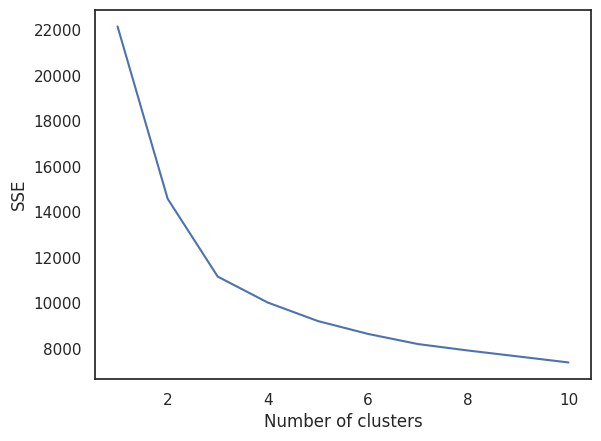

In [100]:
# Seleccionamos el rango de valores k que vamos a probar () y calculamos el error cuadrático medio para cada valor
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_var_sel)
    sse.append(kmeans.inertia_) # el método .inertia_ del ainsancia de la clase KMeans almacena la SSE de cada cúster

# Trazamos la gráfica de SSE en función de número de clústers k.
# Para determinar k, hay que observar le punto en el que se produce una disminución significativamente menor en SSE
plt.plot(k_range, sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [101]:
# Para determinar el punto de codo (inflexión) se va a calcular la pendiente de la curva.
diff = np.diff(sse) #Primera derivada
diff_r = diff[1:] / diff[:-1] #Aproximación numérica de la segunda derivada (el valor óptimo de k se encuentra en el punto de inflexión de la curva SSE vs k)
# Encontrar el punto de codo
k_elbow = np.argmin(diff_r) + 2  # +2 ya que diff tiene una entrada menos que sse
print("Elbow found at k=%d" % k_elbow)

Elbow found at k=3


En este caso, al igual que con el Clústering Jerárquico, el número de clústers también es k=3.

In [102]:
# Ejecutar K-means con k=3
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_var_sel)

# Obtener la etiqueta de cluster para cada muestra
labels = kmeans.labels_

# Obtener las coordenadas de los centroides para cada cluster
centroids = kmeans.cluster_centers_

# Crear un diccionario para almacenar los resultados
results_kmeans = {"cluster": labels}

# Recorrer las columnas del dataframe y añadirlas al diccionario
for col in df_var_sel.columns:
    results_kmeans[col] = df_var_sel[col]

# Convertir el diccionario en un DataFrame de pandas
df_results_kmeans_observ = pd.DataFrame(results_kmeans)

# Imprimir los resultados
print(df_results_kmeans_observ.head())
print(df_results_kmeans_observ.shape)

# Imprimir los centroides
print(centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                          cluster   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear city_bin                                                    
1990 18         1               0 -0.062977 -0.204344 -0.035307 -0.273059   
     19         1               0  0.293274  0.128725 -0.542414 -0.553103   
     20         1               0 -0.743468  0.395455 -0.614805 -0.358774   
     21         1               0 -0.017536  1.020014  0.372806  0.464274   
     22         1               0  0.491358  1.168430  0.704684  0.609216   

                          precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear city_bin                                                
1990 18         1                    -0.824201              -0.871164   
     19         1                    -0.564646              -0.393079   
     20         1                    -0.272148               0.033667   
     21         1                    -0.750827               0.187681   
     22         1     

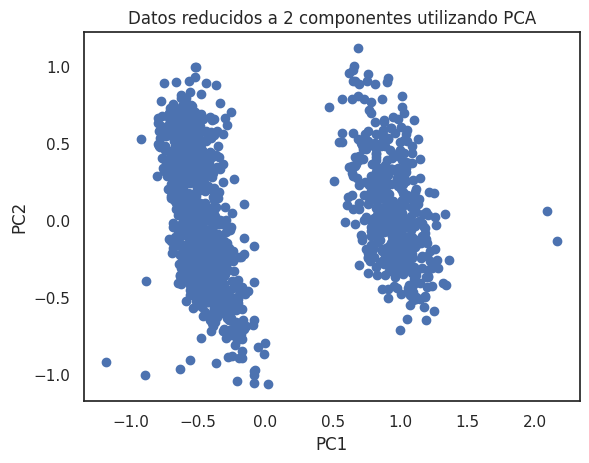

In [103]:
# Crear una instancia de PCA con 2 componentes principales
pca = PCA(n_components=2)

# Aplicar PCA al dataframe de resultados de K-means
principal_components_trans = pca.fit_transform(df_results_kmeans_observ)
df_pca = pd.DataFrame(data=principal_components_trans, columns=['PC1', 'PC2'])

# Visualizar los datos en un scatter plot
fig, ax = plt.subplots()
ax.scatter(principal_df_PCA['PC1'], principal_df_PCA['PC2'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Datos reducidos a 2 componentes utilizando PCA')
plt.show()

---
# Conclusiones
---

Primero hemos realizado la limpieza del dataset eliminando las columnas y filas que tienen más de un 20% de valores perdidos. A continuación, hemos eliminado la variable week_start_day ya que no nos aportaba información relevante y hemos eliminado los duplicados.

Más tarde, hemos realizado la eliminación de las características con un 90% o más de sus valores iguales y hemos utilizado la técnica de interpolación para los valores perdidos.

Hemos convertido en variable dicotómica la variable city. Finalmente, hemos realizado el tratamiento de outliers, siedo estos valores sustituidos por la mediana de cada conjunto.

La estandarización de los datos la hemos realizado de dos maneras diferentes, bien utilizando Z-score o MinMaxSclaer, dependiendo de que método es más apropiado para cada uno de los algoritmos.

Las características finales las hemos seleccionado después de realizar el tratamiento de los datos y de aplicar varios algoritmos de clustering.

Para reducir el número de características hemos aplicado PCA, K-means, DBSCAN y clustering jerárquico. Además, también se ha analizado la correlación entre carterísticas. En todos hemos conseguido resultados parecidos, por lo tanto, hemos decidido eliminar estar 4 características: 'reanalysis_sat_precip_amt_mm', 'reanalysis_avg_temp_k', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k'.

In [104]:
df.shape

(1385, 23)

Utilizando los mismos algoritmos pero esta vez para las observaciones hemos encontrado varios outliers, por lo que hemos decidido eliminar esas filas. Nos ha gustado más el comportamiento del algoritmo DBSACAN por lo que eliminaremos los outliers detectados con este algoritmo.


In [105]:
df_final = df_var_sel.drop(index_a_eliminar)
df_final_noNorm = df_var_sel_noNorm.drop(index_a_eliminar)

In [106]:
df_final.shape

(1368, 16)

In [107]:
df_final_noNorm.shape

(1368, 16)

**Resultados de la experimentación**:

* Lista de características:

In [108]:
names = df_final.columns
names

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'station_avg_temp_c',
       'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c',
       'station_precip_mm'],
      dtype='object')

* Resumen del dataset:

Inicialmente teniamos 1456 observaciones y 24 columnas. Tras realizar el preprocesamiento y la selección de características nuestro dataset final esta compuesto por 16 columnas y 1427 observaciones.

Tenemos 16 columnas porque 3 de ellas ahora son las que componen el índice.

In [109]:
df_final

ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear city_bin                                           
1990 18         1        -0.062977 -0.204344 -0.035307 -0.273059   
     19         1         0.293274  0.128725 -0.542414 -0.553103   
     20         1        -0.743468  0.395455 -0.614805 -0.358774   
     21         1        -0.017536  1.020014  0.372806  0.464274   
     22         1         0.491358  1.168430  0.704684  0.609216   
...                            ...       ...       ...       ...   
2010 21         0         1.595132  1.659588  0.776875  1.180850   
     22         0         0.219893  0.286350 -0.911789  0.334842   
     23         0         0.874400  0.162354  0.692852  0.436798   
     24         0         1.528584  1.026119  1.093311  1.598068   
     25         0         1.259486  0.915240  1.027738  1.474963   

                          precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear city_bin                                                
1990 18         1                    -0.824201              -0.871164   
     19         1                    -0.564646              -0.393079   
     20         1                    -0.272148               0.033667   
     21         1                    -0.750827               0.187681   
     22         1                    -0.946492               0.585549   
...                                        ...                    ...   
2010 21         0                     0.245965               0.447579   
     22         0                     1.023881              -0.304308   
     23         0                     0.336809              -1.600590   
     24         0                     0.355028              -1.789898   
     25         0                     0.443626              -0.478643   

                          reanalysis_dew_point_temp_k  \
year weekofyear city_bin                                
1990 18         1                           -2.038997   
     19         1                           -0.970438   
     20         1                            0.060384   
     21         1                           -0.026015   
     22         1                            0.329510   
...                                               ...   
2010 21         0                            1.027648   
     22         0                            0.768453   
     23         0                            0.107059   
     24         0                           -0.016084   
     25         0                            0.319579   

                          reanalysis_max_air_temp_k  \
year weekofyear city_bin                              
1990 18         1                         -1.144473   
     19         1                         -0.788243   
     20         1                         -0.917781   
     21         1                         -0.626320   
     22         1                         -0.464397   
...                                             ...   
2010 21         0                          2.061599   
     22         0                          1.672984   
     23         0                          0.701447   
     24         0                          0.895755   
     25         0                          1.446293   

                          reanalysis_min_air_temp_k  \
year weekofyear city_bin                              
1990 18         1                          0.016175   
     19         1                          0.220947   
     20         1                          0.589537   
     21         1                          0.466674   
     22         1                          0.671446   
...                                             ...   
2010 21         0                         -0.557188   
     22         0                         -1.622004   
     23         0                         -1.417232   
     24         0                         -1.622004   
     25         0                         -1.458186   

                  

**Posibles mejoras**:

* Como en el dataset se recogen datos de dos ciudades distintas a lo largo de los mismos años, una posible mejora sería hacer la división del dataset inicial por las distintas ciudades y hacer el estudio realizado para cada uno de los datasets resultantes.

* En el estudio, primero se han tratado los outilers del dataset y después se han utilizado los algoritmos de aprendizaje no supervisado. Otro posible aspecto de mejora podría ser el realizar el mismo estudio sin haber modificado los outliers.

**Resultados de la experimentación**:
* Lista de características:  
'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm'.

* Resumen del análisis:
  * Hemos llevado a cabo una limpieza del datset eliminando las columnas y filas que tienen más de un 20% de valores perdidos. A continuación, hemos eliminado la variable week_start_day ya que no nos aportaba información relevante. También hemos eliminado los duplicados.
  * Hemos realizado la eliminación de las características con un 90% o más de sus valores iguales y hemos utilizado la técnica de interpolación para los valores perdidos.
  * Hemos convertido en variable dicotómica la variable city.
  * Hemos tratado los outliers. Si el porcentaje era menor al 1%, la fila se ha eliminado. Por el contrario, si era mayor, se han tratado los outliers mediante truncamiento, esto es, se ha establecido un valor límite con el rango intercuartílico.
  * Hemos realizado la Selección de Características. Para ello, hemos aplicado PCA, K-means, DBSCAN, clustering jerárquico y análisis de correlación. De esta manera hemos eliminado características que no eran relevantes para el análisis.
  *Por último, para realizar la reducción de observaciones, hemos eliminado los outliers detectados por el algoritmo DBSCAN (19 observaciones en total)

Todos los miembros estamos muy satisfechos con el trabajo de investigación realizado y los resultados obtenidos con cada uno de los algoritmos. Es por ello, que todos vamos a usar el dataset final obtenido de la Actividad 1 como el conjunto de datos inicial para la segunda actividad.

In [110]:
ruta_guardado = '/content/drive/MyDrive/Colab Notebooks/07 Machine Learning/Práctica 2/df_a1.csv'
df_final.to_csv(ruta_guardado, index=True)

In [111]:
ruta_guardado2 = '/content/drive/MyDrive/Colab Notebooks/07 Machine Learning/Práctica 2/df_noNorm_a1.csv'
df_final_noNorm.to_csv(ruta_guardado2, index=True)

In [112]:
df_reset = df_final.reset_index(drop=False)

In [113]:
print(df_reset.columns)

Index(['year', 'weekofyear', 'city_bin', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'station_avg_temp_c',
       'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c',
       'station_precip_mm'],
      dtype='object')


In [114]:
# Buscar el índice correspondiente
indice_fila = df_reset.loc[(df_reset['year'] == 2007) &
                     (df_reset['weekofyear'] == 36) &
                     (df_reset['city_bin'] == 1)].index

print("Índice de la fila:", indice_fila)

Índice de la fila: Int64Index([871], dtype='int64')


In [115]:
print(df_con_outliers.shape)

(1446, 23)
